In [422]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats
import pandas as pd

In [423]:
r = np.random
r.seed(42)


# Problem 1 
### 1.1

In [490]:
# anlytical sol
#coin toss is binomial
p_coin = 0.5
rolls = 20
mu_tails = p_coin*rolls
sigma_tails = np.sqrt(rolls*p_coin*(1-p_coin))
#target hits is poisson
N = 2500
p = 0.004
lam = N*p
sigma_target = np.sqrt(lam)

Diff = mu_tails - lam
Sigma_Diff = np.sqrt(sigma_tails**2 + sigma_target**2)
Z = Diff/Sigma_Diff

P_N1_gt_N2 = np.sum([stats.binom.pmf(k, rolls, p_coin)* (1 - stats.poisson.cdf(k-1, lam)) for k in range(rolls+1)])
print(f"Analytical P(tails > target hits): {P_N1_gt_N2:.10f}")
P_N2_gt_N1 = np.sum([stats.binom.pmf(k, rolls, p_coin) * stats.poisson.cdf(k-1, lam) 
                     for k in range(rolls+1)])
print(f"Analytical P(target hits > tails): {P_N2_gt_N1:.10f}")

print(f'mean tails= {mu_tails} ± {sigma_tails} , mean target= {lam} ± {sigma_target}')
print(f"Difference in means: {Diff:.2f} ± {Sigma_Diff:.2f}")
print(f"Analytical Z-score: {Z:.2f}")

# 25<target hits<250 analytical
# p_low = stats.poisson.cdf(25, lam)
# p_high = 1 - stats.poisson.cdf(250, lam)
# p_analytical = p_high - p_low
p_analytical = stats.poisson.cdf(250, lam) - stats.poisson.cdf(24, lam)
print(f"Analytical p-value for 25 < target hits < 250: {p_analytical:.10f}")

p_coin_eq_10 = stats.binom.pmf(10, rolls, p_coin)
p_target_eq_20 = stats.poisson.pmf(20, lam)
p_joint_eq_10_20 = p_coin_eq_10 * p_target_eq_20
print(f"Analytical joint probability P(tails=10, hits=20): {p_joint_eq_10_20:.10f}")

P_N1_gt_N2 = np.sum([stats.binom.pmf(k, rolls, p_coin) * stats.poisson.cdf(k-1, lam) 
                     for k in range(rolls+1)])
print(f"Analytical P(tails > target hits): {P_N1_gt_N2:.10f}")

# The other one becomes:
P_N2_gt_N1 = np.sum([stats.binom.pmf(k, rolls, p_coin) * (1 - stats.poisson.cdf(k, lam))
                     for k in range(rolls+1)])
print(f"Analytical P(target hits > tails): {P_N2_gt_N1:.10f}")



Analytical P(tails > target hits): 0.5401886922
Analytical P(target hits > tails): 0.4598113078
mean tails= 10.0 ± 2.23606797749979 , mean target= 10.0 ± 3.1622776601683795
Difference in means: 0.00 ± 3.87
Analytical Z-score: 0.00
Analytical p-value for 25 < target hits < 250: 0.0000469494
Analytical joint probability P(tails=10, hits=20): 0.0003287980
Analytical P(tails > target hits): 0.4598113078
Analytical P(target hits > tails): 0.4373835380


Simulated P(tails > target hits): 0.45998 ± 0.00016


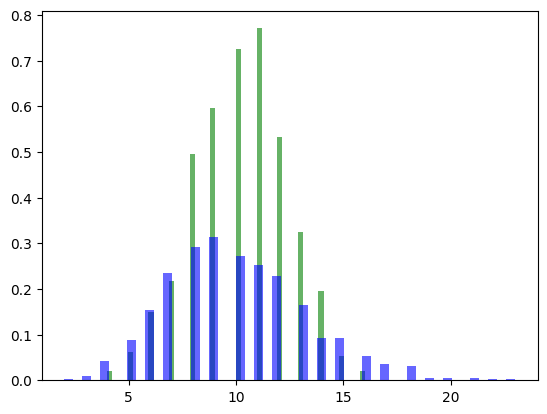

In [425]:
# simulation
P_N1_bigger = []
n_sims = 10000
for _ in range(n_sims):
    n_experiments = 1000
    tails = r.binomial(rolls, p_coin, n_experiments)
    targets = r.poisson(lam, n_experiments)
    # print(f'simulated mean tails= {np.mean(tails)} ± {np.std(tails)} , mean target= {np.mean(targets)} ± {np.std(targets)}')
    diffs = tails- targets 
    mean_diff = np.mean(tails) - np.mean(targets)
    std_diff = np.std(diffs)
    z_score = mean_diff / std_diff
    # print(f"Simulated mean difference: {mean_diff:.2f} ± {std_diff:.2f}")
    # print(f"Simulated Z-score: {z_score:.2f}")
    p_tails_bigger = np.mean(diffs > 0)
    P_N1_bigger.append(p_tails_bigger)
    # p_targets_bigger = np.mean(diffs < 0)
    # print(f"Probability targets > tails: {p_targets_bigger:.4f}")
mean_p_tails_bigger = np.mean(P_N1_bigger)
std_p_tails_bigger = np.std(P_N1_bigger)
error_p_tails_bigger = std_p_tails_bigger / np.sqrt(n_sims)
print(f"Simulated P(tails > target hits): {mean_p_tails_bigger:.5f} ± {error_p_tails_bigger:.5f}")
# plot
plt.hist(tails, bins=50, density=True, alpha=0.6, color='g')
plt.hist(targets, bins=50, density=True, alpha=0.6, color='b');



Simulated P(tails > target hits): 0.46017 ± 0.00016


(array([3.22322581e-04, 6.31180645e-03, 1.22325161e-02, 6.51749677e-02,
        5.81236129e-02, 1.53610323e-01, 8.07556774e-02, 1.34173871e-01,
        4.70128387e-02, 5.59313548e-02, 2.22900645e-02, 4.57238710e-03,
        3.62941935e-03, 5.69419355e-04, 3.74451613e-04, 4.66451613e-05,
        2.50967742e-05, 2.77419355e-06, 1.61290323e-06, 1.29032258e-07]),
 array([ 0.  ,  1.55,  3.1 ,  4.65,  6.2 ,  7.75,  9.3 , 10.85, 12.4 ,
        13.95, 15.5 , 17.05, 18.6 , 20.15, 21.7 , 23.25, 24.8 , 26.35,
        27.9 , 29.45, 31.  ]),
 <BarContainer object of 20 artists>)

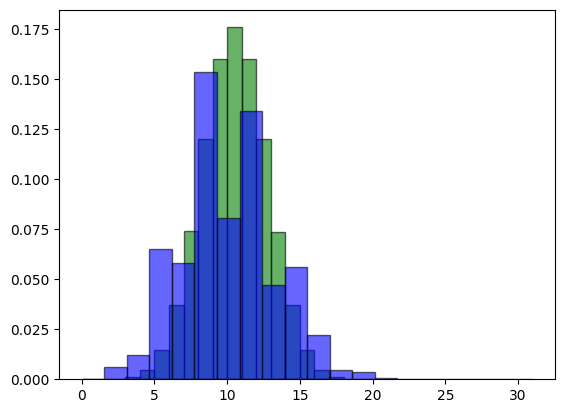

In [426]:
# Simulation
n_experiments = 10000000  # Many experiments in ONE simulation

tails = r.binomial(rolls, p_coin, n_experiments)
targets = r.poisson(lam, n_experiments)

# P(tails > targets) - this is what you want
p_tails_bigger = np.mean(tails > targets)

# Calculate uncertainty (binomial standard error)
error_p_tails_bigger = np.sqrt(p_tails_bigger * (1 - p_tails_bigger) / n_experiments)

print(f"Simulated P(tails > target hits): {p_tails_bigger:.5f} ± {error_p_tails_bigger:.5f}")

# === HISTOGRAM OF TAILS DISTRIBUTION ===

# Calculate number of bins using sqrt(N) rule
n_bins = 20
plt.hist(tails, bins=n_bins, density=True, alpha=0.6, color='g', edgecolor='black')
plt.hist(targets, bins=n_bins, density=True, alpha=0.6, color='b', edgecolor='black')





In [485]:
# Run the simulation multiple times
n_sims = 1000
n_experiments = 10000  # Per simulation

results = []
for _ in range(n_sims):
    tails = r.binomial(20, 0.5, n_experiments)
    targets = r.poisson(10, n_experiments)
    p_tails_bigger = np.mean(tails > targets)
    results.append(p_tails_bigger)

# Mean and standard error
mean_p = np.mean(results)
std_p = np.std(results, ddof=1)
sigma = np.sqrt(mean_p * (1 - mean_p) / n_experiments)
se_p = sigma / np.sqrt(n_sims)  # ← Standard error of the MEAN

print(f"P(tails > targets) = {mean_p:.5f} ± {se_p:.5f}")


P(tails > targets) = 0.45991 ± 0.00016


In [486]:


results2 = []
for _ in range(n_sims):
    tails = r.binomial(20, 0.5, n_experiments)
    targets = r.poisson(10, n_experiments)
    p_target_bigger = np.mean(tails < targets)
    results2.append(p_target_bigger)

# Mean and standard error
mean_p2 = np.mean(results2)
sigma = np.sqrt(mean_p2 * (1 - mean_p2) / n_experiments)
se_p2 = sigma / np.sqrt(n_sims)  # ← Standard error of the MEAN


print(f"P(targets > tails) = {mean_p2:.5f} ± {se_p2:.5f}")

P(targets > tails) = 0.43736 ± 0.00016


In [487]:
Z = (mean_p - P_N1_gt_N2 ) / se_p
p_value = 2 * (1 - stats.norm.cdf(np.abs(Z)))
print(f"for tails>target: Z-score: {Z:.2f}, p-value: {p_value:.5f}")

Z2 = (mean_p2 - P_N2_gt_N1) / se_p2
p_value2 = 2 * (1 - stats.norm.cdf(np.abs(Z2)))
print(f"for targets>tails: Z-score: {Z2:.2f}, p-value: {p_value2:.5f}")

for tails>target: Z-score: 0.64, p-value: 0.52083
for targets>tails: Z-score: -0.13, p-value: 0.89331


# Problem 2
### 2.1

In [430]:
import sympy as sp

#symbolic error propagation
x, y = sp.symbols('x y')
sx,sy = sp.symbols('sigma_x sigma_y')
z = sp.cos(x**2) / sp.ln(x*y)

dz_dx = sp.diff(z, x)
dz_dy = sp.diff(z, y)

sigma_z = sp.sqrt((dz_dx * sx)**2 + (dz_dy * sy)**2)
sp.simplify(sigma_z)

#numbers
x_val = 1.71
y_val = 10.1
sx_val = 0.05
sy_val = 0.3

z_val = z.evalf(subs={x: x_val, y: y_val})
sigma_z_val = sigma_z.evalf(subs={x: x_val, y: y_val, sx: sx_val, sy: sy_val})
print(f"z = {z_val:.5f} ± {sigma_z_val:.5f}")

#add linear correlation
#symbolic error propagation with correlation
rho = sp.symbols('rho')
covxy = rho * sx * sy
sigma_z_corr = sp.sqrt((dz_dx * sx)**2 + (dz_dy * sy)**2 + 2 * dz_dx * dz_dy * covxy)

#numbers

rho_val = 0.87

covxy = rho_val * sx_val * sy_val
sigma_z_corr_val = sigma_z_corr.evalf(subs={x: x_val, y: y_val, sx: sx_val, sy: sy_val, rho: rho_val})
print(f"With correlation (rho={rho_val}), z = {z_val:.5f} ± {sigma_z_corr_val:.5f}")


z = -0.34273 ± 0.01009
With correlation (rho=0.87), z = -0.34273 ± 0.00657


### 2.2

In [431]:

dataframe = pd.read_csv('data_WaterDensity.csv', header=0)
temp, density = dataframe.values.T
dataframe

# Temp    Density
0      0.2   0.999854
1      0.2   0.999857
2      0.2   0.999867
3      0.2   0.999858
4      0.2   0.999833
..     ...        ...
95     7.8   0.999865
96     7.8   0.999861
97     7.8   0.999863
98     7.8   0.999865
99     7.8   0.999862

[100 rows x 2 columns]

Temperature 0.2: Mean = 0.999855 ± 0.000003
Temperature 2.3: Mean = 0.999952 ± 0.000003
Temperature 3.9: Mean = 0.999972 ± 0.000003
Temperature 5.9: Mean = 0.999951 ± 0.000004
Temperature 7.8: Mean = 0.999865 ± 0.000004


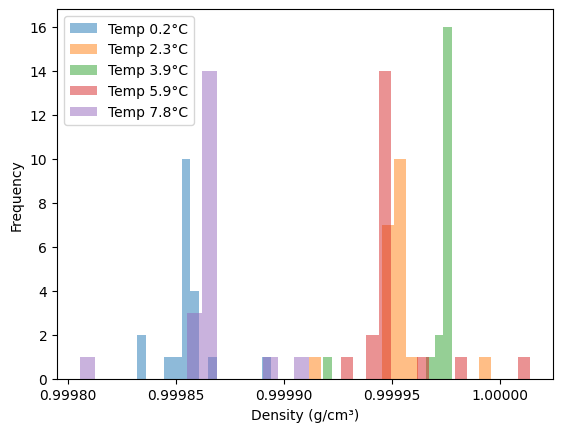

In [432]:
# Group densities by temperature using np.unique
unique_temps = np.unique(temp)

# Create list of density arrays for each temperature
density_groups = [density[temp == t] for t in unique_temps]

# Display the groups
# for i, t in enumerate(unique_temps):
#     print(f"Temperature {t}: {density_groups[i]}")
#     print(f"  Mean: {np.mean(density_groups[i]):.6f}, Std: {np.std(density_groups[i], ddof=1):.6f}\n")
# calc means and stds
means = [np.mean(density_groups[i]) for i in range(len(unique_temps))]
stds = [np.std(density_groups[i], ddof=1) for i in range(len(unique_temps))]
err = [stds[i]/np.sqrt(len(density_groups[i])) for i in range(len(unique_temps))]
# print results
for i, t in enumerate(unique_temps):
    print(f"Temperature {t}: Mean = {means[i]:.6f} ± {err[i]:.6f}")


#plot the different groups
for i, t in enumerate(unique_temps):
    plt.hist(density_groups[i], bins=15, alpha=0.5, label=f'Temp {t}°C')
plt.xlabel('Density (g/cm³)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [433]:
from scipy.stats import norm

def iterative_chauvenet_clip(data):
    """
    Iteratively remove outliers using Chauvenet's criterion.
    Rejects a point if probability of deviation >= observed is < 1/(2N)
    """
    data = np.asarray(data, dtype=float)

    while len(data) > 2:
        N = len(data)
        mu = np.mean(data)
        sigma = np.std(data, ddof=1)

        if sigma == 0:
            break

        # Calculate z-scores for all points
        distances = np.abs(data - mu)
        idx = np.argmax(distances)
        
        z = distances[idx] / sigma
        # Two-sided probability
        p_value = 2 * (1 - norm.cdf(z))
        
        # Chauvenet's criterion: reject if p_value < 1/(2N)
        chauvenet_threshold = 1 / (2 * N)
        
        if p_value < chauvenet_threshold:
            print(
                f"Removed value = {data[idx]:.6g}, "
                f"z = {z:.3f}σ, "
                f"p = {p_value:.3e}, "
                f"threshold = {chauvenet_threshold:.3e}"
            )
            data = np.delete(data, idx)
        else:
            break

    return data



--- Temperature 0.2°C ---
Original data: N = 20
Removed value = 0.999894, z = 3.188σ, p = 1.433e-03, threshold = 2.500e-02
Removed value = 0.999832, z = 2.566σ, p = 1.029e-02, threshold = 2.632e-02
Removed value = 0.999833, z = 3.239σ, p = 1.199e-03, threshold = 2.778e-02
Removed value = 0.999867, z = 2.876σ, p = 4.034e-03, threshold = 2.941e-02
Removed value = 0.999847, z = 2.886σ, p = 3.898e-03, threshold = 3.125e-02
Removed value = 0.999851, z = 2.495σ, p = 1.259e-02, threshold = 3.333e-02
Cleaned data: N = 14
Mean = 0.9998557 ± 0.0000004


--- Temperature 2.3°C ---
Original data: N = 20
Removed value = 0.999996, z = 3.144σ, p = 1.664e-03, threshold = 2.500e-02
Removed value = 0.999912, z = 4.004σ, p = 6.222e-05, threshold = 2.632e-02
Removed value = 0.999958, z = 2.253σ, p = 2.424e-02, threshold = 2.778e-02
Cleaned data: N = 17
Mean = 0.9999518 ± 0.0000005


--- Temperature 3.9°C ---
Original data: N = 20
Removed value = 0.999918, z = 4.200σ, p = 2.673e-05, threshold = 2.500e-02
R

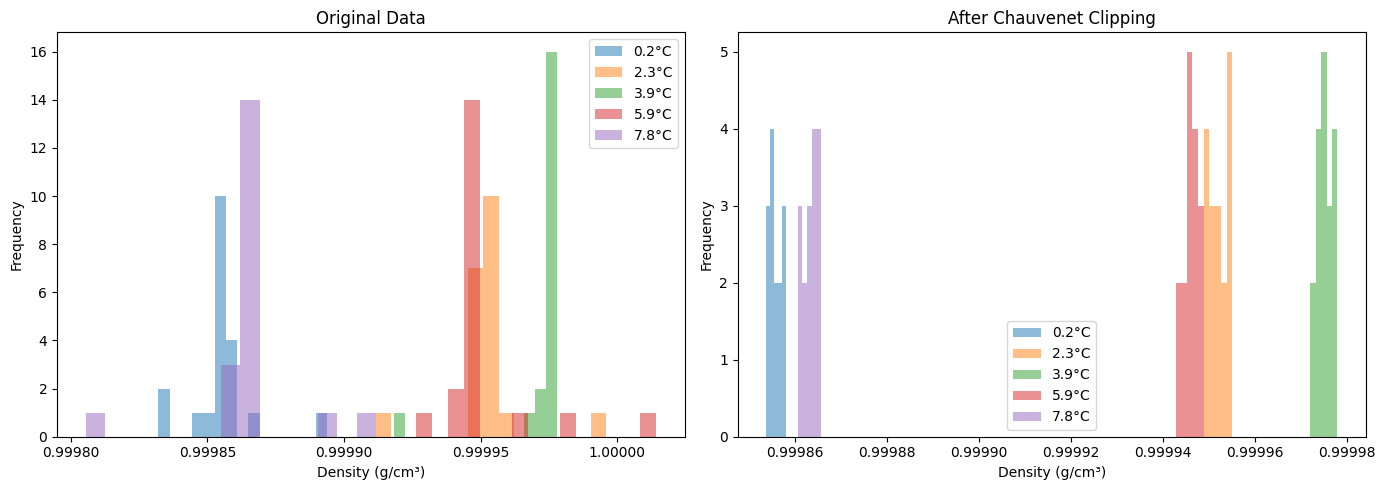

In [434]:
# Apply Chauvenet's criterion to each temperature group
cleaned_groups = []
cleaned_means = []
cleaned_stds = []
cleaned_errs = []

for i, t in enumerate(unique_temps):
    print(f"\n--- Temperature {t}°C ---")
    print(f"Original data: N = {len(density_groups[i])}")
    
    # Apply Chauvenet's criterion
    cleaned_data = iterative_chauvenet_clip(density_groups[i])
    cleaned_groups.append(cleaned_data)
    
    # Calculate statistics on cleaned data
    mean = np.mean(cleaned_data)
    std = np.std(cleaned_data, ddof=1)
    err = std / np.sqrt(len(cleaned_data))
    
    cleaned_means.append(mean)
    cleaned_stds.append(std)
    cleaned_errs.append(err)
    
    print(f"Cleaned data: N = {len(cleaned_data)}")
    print(f"Mean = {mean:.7f} ± {err:.7f}\n")

# Plot cleaned vs original
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Original data
for i, t in enumerate(unique_temps):
    ax1.hist(density_groups[i], bins=15, alpha=0.5, label=f'{t}°C')
ax1.set_xlabel('Density (g/cm³)')
ax1.set_ylabel('Frequency')
ax1.set_title('Original Data')
ax1.legend()

# Cleaned data
for i, t in enumerate(unique_temps):
    ax2.hist(cleaned_groups[i], bins=5, alpha=0.5, label=f'{t}°C')
ax2.set_xlabel('Density (g/cm³)')
ax2.set_ylabel('Frequency')
ax2.set_title('After Chauvenet Clipping')
ax2.legend()

plt.tight_layout()
plt.show()

In [435]:
# Find temperature with highest mean density
max_idx = np.argmax(cleaned_means)
max_temp = unique_temps[max_idx]

print(f"Highest density at temperature: {max_temp}°C")
print(f"Mean density: {cleaned_means[max_idx]:.6f} ± {cleaned_errs[max_idx]:.6f}")

# Check if highest is significantly higher than others
print("\n--- Difference in standard deviations ---")
for i, t in enumerate(unique_temps):
    if i != max_idx:
        diff = cleaned_means[max_idx] - cleaned_means[i]
        combined_err = np.sqrt(cleaned_errs[max_idx]**2 + cleaned_errs[i]**2)
        z_score = diff / combined_err
        print(f"{max_temp}°C - {t}°C: Δ={diff:.6f}, σ_combined={combined_err:.6f}, Z={z_score:.2f}")
        if z_score > 2:
            print(f"  → Significantly higher (>2σ)")



Highest density at temperature: 3.9°C
Mean density: 0.999975 ± 0.000000

--- Difference in standard deviations ---
3.9°C - 0.2°C: Δ=0.000119, σ_combined=0.000001, Z=226.46
  → Significantly higher (>2σ)
3.9°C - 2.3°C: Δ=0.000023, σ_combined=0.000001, Z=37.39
  → Significantly higher (>2σ)
3.9°C - 5.9°C: Δ=0.000029, σ_combined=0.000001, Z=50.75
  → Significantly higher (>2σ)
3.9°C - 7.8°C: Δ=0.000112, σ_combined=0.000001, Z=203.52
  → Significantly higher (>2σ)


Text(0.5, 1.0, 'Mean Water Density vs Temperature with cleaned data')

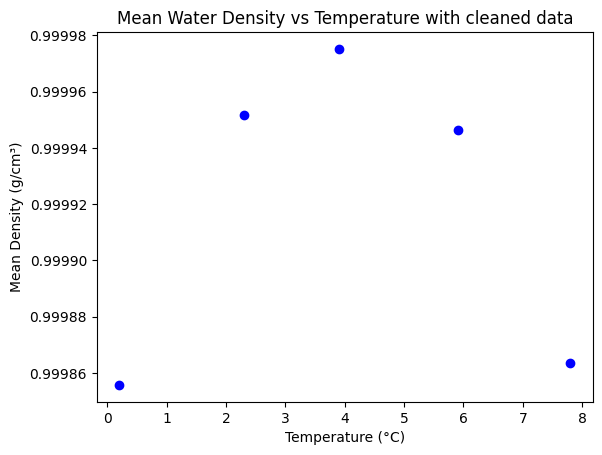

In [436]:
plt.scatter(unique_temps, cleaned_means, color='blue', label='Mean Densities')

plt.xlabel('Temperature (°C)')
plt.ylabel('Mean Density (g/cm³)')
plt.title('Mean Water Density vs Temperature with cleaned data')

In [437]:
def func_water_density(x, a,b, c):
    return a + b*x + c * x**2

cfit = cost.LeastSquares(unique_temps, cleaned_means, cleaned_errs, func_water_density)
m = Minuit(cfit, a=1.0, b=0.0, c=-8e-6)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.16 (χ²/ndof = 13.6)     │              Nfcn = 66               │
│ EDM = 7.25e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │999.8435e-3│ 0.0004e-3 │            │            │         │         │       │
│ 1 │ b    │ 64.89e-6  │  0.24e-6  │            │            │         │         │       │
│ 2 │ c    │ -8.001e-6 │ 0.029e-6  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │  1.55e-13 -0.07e-12   6.6e-15 │
│ b │ -0.07e-12  5.56e-14  -6.5e-15 │
│ c │   6.6e-15  -6.5e-15  8.27e-16 │
└───┴───────────────────────────────┘

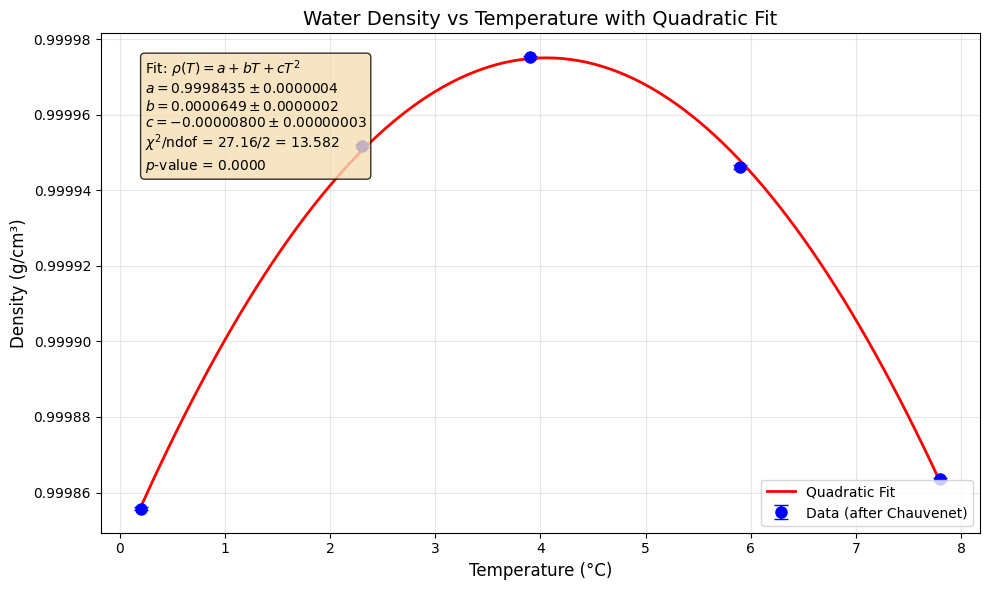


=== Fit Results ===
a = 9.998e-01 ± 3.935e-07
b = 6.489228e-05 ± 2.357527e-07
c = -8.000792e-06 ± 2.875159e-08

χ² = 27.16
ndof = 2
χ²/ndof = 13.582
p-value = 0.0000


In [438]:

# Get fit results
a_fit = m.values['a']
b_fit = m.values['b']
c_fit = m.values['c']
a_err = m.errors['a']
b_err = m.errors['b']
c_err = m.errors['c']

# Calculate chi-square statistics
chi2 = m.fval
ndof = len(unique_temps) - m.nfit
chi2_ndof = chi2 / ndof
p_value = stats.chi2.sf(chi2, ndof)

# Create smooth curve for plotting
temp_smooth = np.linspace(unique_temps.min(), unique_temps.max(), 200)
density_fit = func_water_density(temp_smooth, a_fit, b_fit, c_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(unique_temps, cleaned_means, yerr=cleaned_errs, 
             fmt='o', color='blue', markersize=8, capsize=5, 
             label='Data (after Chauvenet)')
plt.plot(temp_smooth, density_fit, 'r-', linewidth=2, label='Quadratic Fit')

# Create legend text
legend_text = (
    f'Fit: $\\rho(T) = a + bT + cT^2$\n'
    f'$a = {a_fit:.7f} \\pm {a_err:.7f}$\n'
    f'$b = {b_fit:.7f} \\pm {b_err:.7f}$\n'
    f'$c = {c_fit:.8f} \\pm {c_err:.8f}$\n'
    f'$\\chi^2$/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}\n'
    f'$p$-value = {p_value:.4f}'
)

plt.text(0.05, 0.95, legend_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.title('Water Density vs Temperature with Quadratic Fit', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print fit summary
print(f"\n=== Fit Results ===")
print(f"a = {a_fit:.3e} ± {a_err:.3e}")
print(f"b = {b_fit:.6e} ± {b_err:.6e}")
print(f"c = {c_fit:.6e} ± {c_err:.6e}")
print(f"\nχ² = {chi2:.2f}")
print(f"ndof = {ndof}")
print(f"χ²/ndof = {chi2_ndof:.3f}")
print(f"p-value = {p_value:.4f}")

This is visually a good fit, but as we only have 5 points and 3 params, the p value is very low. I would thus argue that we cant reject that the formuala is correct without getting more points.


=== Maximum Density from Fit ===
Temperature at maximum density: T_max = 4.06 ± 0.02 °C
Maximum density: ρ_max = 0.999975 ± 0.000001 g/cm³


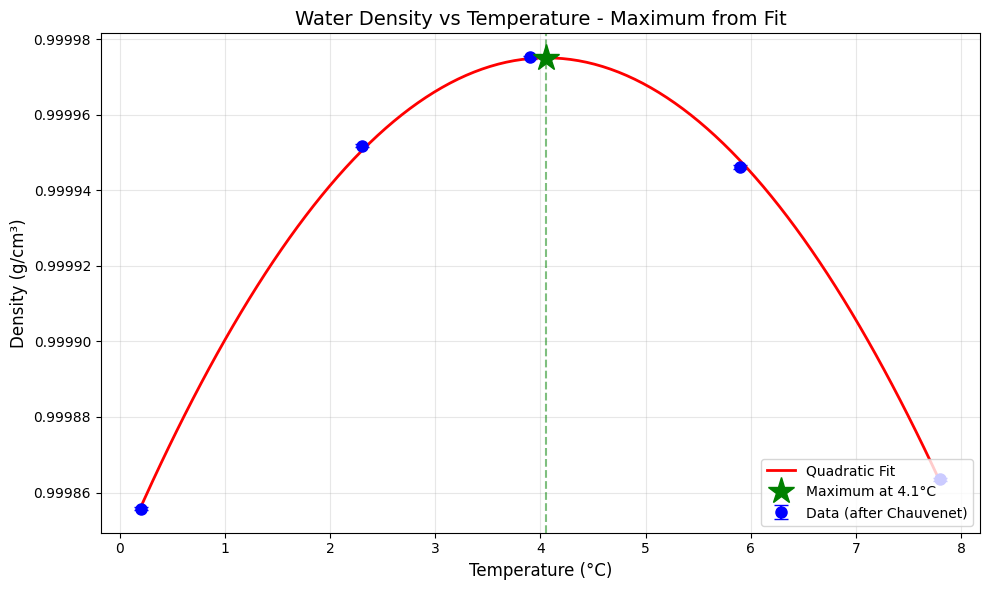

In [439]:
# Find temperature with maximum density from the fit
# For ρ(T) = a + bT + cT², the maximum occurs at dρ/dT = 0
# dρ/dT = b + 2cT = 0  →  T_max = -b/(2c)

T_max = -b_fit / (2 * c_fit)

# Calculate the maximum density value
rho_max = func_water_density(T_max, a_fit, b_fit, c_fit)

# Propagate uncertainty using error propagation
# σ(T_max)² = (∂T_max/∂b)² σ_b² + (∂T_max/∂c)² σ_c²
# ∂T_max/∂b = -1/(2c)
# ∂T_max/∂c = b/(2c²)

dTmax_db = -1 / (2 * c_fit)
dTmax_dc = b_fit / (2 * c_fit**2)

sigma_Tmax = np.sqrt((dTmax_db * b_err)**2 + (dTmax_dc * c_err)**2)

# Propagate uncertainty for rho_max
# dρ/da = 1, dρ/db = T_max, dρ/dc = T_max²
drho_da = 1
drho_db = T_max
drho_dc = T_max**2

sigma_rho_max = np.sqrt(
    (drho_da * a_err)**2 + 
    (drho_db * b_err)**2 + 
    (drho_dc * c_err)**2
)

print(f"\n=== Maximum Density from Fit ===")
print(f"Temperature at maximum density: T_max = {T_max:.2f} ± {sigma_Tmax:.2f} °C")
print(f"Maximum density: ρ_max = {rho_max:.6f} ± {sigma_rho_max:.6f} g/cm³")

# Visualize on plot
plt.figure(figsize=(10, 6))
plt.errorbar(unique_temps, cleaned_means, yerr=cleaned_errs, 
             fmt='o', color='blue', markersize=8, capsize=5, 
             label='Data (after Chauvenet)')
plt.plot(temp_smooth, density_fit, 'r-', linewidth=2, label='Quadratic Fit')

# Mark the maximum
plt.plot(T_max, rho_max, 'g*', markersize=20, label=f'Maximum at {T_max:.1f}°C', zorder=10)
plt.axvline(T_max, color='green', linestyle='--', alpha=0.5)

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.title('Water Density vs Temperature - Maximum from Fit', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3

In [440]:
#analytical
beta,beta_err = sp.symbols('beta sigma_beta')
lorentz = 1 / sp.sqrt(1 - beta**2)
lorentz_dbeta = sp.diff(lorentz, beta)
sigma_lorentz = lorentz_dbeta * beta_err

#numbers
beta_val = 0.50
beta_err_val = 0.02
lorentz_val = lorentz.evalf(subs={beta: beta_val})
sigma_lorentz_val = sigma_lorentz.evalf(subs={beta: beta_val, beta_err: beta_err_val})
print(f"Lorentz factor γ = {lorentz_val:.5f} ± {sigma_lorentz_val:.5f}")

beta_val2 = 0.95
lorentz_val2 = lorentz.evalf(subs={beta: beta_val2})
sigma_lorentz_val2 = sigma_lorentz.evalf(subs={beta: beta_val2, beta_err: beta_err_val})
print(f"Lorentz factor γ = {lorentz_val2:.5f} ± {sigma_lorentz_val2:.5f}")


Lorentz factor γ = 1.15470 ± 0.01540
Lorentz factor γ = 3.20256 ± 0.62409


In [441]:
# For β = 0.95, calculate asymmetric uncertainties
beta_val2 = 0.95
beta_err_val = 0.02

# Calculate γ at β ± σ_β
beta_low = beta_val2 - beta_err_val
beta_high = beta_val2 + beta_err_val

gamma_center = 1 / np.sqrt(1 - beta_val2**2)
gamma_low = 1 / np.sqrt(1 - beta_low**2)
gamma_high = 1 / np.sqrt(1 - beta_high**2)

# Asymmetric uncertainties
sigma_low = gamma_center - gamma_low
sigma_high = gamma_high - gamma_center

print(f"\n=== Asymmetric Uncertainty Analysis (β = {beta_val2}) ===")
print(f"γ = {gamma_center:.4f} + {sigma_high:.4f} - {sigma_low:.4f}")
print(f"\nSymmetric (linear approximation): γ = {lorentz_val2:.5f} ± {sigma_lorentz_val2:.5f}")
print(f"Note: At high β, linear approximation underestimates the uncertainty!")


=== Asymmetric Uncertainty Analysis (β = 0.95) ===
γ = 3.2026 + 0.9109 - 0.4819

Symmetric (linear approximation): γ = 3.20256 ± 0.62409
Note: At high β, linear approximation underestimates the uncertainty!


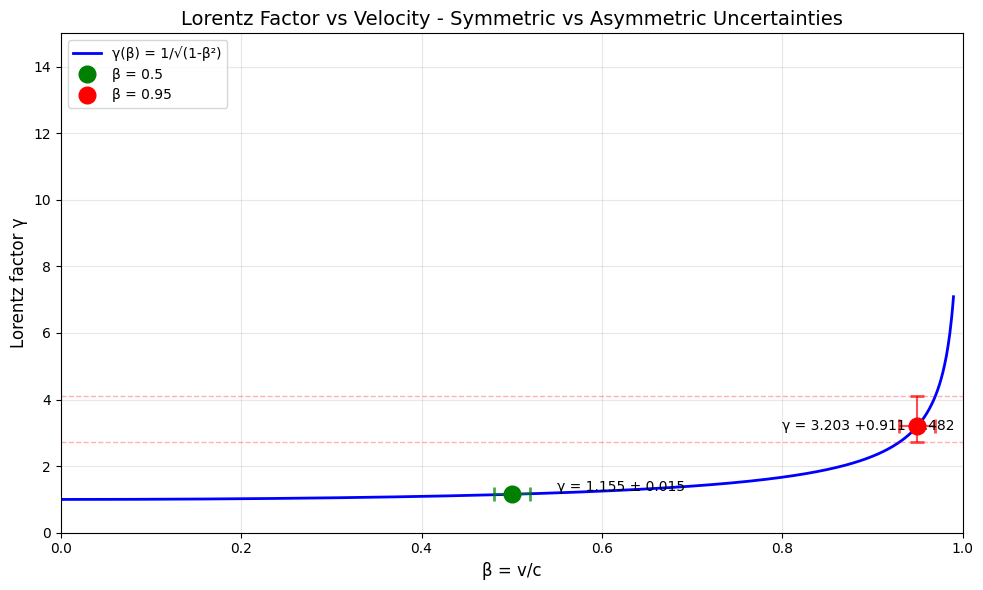


=== Comparison ===
At β = 0.5:
  Symmetric uncertainty: ±0.0154

At β = 0.95:
  Symmetric (linear approx): ±0.6241
  Asymmetric (exact): +0.9109 / -0.4819
  Asymmetry ratio: 1.89


In [442]:
# Plot the Lorentz factor function
beta_range = np.linspace(0, 0.99, 1000)
gamma_range = 1 / np.sqrt(1 - beta_range**2)

plt.figure(figsize=(10, 6))
plt.plot(beta_range, gamma_range, 'b-', linewidth=2, label='γ(β) = 1/√(1-β²)')

# Mark β = 0.50
beta_val = 0.50
gamma_val = 1 / np.sqrt(1 - beta_val**2)
plt.plot(beta_val, gamma_val, 'go', markersize=12, label=f'β = {beta_val}', zorder=5)
plt.errorbar(beta_val, gamma_val, xerr=beta_err_val, 
             fmt='go', capsize=5, capthick=2, alpha=0.7)

# Mark β = 0.95 with asymmetric error bars
plt.plot(beta_val2, gamma_center, 'ro', markersize=12, label=f'β = {beta_val2}', zorder=5)
# Plot asymmetric error bars
plt.errorbar(beta_val2, gamma_center, 
             xerr=[[beta_err_val], [beta_err_val]],
             yerr=[[sigma_low], [sigma_high]],
             fmt='ro', capsize=5, capthick=2, alpha=0.7)

# Add horizontal lines to show asymmetry
plt.axhline(gamma_low, color='red', linestyle='--', alpha=0.3, linewidth=1)
plt.axhline(gamma_high, color='red', linestyle='--', alpha=0.3, linewidth=1)

# Annotations
plt.text(beta_val + 0.05, gamma_val, 
         f'γ = {gamma_val:.3f} ± {float(sigma_lorentz_val):.3f}', 
         fontsize=10, verticalalignment='bottom')
plt.text(beta_val2 - 0.15, gamma_center, 
         f'γ = {gamma_center:.3f} +{sigma_high:.3f} -{sigma_low:.3f}', 
         fontsize=10, verticalalignment='center')

plt.xlabel('β = v/c', fontsize=12)
plt.ylabel('Lorentz factor γ', fontsize=12)
plt.title('Lorentz Factor vs Velocity - Symmetric vs Asymmetric Uncertainties', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 15)
plt.tight_layout()
plt.show()

print(f"\n=== Comparison ===")
print(f"At β = {beta_val}:")
print(f"  Symmetric uncertainty: ±{float(sigma_lorentz_val):.4f}")
print(f"\nAt β = {beta_val2}:")
print(f"  Symmetric (linear approx): ±{float(sigma_lorentz_val2):.4f}")
print(f"  Asymmetric (exact): +{sigma_high:.4f} / -{sigma_low:.4f}")
print(f"  Asymmetry ratio: {sigma_high/sigma_low:.2f}")

we ca see the function is much steeper as we approach light speeds. On the plot we can clearly see that for beta = 0.95, if we increase a little, we will have a massive increase in lorentz factor. Thus the error propagation cannot be assumed to be linear.

# Problem 3
### 3.1

=== Random Harmonic Series Statistics ===
N = 25, Number of experiments = 10000
Mean: 0.0245
Std Dev: 1.2800
Median: 0.0426
Min: -3.2938
Max: 3.4264


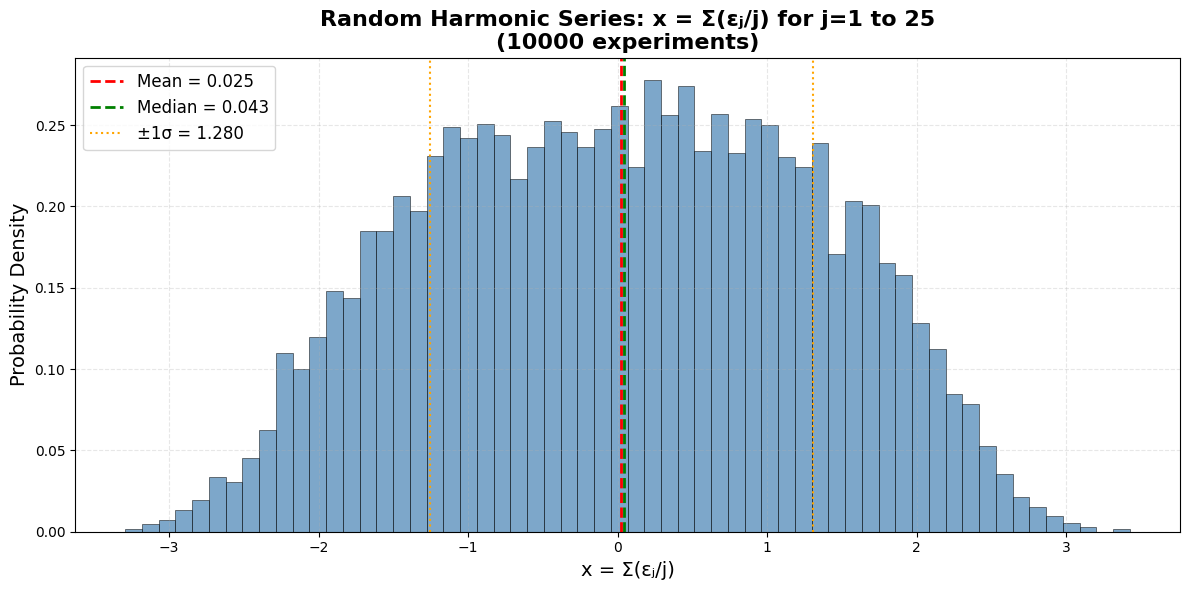

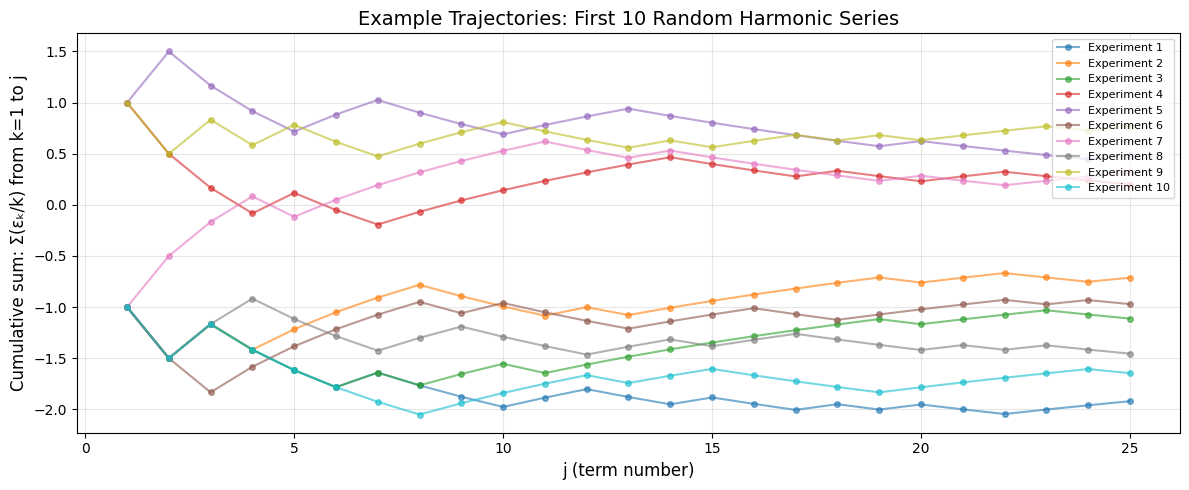

In [443]:

N_harmonic = 25
n_exp = 10000

epsilon = r.choice([-1, 1], size=(n_exp, N_harmonic))


j_values = np.arange(1, N_harmonic + 1)


x_values = np.sum(epsilon / j_values, axis=1)

# Statistics
mean_x = np.mean(x_values)
std_x = np.std(x_values)
median_x = np.median(x_values)

print(f"=== Random Harmonic Series Statistics ===")
print(f"N = {N_harmonic}, Number of experiments = {n_exp}")
print(f"Mean: {mean_x:.4f}")
print(f"Std Dev: {std_x:.4f}")
print(f"Median: {median_x:.4f}")
print(f"Min: {np.min(x_values):.4f}")
print(f"Max: {np.max(x_values):.4f}")

# Create beautiful histogram
plt.figure(figsize=(12, 6))

# Plot histogram
counts, bins, patches = plt.hist(x_values, bins=60, density=True, 
                                  alpha=0.7, color='steelblue', 
                                  edgecolor='black', linewidth=0.5)

# Add statistics lines
plt.axvline(mean_x, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_x:.3f}')
plt.axvline(median_x, color='green', linestyle='--', linewidth=2, label=f'Median = {median_x:.3f}')
plt.axvline(mean_x + std_x, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ = {std_x:.3f}')
plt.axvline(mean_x - std_x, color='orange', linestyle=':', linewidth=1.5)

# Labels and title
plt.xlabel('x = Σ(εⱼ/j)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title(f'Random Harmonic Series: x = Σ(εⱼ/j) for j=1 to {N_harmonic}\n({n_exp} experiments)', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Additional plot: Show individual experiment examples
fig, ax = plt.subplots(figsize=(12, 5))

# Plot first 5 experiments as examples
for i in range(10):
    cumsum = np.cumsum(epsilon[i] / j_values)
    ax.plot(j_values, cumsum, alpha=0.6, marker='o', markersize=4, label=f'Experiment {i+1}')

ax.set_xlabel('j (term number)', fontsize=12)
ax.set_ylabel('Cumulative sum: Σ(εₖ/k) from k=1 to j', fontsize=12)
ax.set_title('Example Trajectories: First 10 Random Harmonic Series', fontsize=14)
ax.legend(loc = 'upper right', fontsize=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



=== Symmetry Tests ===

Mean: 0.024502
Median: 0.042576

Skewness: -0.028267
(Perfectly symmetric distribution has skewness = 0)

Skewness test:
  Z-score: -1.1546
  p-value: 0.248237
  → Cannot reject H0: Distribution is symmetric (skewness = 0)

=== Count Analysis ===
Positive values: 5118 (51.18%)
Negative values: 4882 (48.82%)
Zero values: 0

Binomial test (H0: P(x>0) = 0.5):
  p-value: 0.018769
  → Reject H0: Unequal probabilities


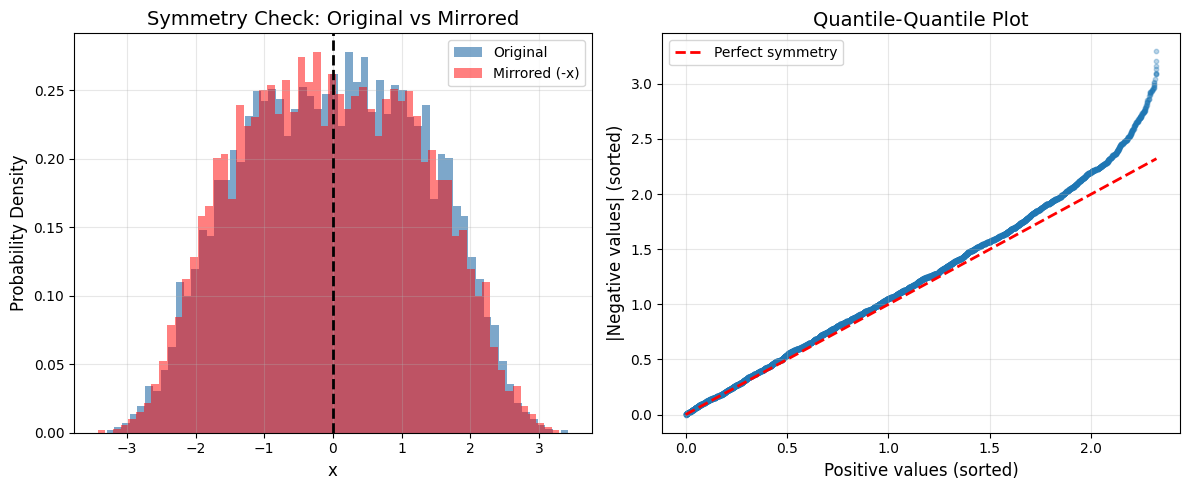

In [444]:
# Test for symmetry around 0

print("=== Symmetry Tests ===\n")

# 1. Basic checks
print(f"Mean: {mean_x:.6f}")
print(f"Median: {median_x:.6f}")

# 2. Skewness test
from scipy.stats import skew, skewtest
skewness = skew(x_values)
print(f"\nSkewness: {skewness:.6f}")
print(f"(Perfectly symmetric distribution has skewness = 0)")

# Statistical test for skewness
skew_z, skew_p = skewtest(x_values)
print(f"\nSkewness test:")
print(f"  Z-score: {skew_z:.4f}")
print(f"  p-value: {skew_p:.6f}")
if skew_p > 0.05:
    print("  → Cannot reject H0: Distribution is symmetric (skewness = 0)")
else:
    print("  → Reject H0: Distribution has significant skewness")

# 3. Compare counts of positive vs negative values
n_positive = np.sum(x_values > 0)
n_negative = np.sum(x_values < 0)
n_zero = np.sum(x_values == 0)

print(f"\n=== Count Analysis ===")
print(f"Positive values: {n_positive} ({n_positive/n_exp*100:.2f}%)")
print(f"Negative values: {n_negative} ({n_negative/n_exp*100:.2f}%)")
print(f"Zero values: {n_zero}")

# Binomial test: if symmetric, p(positive) = 0.5
from scipy.stats import binomtest
result = binomtest(n_positive, n_positive + n_negative, 0.5)
print(f"\nBinomial test (H0: P(x>0) = 0.5):")
print(f"  p-value: {result.pvalue:.6f}")
if result.pvalue > 0.05:
    print("  → Cannot reject H0: Equal probability of positive/negative")
else:
    print("  → Reject H0: Unequal probabilities")

# 4. Visual symmetry test
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x_values, bins=60, density=True, alpha=0.7, color='steelblue', label='Original')
plt.hist(-x_values, bins=60, density=True, alpha=0.5, color='red', label='Mirrored (-x)')
plt.axvline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Symmetry Check: Original vs Mirrored', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Compare quantiles
plt.subplot(1, 2, 2)
sorted_positive = np.sort(x_values[x_values > 0])
sorted_negative = np.sort(-x_values[x_values < 0])  # Take absolute values

# Match lengths
min_len = min(len(sorted_positive), len(sorted_negative))
plt.scatter(sorted_positive[:min_len], sorted_negative[:min_len], alpha=0.3, s=10)
plt.plot([0, max(sorted_positive[:min_len])], [0, max(sorted_positive[:min_len])], 
         'r--', linewidth=2, label='Perfect symmetry')
plt.xlabel('Positive values (sorted)', fontsize=12)
plt.ylabel('|Negative values| (sorted)', fontsize=12)
plt.title('Quantile-Quantile Plot', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== Random Harmonic Series Statistics ===
N = 250, Number of experiments = 10000
Mean: 0.0201
Std Dev: 1.2718
Median: 0.0238
Min: -3.7021
Max: 3.8158


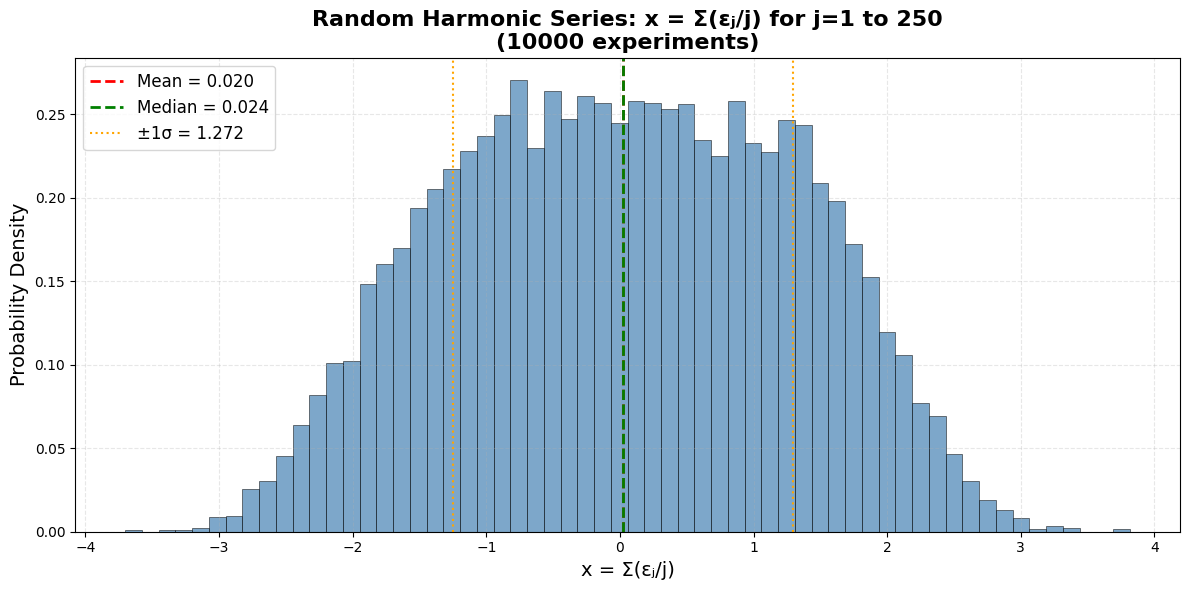

In [445]:

N_harmonic = 250
n_exp = 10000

epsilon = r.choice([-1, 1], size=(n_exp, N_harmonic))


j_values = np.arange(1, N_harmonic + 1)


x_values = np.sum(epsilon / j_values, axis=1)

# Statistics
mean_x = np.mean(x_values)
std_x = np.std(x_values)
median_x = np.median(x_values)

print(f"=== Random Harmonic Series Statistics ===")
print(f"N = {N_harmonic}, Number of experiments = {n_exp}")
print(f"Mean: {mean_x:.4f}")
print(f"Std Dev: {std_x:.4f}")
print(f"Median: {median_x:.4f}")
print(f"Min: {np.min(x_values):.4f}")
print(f"Max: {np.max(x_values):.4f}")

# Create beautiful histogram
plt.figure(figsize=(12, 6))

# Plot histogram
counts, bins, patches = plt.hist(x_values, bins=60, density=True, 
                                  alpha=0.7, color='steelblue', 
                                  edgecolor='black', linewidth=0.5)

# Add statistics lines
plt.axvline(mean_x, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_x:.3f}')
plt.axvline(median_x, color='green', linestyle='--', linewidth=2, label=f'Median = {median_x:.3f}')
plt.axvline(mean_x + std_x, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ = {std_x:.3f}')
plt.axvline(mean_x - std_x, color='orange', linestyle=':', linewidth=1.5)

# Labels and title
plt.xlabel('x = Σ(εⱼ/j)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title(f'Random Harmonic Series: x = Σ(εⱼ/j) for j=1 to {N_harmonic}\n({n_exp} experiments)', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()





=== Kolmogorov-Smirnov Test: N=25 vs N=250 ===
H0: Both distributions come from the same underlying distribution
KS statistic: 0.009300
p-value: 0.780160
→ Cannot reject H0: Distributions are consistent


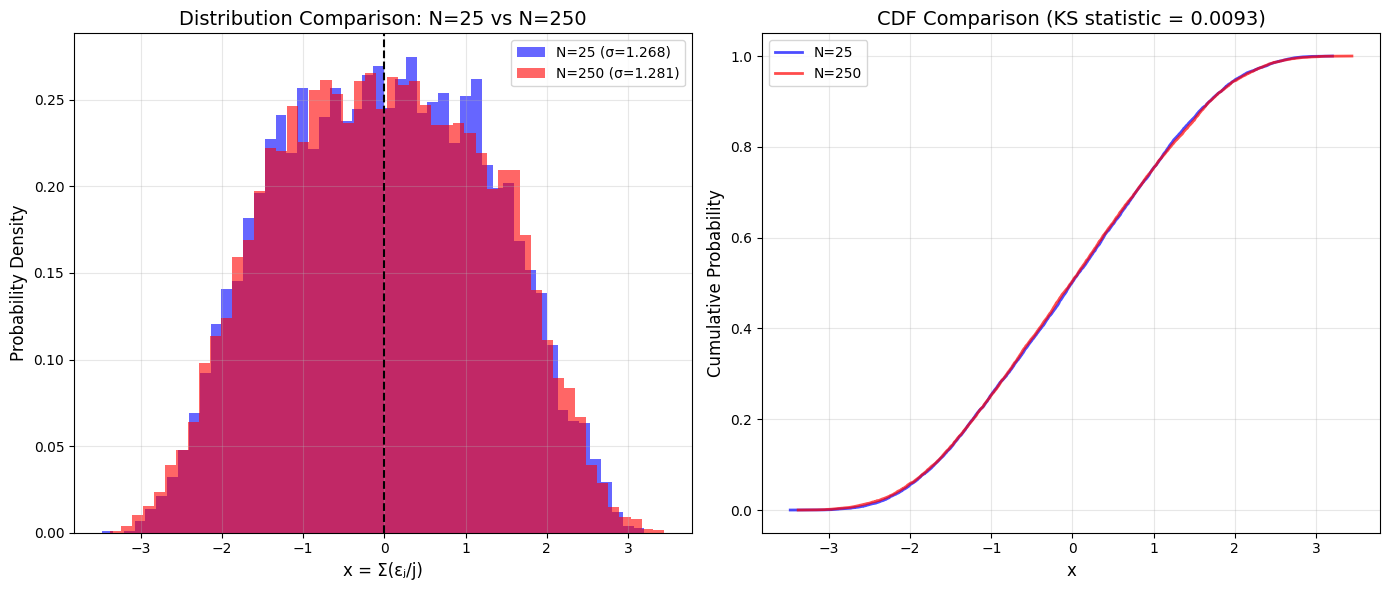


=== Statistics Comparison ===
N=25:  Mean = -0.006727, Std = 1.267926
N=250: Mean = -0.013601, Std = 1.280739

Std Dev ratio: 1.0101


In [446]:
# Compare distributions for N=25 and N=250 using KS test

# First, regenerate N=25 data (save it before running N=250)
N_harmonic_25 = 25
epsilon_25 = r.choice([-1, 1], size=(n_exp, N_harmonic_25))
j_values_25 = np.arange(1, N_harmonic_25 + 1)
x_values_25 = np.sum(epsilon_25 / j_values_25, axis=1)

# N=250 data (already computed)
N_harmonic_250 = 250
epsilon_250 = r.choice([-1, 1], size=(n_exp, N_harmonic_250))
j_values_250 = np.arange(1, N_harmonic_250 + 1)
x_values_250 = np.sum(epsilon_250 / j_values_250, axis=1)

# Kolmogorov-Smirnov test
from scipy.stats import ks_2samp
ks_statistic, ks_pvalue = ks_2samp(x_values_25, x_values_250)

print("=== Kolmogorov-Smirnov Test: N=25 vs N=250 ===")
print(f"H0: Both distributions come from the same underlying distribution")
print(f"KS statistic: {ks_statistic:.6f}")
print(f"p-value: {ks_pvalue:.6f}")
if ks_pvalue > 0.05:
    print("→ Cannot reject H0: Distributions are consistent")
else:
    print("→ Reject H0: Distributions are NOT consistent")

# Visual comparison
plt.figure(figsize=(14, 6))

# Overlapping histograms
plt.subplot(1, 2, 1)
plt.hist(x_values_25, bins=50, density=True, alpha=0.6, color='blue', label=f'N=25 (σ={np.std(x_values_25):.3f})')
plt.hist(x_values_250, bins=50, density=True, alpha=0.6, color='red', label=f'N=250 (σ={np.std(x_values_250):.3f})')
plt.axvline(0, color='black', linestyle='--', linewidth=1.5)
plt.xlabel('x = Σ(εⱼ/j)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution Comparison: N=25 vs N=250', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# CDF comparison
plt.subplot(1, 2, 2)
sorted_25 = np.sort(x_values_25)
sorted_250 = np.sort(x_values_250)
cdf_25 = np.arange(1, len(sorted_25) + 1) / len(sorted_25)
cdf_250 = np.arange(1, len(sorted_250) + 1) / len(sorted_250)

plt.plot(sorted_25, cdf_25, 'b-', linewidth=2, label='N=25', alpha=0.7)
plt.plot(sorted_250, cdf_250, 'r-', linewidth=2, label='N=250', alpha=0.7)
plt.xlabel('x', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.title(f'CDF Comparison (KS statistic = {ks_statistic:.4f})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare statistics
print(f"\n=== Statistics Comparison ===")
print(f"N=25:  Mean = {np.mean(x_values_25):.6f}, Std = {np.std(x_values_25):.6f}")
print(f"N=250: Mean = {np.mean(x_values_250):.6f}, Std = {np.std(x_values_250):.6f}")
print(f"\nStd Dev ratio: {np.std(x_values_250)/np.std(x_values_25):.4f}")

Generating repeated experiments to estimate PDF maximum distribution...

=== Maximum PDF Test (Repeated Sampling) ===
Number of repeated experiments: 1000
Mean of maximum PDF values: 0.2771
Std Dev of maximum PDF values: 0.0078
Standard Error: 0.0002
Theoretical value: 0.25

=== One-Sample t-test ===
H0: Mean of PDF maxima = 0.25
t-statistic: 109.5160
p-value: 0.000000
Degrees of freedom: 999
→ Reject H0: Maximum PDF is NOT consistent with 0.25 (at α=0.05)

95% Confidence Interval: [0.2766, 0.2776]
Does 0.25 fall within CI? False


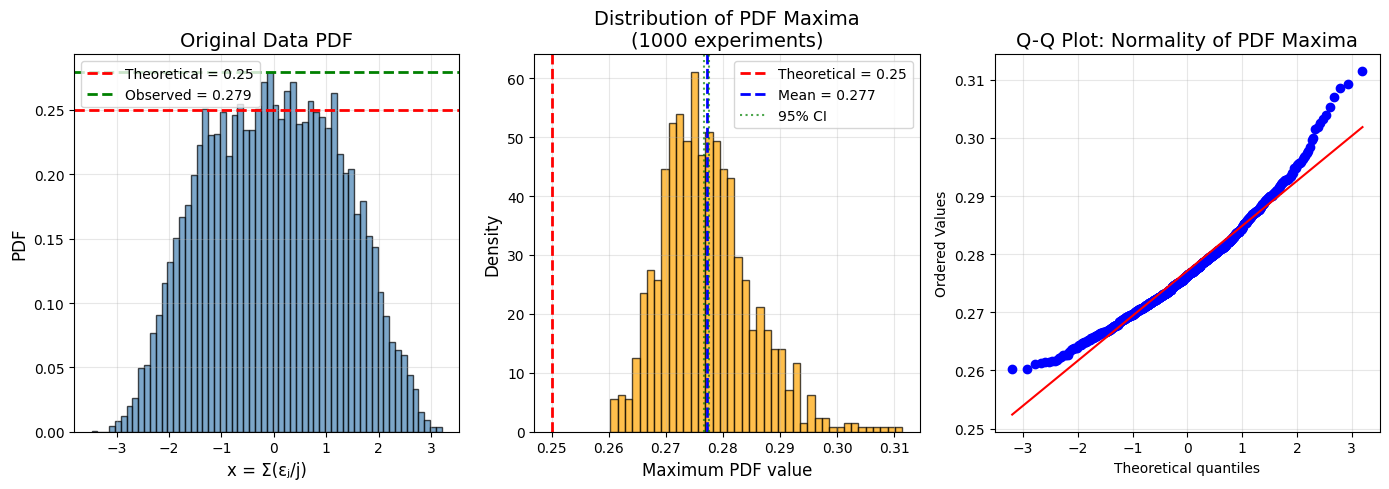


=== Normality Test (Shapiro-Wilk) ===
Statistic: 0.9704
p-value: 0.000000
→ Reject H0: Data may not be normally distributed
  (consider non-parametric test)


In [447]:
# Test if maximum PDF value is consistent with 1/4 (without bootstrap)

# Strategy: Generate multiple experiments, each producing a histogram
# Collect the maximum PDF value from each, then do a t-test

n_samples = 1000  # Number of repeated experiments
max_pdf_values = []

print("Generating repeated experiments to estimate PDF maximum distribution...")

for i in range(n_samples):
    # Generate new data for each experiment
    epsilon_sample = r.choice([-1, 1], size=(n_exp, N_harmonic_25))
    x_sample = np.sum(epsilon_sample / j_values_25, axis=1)
    
    # Get histogram and find maximum PDF
    counts, bins = np.histogram(x_sample, bins=60, density=True)
    max_pdf_values.append(np.max(counts))

max_pdf_values = np.array(max_pdf_values)

# Calculate statistics
mean_max = np.mean(max_pdf_values)
std_max = np.std(max_pdf_values, ddof=1)
se_max = std_max / np.sqrt(n_samples)

print(f"\n=== Maximum PDF Test (Repeated Sampling) ===")
print(f"Number of repeated experiments: {n_samples}")
print(f"Mean of maximum PDF values: {mean_max:.4f}")
print(f"Std Dev of maximum PDF values: {std_max:.4f}")
print(f"Standard Error: {se_max:.4f}")
print(f"Theoretical value: 0.25")

# One-sample t-test: H0: mean of maxima = 0.25
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(max_pdf_values, 0.25)

print(f"\n=== One-Sample t-test ===")
print(f"H0: Mean of PDF maxima = 0.25")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {n_samples - 1}")

if p_value > 0.05:
    print(f"→ Cannot reject H0: Maximum PDF is consistent with 0.25 (at α=0.05)")
else:
    print(f"→ Reject H0: Maximum PDF is NOT consistent with 0.25 (at α=0.05)")

# Calculate confidence interval
from scipy.stats import t as t_dist
ci_level = 0.95
t_critical = t_dist.ppf((1 + ci_level) / 2, n_samples - 1)
ci_lower = mean_max - t_critical * se_max
ci_upper = mean_max + t_critical * se_max

print(f"\n95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Does 0.25 fall within CI? {ci_lower <= 0.25 <= ci_upper}")

# Visualize
plt.figure(figsize=(14, 5))

# Left: Original histogram with observed max
plt.subplot(1, 3, 1)
counts_orig, bins_orig, _ = plt.hist(x_values_25, bins=60, density=True, alpha=0.7, 
                                      color='steelblue', edgecolor='black')
max_pdf_orig = np.max(counts_orig)
plt.axhline(0.25, color='red', linestyle='--', linewidth=2, label='Theoretical = 0.25')
plt.axhline(max_pdf_orig, color='green', linestyle='--', linewidth=2, 
            label=f'Observed = {max_pdf_orig:.3f}')
plt.xlabel('x = Σ(εⱼ/j)', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.title('Original Data PDF', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Middle: Distribution of maximum PDF values
plt.subplot(1, 3, 2)
plt.hist(max_pdf_values, bins=40, alpha=0.7, color='orange', edgecolor='black', density=True)
plt.axvline(0.25, color='red', linestyle='--', linewidth=2, label='Theoretical = 0.25')
plt.axvline(mean_max, color='blue', linestyle='--', linewidth=2, 
            label=f'Mean = {mean_max:.3f}')
plt.axvline(ci_lower, color='green', linestyle=':', linewidth=1.5, alpha=0.7)
plt.axvline(ci_upper, color='green', linestyle=':', linewidth=1.5, alpha=0.7,
            label=f'95% CI')
plt.xlabel('Maximum PDF value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Distribution of PDF Maxima\n({n_samples} experiments)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Right: Q-Q plot for normality check of maxima
plt.subplot(1, 3, 3)
from scipy.stats import probplot
probplot(max_pdf_values, dist="norm", plot=plt)
plt.title('Q-Q Plot: Normality of PDF Maxima', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional normality test (Shapiro-Wilk)
from scipy.stats import shapiro
shapiro_stat, shapiro_p = shapiro(max_pdf_values)
print(f"\n=== Normality Test (Shapiro-Wilk) ===")
print(f"Statistic: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print("→ Cannot reject H0: Data appears normally distributed")
    print("  (t-test is appropriate)")
else:
    print("→ Reject H0: Data may not be normally distributed")
    print("  (consider non-parametric test)")

# Problem 4
### 4.1

In [448]:
dataframe = pd.read_csv('data_BloodPressure.csv', header=0)
ptype, bloodp = dataframe.values.T
dataframe

# Type   Blood Pressure
0          0            109.5
1          0            123.9
2          0            123.5
3          1            169.7
4          0            114.8
...      ...              ...
2493       0            125.2
2494       1            154.3
2495       0            119.9
2496       0            126.0
2497       0            112.4

[2498 rows x 2 columns]

In [449]:
bloodp_healthy = bloodp[ptype == 0]
mean_SBP_healthy = np.mean(bloodp_healthy)
err_SBP_healthy = np.std(bloodp_healthy, ddof=1) / np.sqrt(len(bloodp_healthy))
print(f"Overall Mean SBP = {mean_SBP_healthy:.2f} ± {err_SBP_healthy:.2f} mmHg")

# 95% confidence interval
ci_level = 0.95
t_critical = stats.t.ppf((1 + ci_level) / 2, len(bloodp_healthy) - 1)
ci_lower = mean_SBP_healthy - t_critical * err_SBP_healthy
ci_upper = mean_SBP_healthy + t_critical * err_SBP_healthy
print(f"95% CI for Mean SBP (Healthy): [{ci_lower:.2f}, {ci_upper:.2f}] mmHg")

Overall Mean SBP = 120.66 ± 0.26 mmHg
95% CI for Mean SBP (Healthy): [120.16, 121.17] mmHg


In [450]:
# Calculate ROC curve from two histograms (hist1 is signal, hist2 is background):
def calc_ROC(hist1, hist2) :

    # First we extract the entries (y values) and the edges of the histograms:
    # Note how the "_" is simply used for the rest of what e.g. "hist1" returns (not really of our interest)
    y_sig, x_sig_edges, _ = hist1 
    y_bkg, x_bkg_edges, _ = hist2
    
    # Check that the two histograms have the same x edges:
    if np.array_equal(x_sig_edges, x_bkg_edges) :
        
        # Extract the center positions (x values) of the bins (both signal or background works - equal binning)
        x_centers = 0.5*(x_sig_edges[1:] + x_sig_edges[:-1])
        
        # Calculate the integral (sum) of the signal and background:
        integral_sig = y_sig.sum()
        integral_bkg = y_bkg.sum()
    
        # Initialize empty arrays for the True Positive Rate (TPR) and the False Positive Rate (FPR):
        TPR = np.zeros_like(y_sig) # True positive rate (sensitivity)
        FPR = np.zeros_like(y_sig) # False positive rate ()
        
        # Loop over all bins (x_centers) of the histograms and calculate TN, FP, FN, TP, FPR, and TPR for each bin:
        for i, x in enumerate(x_centers): 
            
            # The cut mask
            cut = (x_centers < x)
            
            # True positive
            TP = np.sum(y_sig[~cut]) / integral_sig    # True positives
            FN = np.sum(y_sig[cut]) / integral_sig     # False negatives
            TPR[i] = TP / (TP + FN)                    # True positive rate
            
            # True negative
            TN = np.sum(y_bkg[cut]) / integral_bkg      # True negatives (background)
            FP = np.sum(y_bkg[~cut]) / integral_bkg     # False positives
            FPR[i] = FP / (FP + TN)                     # False positive rate            
            
        return FPR, TPR
    
    else:
        AssertionError("Signal and Background histograms have different bins and/or ranges")

    #test statistic
    d = abs(bloodp -mean_SBP_healthy)
    

=== Data Summary ===
Healthy (H0): n = 1533
Diseased (H1+H2): n = 965


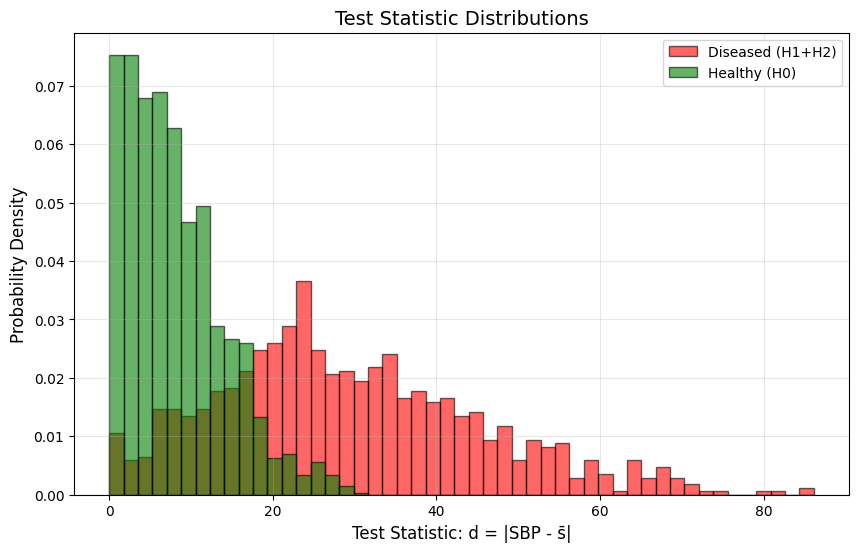

(0.0, 1.0)

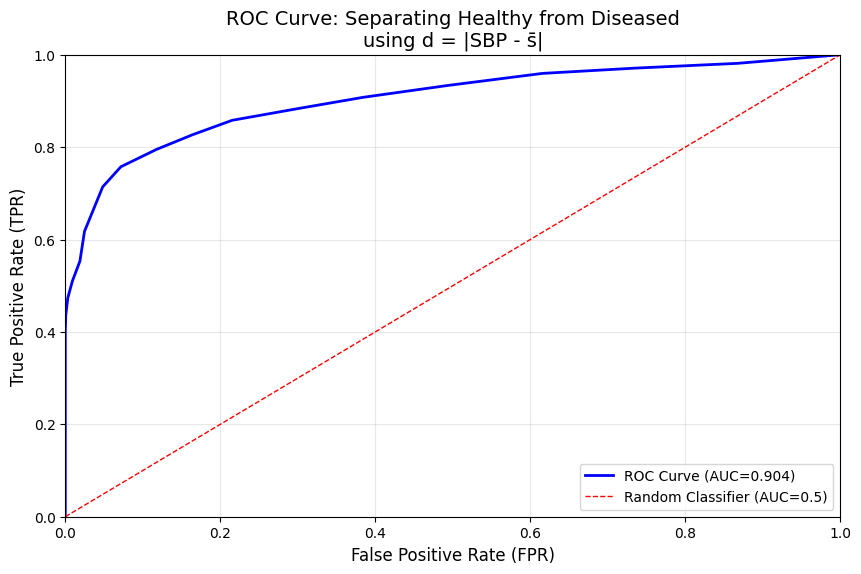

In [451]:

# 4.2: ROC Curve Analysis using test statistic d = |SBP - s̄|

# Separate healthy from diseased patients
healthy_mask = (ptype == 0)
diseased_mask = (ptype == 1) | (ptype == 2)

bloodp_healthy = bloodp[healthy_mask]
bloodp_diseased = bloodp[diseased_mask]

print(f"=== Data Summary ===")
print(f"Healthy (H0): n = {len(bloodp_healthy)}")
print(f"Diseased (H1+H2): n = {len(bloodp_diseased)}")

# Calculate test statistic d = |SBP - mean_healthy|
d_healthy = np.abs(bloodp_healthy - mean_SBP_healthy)
d_diseased = np.abs(bloodp_diseased - mean_SBP_healthy)

# Create histograms for ROC calculation
bins = np.linspace(0, np.max([d_healthy.max(), d_diseased.max()]), 50)

plt.figure(figsize=(10, 6))
hist_diseased = plt.hist(d_diseased, bins=bins, density=True, alpha=0.6, 
                         color='red', label='Diseased (H1+H2)', edgecolor='black')
hist_healthy = plt.hist(d_healthy, bins=bins, density=True, alpha=0.6, 
                        color='green', label='Healthy (H0)', edgecolor='black')
plt.xlabel('Test Statistic: d = |SBP - s̄|', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

plt.title('Test Statistic Distributions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate ROC curve using the provided function
FPR, TPR = calc_ROC(hist_diseased, hist_healthy)

# Calculate AUC
from sklearn.metrics import auc
roc_auc = auc(FPR, TPR)

# Plot ROC curve
plt.figure(figsize=(10, 6))

# Left: ROC curve

plt.plot(FPR, TPR, 'b-', linewidth=2, label=f'ROC Curve (AUC={roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random Classifier (AUC=0.5)')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve: Separating Healthy from Diseased\nusing d = |SBP - s̄|', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])




P(H2 | SBP=98) = P(SBP=98 | H2) × P(H2) / P(SBP=98)

Where:

P(H2 | SBP=98) = Probability patient has H2 given SBP=98 (what we want)
P(SBP=98 | H2) = Likelihood of SBP=98 if patient has H2
P(H2) = Prior probability of having H2 = 0.5 (equal priors)
P(SBP=98) = Total probability of observing SBP=98

In [452]:
# Assuming you have fitted distributions for H0 and H2 from your data
# Extract data for each group
bloodp_h0 = bloodp[ptype == 0]  # Healthy
bloodp_h2 = bloodp[ptype == 2]  # Disease H2

# Fit Gaussian distributions
from scipy.stats import norm

mu_h0 = np.mean(bloodp_h0)
sigma_h0 = np.std(bloodp_h0, ddof=1)

mu_h2 = np.mean(bloodp_h2)
sigma_h2 = np.std(bloodp_h2, ddof=1)

print(f"H0: μ={mu_h0:.2f}, σ={sigma_h0:.2f}")
print(f"H2: μ={mu_h2:.2f}, σ={sigma_h2:.2f}")

# Observed SBP
sbp_obs = 98

# Likelihoods
likelihood_h0 = norm.pdf(sbp_obs, mu_h0, sigma_h0)
likelihood_h2 = norm.pdf(sbp_obs, mu_h2, sigma_h2)

print(f"\nP(SBP=98 | H0) = {likelihood_h0:.6f}")
print(f"P(SBP=98 | H2) = {likelihood_h2:.6f}")

# Priors (equal)
prior_h0 = 0.5
prior_h2 = 0.5

# Total probability P(SBP=98)
p_sbp = likelihood_h0 * prior_h0 + likelihood_h2 * prior_h2

# Posterior probability using Bayes' theorem
posterior_h2 = (likelihood_h2 * prior_h2) / p_sbp
posterior_h0 = (likelihood_h0 * prior_h0) / p_sbp

print(f"\n=== Bayesian Posterior Probabilities ===")
print(f"P(H0 | SBP=98) = {posterior_h0:.4f}")
print(f"P(H2 | SBP=98) = {posterior_h2:.4f}")
print(f"\nInterpretation: Given SBP=98, there's a {posterior_h2*100:.1f}% chance the patient has H2")

H0: μ=120.66, σ=10.05
H2: μ=98.14, σ=6.51

P(SBP=98 | H0) = 0.003116
P(SBP=98 | H2) = 0.061279

=== Bayesian Posterior Probabilities ===
P(H0 | SBP=98) = 0.0484
P(H2 | SBP=98) = 0.9516

Interpretation: Given SBP=98, there's a 95.2% chance the patient has H2


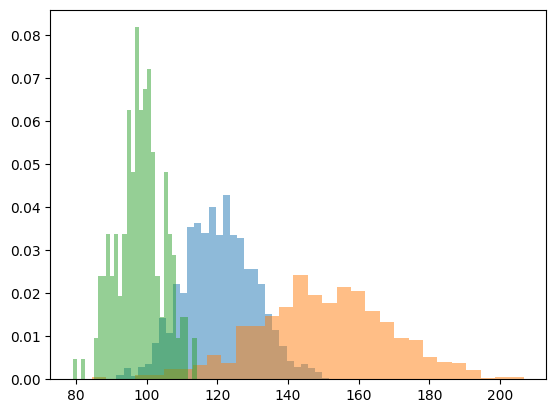

In [453]:
bloodp_h1 = bloodp[ptype == 1]  # Disease H1

plt.hist(bloodp_h0, bins=30, density=True, alpha=0.5, label='H0')
plt.hist(bloodp_h1, bins=30, density=True, alpha=0.5, label='H1')
plt.hist(bloodp_h2, bins=30, density=True, alpha=0.5, label='H2');


In [454]:
# Get histogram counts and bin centers
counts, bin_edges = np.histogram(bloodp_h0, bins=30)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]

# Uncertainties (Poisson)
counts_err = np.sqrt(counts)
counts_err[counts_err == 0] = 1  # Avoid division by zero

# Define Gaussian PDF scaled by total counts and bin width
def gaussian_hist(x, mu, sigma):
    N_total = len(bloodp_h0)
    return N_total * bin_width * stats.norm.pdf(x, mu, sigma)

# Fit using Minuit
cfit = cost.LeastSquares(bin_centers, counts, counts_err, gaussian_hist)
mfit = Minuit(cfit, mu=120, sigma=10)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 44.56 (χ²/ndof = 1.6)      │              Nfcn = 37               │
│ EDM = 1.3e-08 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  120.82   │   0.25    │            │            │         │         │       │
│ 1 │ sigma │   9.85    │   0.18    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────┐
│       │     mu  sigma │
├───────┼───────────────┤
│    mu │ 0.0642  0.006 │
│ sigma │  0.006 0.0339 │
└───────┴───────────────┘

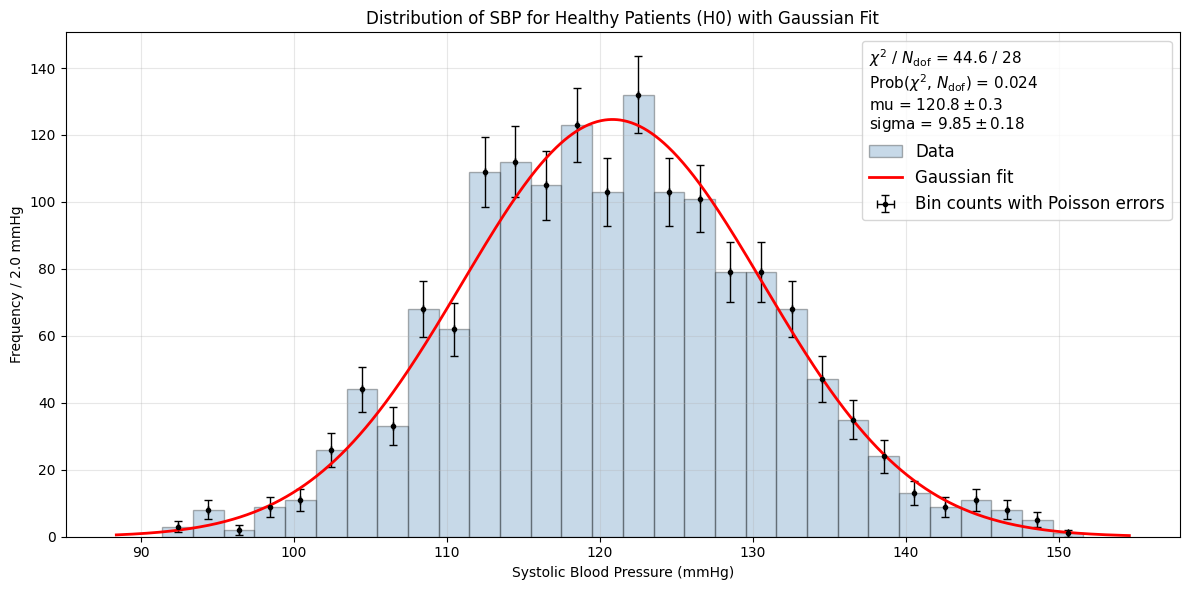

In [455]:
# Create figure and plot histogram with fit
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram as bars (not errorbar)
ax.hist(bloodp_h0, bins=30, alpha=0.3, color='steelblue', edgecolor='black', label='Data')

# Plot bin centers with Poisson errors
ax.errorbar(bin_centers, counts, yerr=counts_err, xerr=0.0, 
            fmt='.k', ecolor='k', elinewidth=1, capsize=3, capthick=1,
            label='Bin counts with Poisson errors')

# Set labels
ax.set(xlabel="Systolic Blood Pressure (mmHg)", 
       ylabel=f"Frequency / {bin_width:.1f} mmHg",
       title="Distribution of SBP for Healthy Patients (H0) with Gaussian Fit",
       ylim=[0, None])

# Get x limits for smooth curve
xmin, xmax = ax.get_xlim()

# Plot fitted Gaussian curve
x_axis = np.linspace(xmin, xmax, 1000)
ax.plot(x_axis, gaussian_hist(x_axis, *mfit.values[:]), '-r', linewidth=2,
        label="Gaussian fit")

# Calculate chi-square statistics
chi2 = mfit.fval
Ndof = len(bin_centers[counts > 0]) - mfit.nfit  # Only non-empty bins
Prob = stats.chi2.sf(chi2, Ndof)

# Create fit info text
fit_info = [
    f"$\\chi^2$ / $N_{{\\mathrm{{dof}}}}$ = {chi2:.1f} / {Ndof}",
    f"Prob($\\chi^2$, $N_{{\\mathrm{{dof}}}}$) = {Prob:.3f}",
]

for p, v, e in zip(mfit.parameters, mfit.values[:], mfit.errors[:]):
    Ndecimals = max(0, -np.int32(np.log10(e) - 1 - np.log10(2)))
    fit_info.append(f"{p} = ${v:.{Ndecimals}f} \\pm {e:.{Ndecimals}f}$")

# Add legend with fit results
plt.legend(title="\n".join(fit_info), fontsize=12, title_fontsize=11, 
           loc='upper right', alignment='left')
plt.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


=== H0 (Healthy) Fit Results ===
μ = 120.82 ± 0.25 mmHg
σ = 9.85 ± 0.18 mmHg
χ²/ndof = 44.56/28 = 1.592
p-value = 0.0244

=== H1 (Disease 1) Fit Results ===
μ = 150.58 ± 0.65 mmHg
σ = 18.34 ± 0.50 mmHg
χ²/ndof = 31.44/26 = 1.209
p-value = 0.2123

=== H2 (Disease 2) Fit Results ===
μ = 98.01 ± 0.50 mmHg
σ = 6.53 ± 0.48 mmHg
χ²/ndof = 34.40/24 = 1.433
p-value = 0.0778


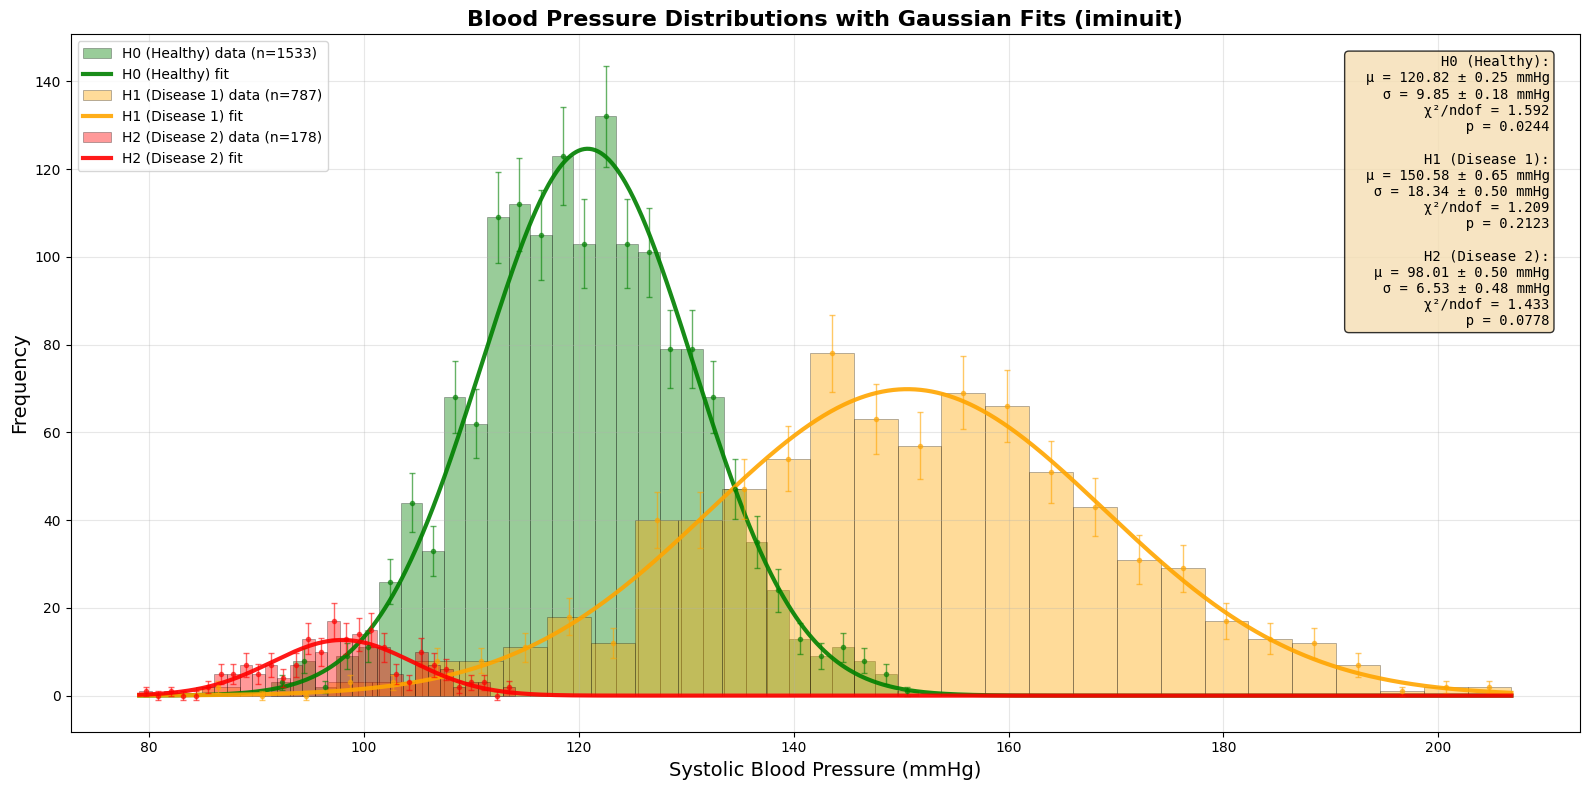


=== Summary Table ===
Group           n        μ (mmHg)           σ (mmHg)           χ²/ndof    p-value   
-------------------------------------------------------------------------------------
H0 (Healthy)    1533     120.82±0.25       9.85±0.18       1.592      0.0244    
H1 (Disease 1)  787      150.58±0.65       18.34±0.50       1.209      0.2123    
H2 (Disease 2)  178      98.01±0.50       6.53±0.48       1.433      0.0778    


In [456]:
# Extract data for each patient type
bloodp_h0 = bloodp[ptype == 0]  # Healthy
bloodp_h1 = bloodp[ptype == 1]  # Disease H1
bloodp_h2 = bloodp[ptype == 2]  # Disease H2

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Use same bins for all three groups
bins = 30
x_range = np.linspace(bloodp.min(), bloodp.max(), 1000)

# Store fit results for legend
fit_results = []

# Function to fit and plot each group
def fit_and_plot_group(data, color, label):
    # Get histogram
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_width = bin_edges[1] - bin_edges[0]
    
    # Poisson errors
    counts_err = np.sqrt(counts)
    counts_err[counts_err == 0] = 1
    
    # Plot histogram
    ax.hist(data, bins=bins, alpha=0.4, color=color, 
            edgecolor='black', linewidth=0.5, label=f'{label} data (n={len(data)})')
    
    # Plot error bars on bin centers
    ax.errorbar(bin_centers, counts, yerr=counts_err, 
                fmt='.', color=color, elinewidth=1, capsize=2, alpha=0.6)
    
    # Define Gaussian model
    def gaussian_hist(x, mu, sigma):
        N_total = len(data)
        return N_total * bin_width * stats.norm.pdf(x, mu, sigma)
    
    # Fit using Minuit
    cfit = cost.LeastSquares(bin_centers, counts, counts_err, gaussian_hist)
    mfit = Minuit(cfit, mu=np.mean(data), sigma=np.std(data, ddof=1))
    mfit.migrad()
    
    # Calculate chi2/ndof and p-value
    chi2 = mfit.fval
    ndof = len(bin_centers[counts > 0]) - mfit.nfit
    chi2_ndof = chi2 / ndof
    p_value = stats.chi2.sf(chi2, ndof)
    
    # Plot fitted curve (all solid lines, darker shade)
    ax.plot(x_range, gaussian_hist(x_range, *mfit.values[:]), 
            color=color, linewidth=3, linestyle='-', alpha=0.9,
            label=f'{label} fit')
    
    # Store fit info for legend
    fit_info = {
        'label': label,
        'mu': mfit.values['mu'],
        'mu_err': mfit.errors['mu'],
        'sigma': mfit.values['sigma'],
        'sigma_err': mfit.errors['sigma'],
        'chi2_ndof': chi2_ndof,
        'p_value': p_value
    }
    fit_results.append(fit_info)
    
    # Print fit results
    print(f"\n=== {label} Fit Results ===")
    print(f"μ = {mfit.values['mu']:.2f} ± {mfit.errors['mu']:.2f} mmHg")
    print(f"σ = {mfit.values['sigma']:.2f} ± {mfit.errors['sigma']:.2f} mmHg")
    print(f"χ²/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}")
    print(f"p-value = {p_value:.4f}")
    
    return mfit

# Fit all three groups
mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0 (Healthy)')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1 (Disease 1)')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2 (Disease 2)')

# Create custom legend with fit statistics in 3 columns
legend_text = ""
for result in fit_results:
    legend_text += f"{result['label']}:\n"
    legend_text += f"  μ = {result['mu']:.2f} ± {result['mu_err']:.2f} mmHg\n"
    legend_text += f"  σ = {result['sigma']:.2f} ± {result['sigma_err']:.2f} mmHg\n"
    legend_text += f"  χ²/ndof = {result['chi2_ndof']:.3f}\n"
    legend_text += f"  p = {result['p_value']:.4f}\n\n"

# Add text box with fit statistics
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.97, legend_text.strip(), transform=ax.transAxes,
        fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=props, family='monospace')

# Labels and formatting
ax.set_xlabel('Systolic Blood Pressure (mmHg)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Blood Pressure Distributions with Gaussian Fits (iminuit)', 
             fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=10, ncol=1)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics comparison table
print("\n=== Summary Table ===")
print(f"{'Group':<15} {'n':<8} {'μ (mmHg)':<18} {'σ (mmHg)':<18} {'χ²/ndof':<10} {'p-value':<10}")
print("-" * 85)
for label, mfit, data, result in [('H0 (Healthy)', mfit_h0, bloodp_h0, fit_results[0]),
                                   ('H1 (Disease 1)', mfit_h1, bloodp_h1, fit_results[1]),
                                   ('H2 (Disease 2)', mfit_h2, bloodp_h2, fit_results[2])]:
    print(f"{label:<15} {len(data):<8} "
          f"{mfit.values['mu']:.2f}±{mfit.errors['mu']:.2f}       "
          f"{mfit.values['sigma']:.2f}±{mfit.errors['sigma']:.2f}       "
          f"{result['chi2_ndof']:<10.3f} {result['p_value']:<10.4f}")


=== H0 (Gaussian) Fit Results ===
mu = 120.8223 ± 0.2533
sigma = 9.8466 ± 0.1841
χ²/ndof = 44.56/28 = 1.592
p-value = 0.0244

=== H1 (Gaussian) Fit Results ===
mu = 150.5842 ± 0.6543
sigma = 18.3405 ± 0.4997
χ²/ndof = 31.44/26 = 1.209
p-value = 0.2123

=== H2 (Gaussian) Fit Results ===
mu = 98.0068 ± 0.4971
sigma = 6.5315 ± 0.4761
χ²/ndof = 34.40/24 = 1.433
p-value = 0.0778

=== H0 (Student-t) Fit Results ===
mu = 120.8206 ± 0.2542
sigma = 9.7785 ± 0.1839
nu = 99.9992 ± 97.2639
χ²/ndof = 44.97/27 = 1.665
p-value = 0.0164

=== H1 (Student-t) Fit Results ===
mu = 150.5600 ± 0.6593
sigma = 18.0670 ± 0.7876
nu = 48.7949 ± 65.6792
χ²/ndof = 31.25/25 = 1.250
p-value = 0.1809

=== H2 (Student-t) Fit Results ===
mu = 98.1152 ± 0.4747
sigma = 5.1369 ± 0.5734
nu = 2.1000 ± 0.7464
χ²/ndof = 28.83/23 = 1.253
p-value = 0.1861

=== H0 (Cauchy) Fit Results ===
mu = 120.6107 ± 0.3510
gamma = 6.9709 ± 0.2302
χ²/ndof = 224.05/28 = 8.002
p-value = 0.0000

=== H1 (Cauchy) Fit Results ===
mu = 150.3467 ± 

C:\Users\villa\AppData\Local\Temp\ipykernel_58200\4251304897.py:219: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


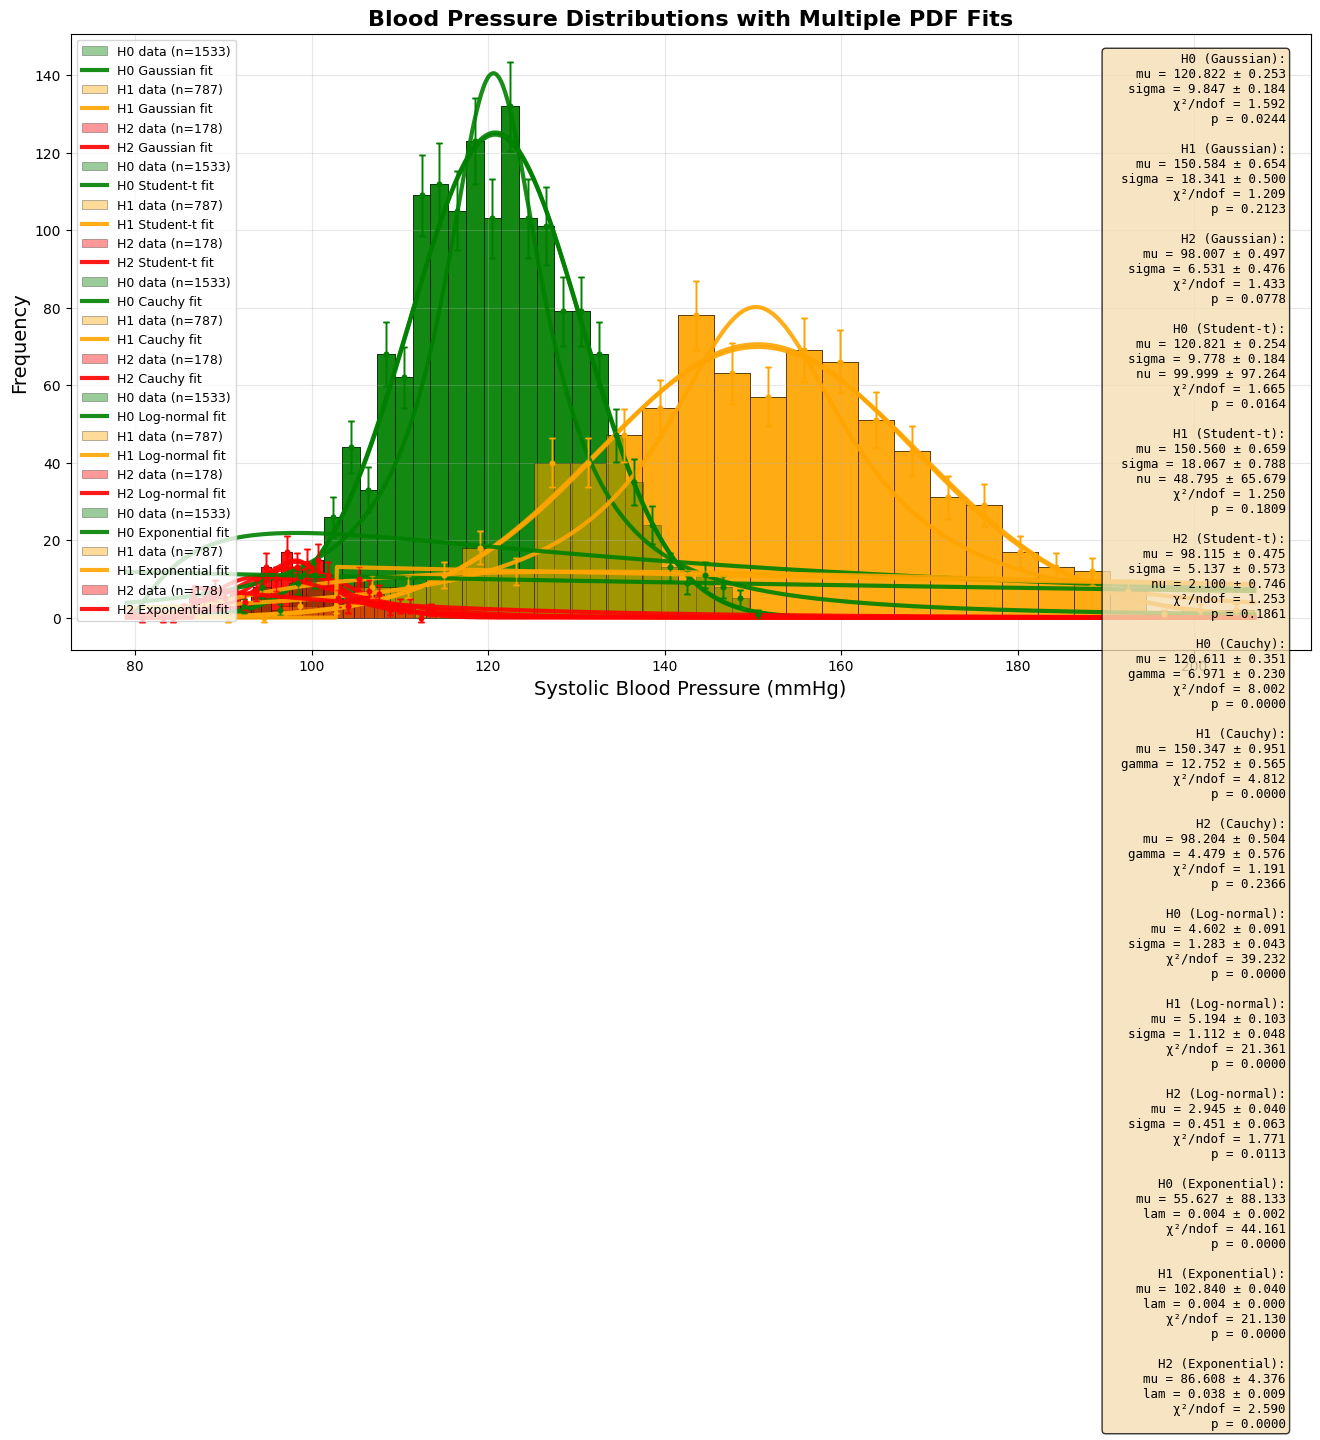


=== Summary Table ===
Group                Model           χ²/ndof    p-value   
------------------------------------------------------------
H0                   Gaussian        1.592      0.0244    
H1                   Gaussian        1.209      0.2123    
H2                   Gaussian        1.433      0.0778    
H0                   Student-t       1.665      0.0164    
H1                   Student-t       1.250      0.1809    
H2                   Student-t       1.253      0.1861    
H0                   Cauchy          8.002      0.0000    
H1                   Cauchy          4.812      0.0000    
H2                   Cauchy          1.191      0.2366    
H0                   Log-normal      39.232     0.0000    
H1                   Log-normal      21.361     0.0000    
H2                   Log-normal      1.771      0.0113    
H0                   Exponential     44.161     0.0000    
H1                   Exponential     21.130     0.0000    
H2                   Exponentia

In [457]:
# Extract data for each patient type
bloodp_h0 = bloodp[ptype == 0]  # Healthy
bloodp_h1 = bloodp[ptype == 1]  # Disease H1
bloodp_h2 = bloodp[ptype == 2]  # Disease H2

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Use same bins for all three groups
bins = 30
x_range = np.linspace(bloodp.min(), bloodp.max(), 1000)

# Store fit results for legend
fit_results = []

# ==================== FACTORY FUNCTIONS FOR DIFFERENT PDFs ====================

def make_gaussian_model(N_total, bin_width):
    """Gaussian (Normal) distribution"""
    def model(x, mu, sigma):
        return N_total * bin_width * stats.norm.pdf(x, mu, sigma)
    return model

def make_student_t_model(N_total, bin_width):
    """Student's t-distribution with variable degrees of freedom"""
    def model(x, mu, sigma, nu):
        return N_total * bin_width * stats.t.pdf(x, df=nu, loc=mu, scale=sigma)
    return model

def make_cauchy_model(N_total, bin_width):
    """Cauchy (Lorentz) distribution - heavy tails"""
    def model(x, mu, gamma):
        return N_total * bin_width * stats.cauchy.pdf(x, loc=mu, scale=gamma)
    return model

def make_laplace_model(N_total, bin_width):
    """Laplace (double exponential) distribution"""
    def model(x, mu, b):
        return N_total * bin_width * stats.laplace.pdf(x, loc=mu, scale=b)
    return model

def make_lognormal_model(N_total, bin_width):
    """Log-normal distribution (for positive data)"""
    def model(x, mu, sigma):
        # Shift x to ensure positivity
        x_shifted = x - x.min() + 1e-6
        return N_total * bin_width * stats.lognorm.pdf(x_shifted, s=sigma, scale=np.exp(mu))
    return model

def make_exponential_model(N_total, bin_width):
    """Exponential distribution (for positive data)"""
    def model(x, mu, lam):
        x_shifted = x - mu
        pdf = np.zeros_like(x)
        mask = x_shifted >= 0
        pdf[mask] = stats.expon.pdf(x_shifted[mask], scale=1/lam)
        return N_total * bin_width * pdf
    return model

# ==================== MAIN FITTING FUNCTION ====================

def fit_and_plot_group(data, color, label, pdf_type='gaussian'):
    """
    Fit and plot histogram with chosen PDF
    
    Parameters:
    -----------
    pdf_type : str
        'gaussian', 'student_t', 'cauchy', 'laplace', 'lognormal', 'exponential'
    """
    # Get histogram
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_width = bin_edges[1] - bin_edges[0]
    
    # Poisson errors
    counts_err = np.sqrt(counts)
    counts_err[counts_err == 0] = 1
    
    # Plot histogram
    ax.hist(data, bins=bins, alpha=0.4, color=color, 
            edgecolor='black', linewidth=0.5, label=f'{label} data (n={len(data)})')
    
    ax.errorbar(bin_centers, counts, yerr=counts_err, 
                fmt='.', color=color, elinewidth=1, capsize=2, alpha=0.6)
    
    # Choose model and initial parameters based on pdf_type
    mu_init = np.mean(data)
    sigma_init = np.std(data, ddof=1)
    
    if pdf_type == 'gaussian':
        model = make_gaussian_model(len(data), bin_width)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=mu_init, sigma=sigma_init)
        model_name = "Gaussian"
        
    elif pdf_type == 'student_t':
        model = make_student_t_model(len(data), bin_width)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=mu_init, sigma=sigma_init, nu=10)
        mfit.limits['nu'] = (2.1, 100)
        model_name = "Student-t"
        
    elif pdf_type == 'cauchy':
        model = make_cauchy_model(len(data), bin_width)
        # Cauchy uses gamma (scale parameter) instead of sigma
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=mu_init, gamma=sigma_init/2)
        mfit.limits['gamma'] = (0.01, None)
        model_name = "Cauchy"
        
    elif pdf_type == 'laplace':
        model = make_laplace_model(len(data), bin_width)
        # Laplace uses b (scale parameter)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=mu_init, b=sigma_init/np.sqrt(2))
        mfit.limits['b'] = (0.01, None)
        model_name = "Laplace"
        
    elif pdf_type == 'lognormal':
        model = make_lognormal_model(len(data), bin_width)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=np.log(mu_init), sigma=0.5)
        mfit.limits['sigma'] = (0.01, None)
        model_name = "Log-normal"
        
    elif pdf_type == 'exponential':
        model = make_exponential_model(len(data), bin_width)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=data.min(), lam=1/sigma_init)
        mfit.limits['lam'] = (1e-6, None)
        model_name = "Exponential"
        
    else:
        raise ValueError(f"Unknown pdf_type: {pdf_type}")
    
    mfit.migrad()
    
    # Calculate chi2/ndof and p-value
    chi2 = mfit.fval
    ndof = len(bin_centers[counts > 0]) - mfit.nfit
    chi2_ndof = chi2 / ndof
    p_value = stats.chi2.sf(chi2, ndof)
    
    # Plot fitted curve
    ax.plot(x_range, model(x_range, *mfit.values[:]), 
            color=color, linewidth=3, linestyle='-', alpha=0.9,
            label=f'{label} {model_name} fit')
    
    # Store fit info for legend
    fit_info = {
        'label': label,
        'model': model_name,
        'params': {p: (v, e) for p, v, e in zip(mfit.parameters, mfit.values, mfit.errors)},
        'chi2_ndof': chi2_ndof,
        'p_value': p_value
    }
    fit_results.append(fit_info)
    
    # Print fit results
    print(f"\n=== {label} ({model_name}) Fit Results ===")
    for p, v, e in zip(mfit.parameters, mfit.values, mfit.errors):
        print(f"{p} = {v:.4f} ± {e:.4f}")
    print(f"χ²/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}")
    print(f"p-value = {p_value:.4f}")
    
    return mfit

# ==================== FIT ALL THREE GROUPS ====================
# Try different combinations!
# All Gaussian
mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='gaussian')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='gaussian')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='gaussian')

# Mix and match
mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='student_t')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='student_t')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='student_t')

# Heavy-tailed distributions
mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='cauchy')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='cauchy')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='cauchy')

mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='lognormal')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='lognormal')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='lognormal')

mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='exponential')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='exponential')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='exponential')



# # ==================== CREATE LEGEND ====================

legend_text = ""
for result in fit_results:
    legend_text += f"{result['label']} ({result['model']}):\n"
    for param, (val, err) in result['params'].items():
        legend_text += f"  {param} = {val:.3f} ± {err:.3f}\n"
    legend_text += f"  χ²/ndof = {result['chi2_ndof']:.3f}\n"
    legend_text += f"  p = {result['p_value']:.4f}\n\n"

# Add text box with fit statistics
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.97, legend_text.strip(), transform=ax.transAxes,
        fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=props, family='monospace')

# Labels and formatting
ax.set_xlabel('Systolic Blood Pressure (mmHg)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Blood Pressure Distributions with Multiple PDF Fits', 
             fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=9, ncol=1)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ==================== SUMMARY TABLE ====================

print("\n=== Summary Table ===")
print(f"{'Group':<20} {'Model':<15} {'χ²/ndof':<10} {'p-value':<10}")
print("-" * 60)
for result in fit_results:
    print(f"{result['label']:<20} {result['model']:<15} "
          f"{result['chi2_ndof']:<10.3f} {result['p_value']:<10.4f}")

# Problem 5
## 5.2

In [458]:
dataframe = pd.read_csv('data_RunningTimes.csv', header=0)
dist, t, sigma_t = dataframe.values.T
dataframe

Distance      time   uncertainty
0       50.0      5.40          0.37
1       60.0      6.25          0.43
2       91.4      9.00          0.59
3      100.0      9.58          0.64
4      150.0     14.35          0.90
5      200.0     19.19          1.16
6      201.2     19.50          1.37
7      300.0     30.69          1.68
8      400.0     43.03          2.20
9      500.0     57.69          2.71
10     600.0     72.81          3.23
11     800.0    100.91          4.25
12    1000.0    131.96          5.27
13    1500.0    206.00          7.81
14    1600.0    231.83          8.32
15    1609.3    232.13          8.21
16    2000.0    283.13         10.35
17    3000.0    440.67         15.41
18    3200.0    471.35         16.42
19    3219.6    473.10         18.52
20    5000.0    755.36         25.50

Estimated velocity: 8.44 m/s

Fitted velocity: v = 7.7889 ± 0.0817 m/s

χ²/ndof = 237.24/20 = 11.862
p-value = 0.0000


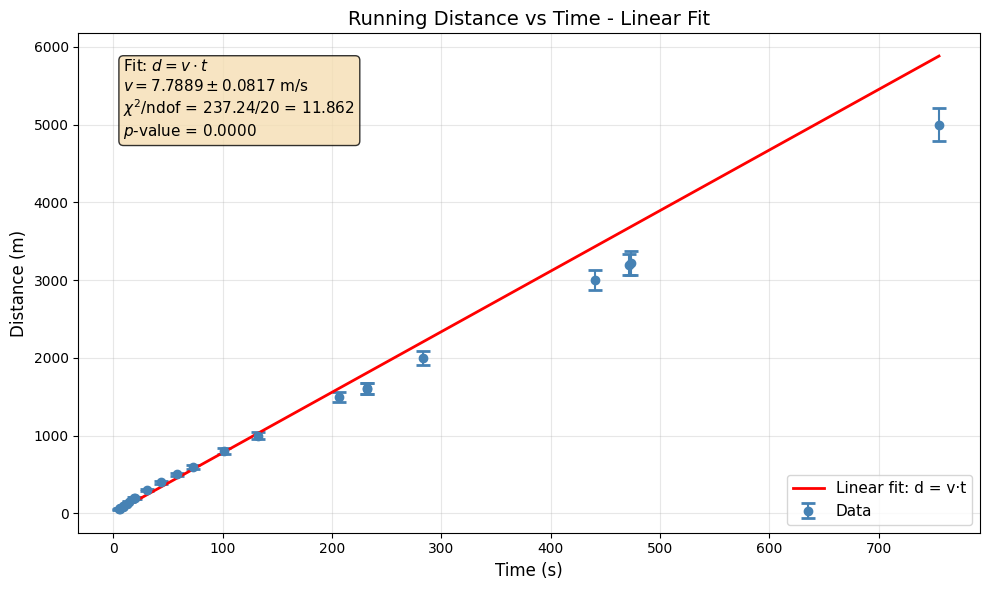

In [459]:

# estimate error on d to get fit
#start wth estimate v
v_estimate = np.mean(dist / t)
print(f"Estimated velocity: {v_estimate:.2f} m/s")

# Convert sigma_t to sigma_d using estimated v
sigma_d = v_estimate * sigma_t

def func_run(t, v):
    return v * t


cfit = cost.LeastSquares(t, dist, sigma_d, func_run)
m = Minuit(cfit, v=v_estimate)
m.migrad()

# Step 5: Get fitted velocity
v_fit = m.values['v']
sigma_v_fit = m.errors['v']

print(f"\nFitted velocity: v = {v_fit:.4f} ± {sigma_v_fit:.4f} m/s")

# Step 6: Recalculate sigma_d with fitted v (optional refinement)
sigma_d_final = np.sqrt((t * sigma_v_fit)**2 + (v_fit * sigma_t)**2)

# Step 7: Calculate chi-square
chi2 = m.fval
ndof = len(t) - m.nfit
chi2_ndof = chi2 / ndof
p_value = stats.chi2.sf(chi2, ndof)

print(f"\nχ²/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}")
print(f"p-value = {p_value:.4f}")


# Plot with fit info box
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(t, dist, yerr=sigma_d, fmt='o', color='steelblue', 
            markersize=6, capsize=5, capthick=2, label='Data')

t_smooth = np.linspace(t.min(), t.max(), 100)
ax.plot(t_smooth, func_run(t_smooth, v_fit), 'r-', linewidth=2,
        label='Linear fit: d = v·t')

# Create fit info text
fit_info_text = (
    f'Fit: $d = v \\cdot t$\n'
    f'$v = {v_fit:.4f} \\pm {sigma_v_fit:.4f}$ m/s\n'
    f'$\\chi^2$/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}\n'
    f'$p$-value = {p_value:.4f}'
)

# Add text box
ax.text(0.05, 0.95, fit_info_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Distance (m)', fontsize=12)
ax.set_title('Running Distance vs Time - Linear Fit', fontsize=14)
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




=== Model Comparison ===
Model           χ²         ndof   χ²/ndof    p-value   
------------------------------------------------------------
Linear          237.24     20     11.862     0.0000    
Deceleration    98.17      19     5.167      0.0000    
Exponential     79.02      19     4.159      0.0000    
Power Law       26.88      19     1.415      0.1076    


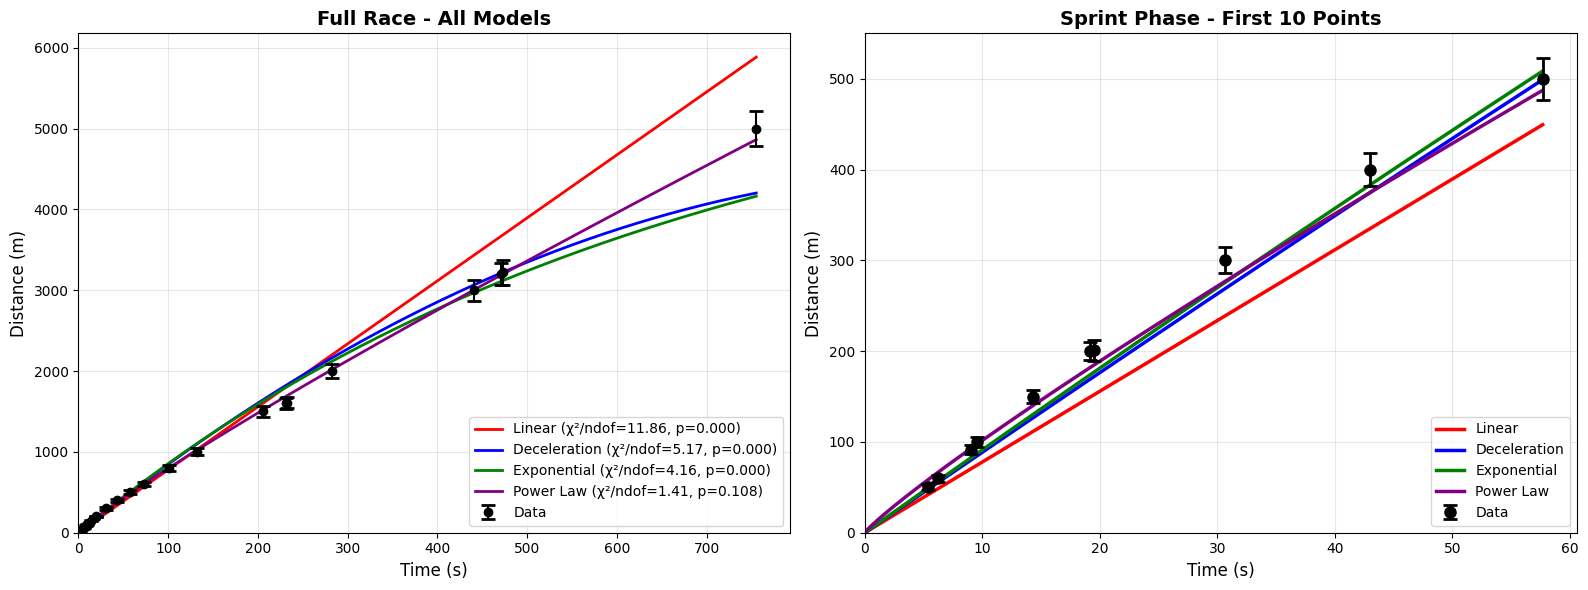

In [460]:
# === Model 1: Constant Deceleration ===
def func_run_decel(t, v0, a):
    return v0 * t - 0.5 * a * t**2

cfit_decel = cost.LeastSquares(t, dist, sigma_d, func_run_decel)
m_decel = Minuit(cfit_decel, v0=7.0, a=0.001)
m_decel.limits['a'] = (0, None)  # Deceleration must be positive
m_decel.migrad()

# === Model 2: Exponential Fatigue ===
def func_run_exp(t, v0, tau):
    return v0 * tau * (1 - np.exp(-t / tau))

cfit_exp = cost.LeastSquares(t, dist, sigma_d, func_run_exp)
m_exp = Minuit(cfit_exp, v0=8.0, tau=200)
m_exp.limits['v0'] = (0, None)
m_exp.limits['tau'] = (1, None)
m_exp.migrad()

# === Model 3: Power Law ===
def func_run_power(t, v0, alpha):
    return v0 * t**(1 - alpha) / (1 - alpha)

cfit_power = cost.LeastSquares(t, dist, sigma_d, func_run_power)
m_power = Minuit(cfit_power, v0=7.0, alpha=0.1)
m_power.limits['v0'] = (0, None)
m_power.limits['alpha'] = (0, 0.99)  # Must be < 1 for d→∞ as t→∞
m_power.migrad()

# === Compare All Models ===
models = [
    ('Linear', m, func_run),
    ('Deceleration', m_decel, func_run_decel),
    ('Exponential', m_exp, func_run_exp),
    ('Power Law', m_power, func_run_power)
]

print("\n=== Model Comparison ===")
print(f"{'Model':<15} {'χ²':<10} {'ndof':<6} {'χ²/ndof':<10} {'p-value':<10}")
print("-" * 60)

for name, minuit, func in models:
    chi2 = minuit.fval
    ndof = len(t) - minuit.nfit
    chi2_ndof = chi2 / ndof
    p_val = stats.chi2.sf(chi2, ndof)
    print(f"{name:<15} {chi2:<10.2f} {ndof:<6} {chi2_ndof:<10.3f} {p_val:<10.4f}")

# # === Plot All Fits ===
# fig, ax = plt.subplots(figsize=(12, 7))

# ax.errorbar(t, dist, yerr=sigma_d, fmt='o', color='black', 
#             markersize=6, capsize=5, capthick=2, label='Data', zorder=10)

# t_smooth = np.linspace(0, t.max(), 500)
# colors = ['red', 'blue', 'green', 'purple']

# for (name, minuit, func), color in zip(models, colors):
#     d_fit = func(t_smooth, *minuit.values[:])
#     chi2_ndof = minuit.fval / (len(t) - minuit.nfit)
#     p_val = stats.chi2.sf(minuit.fval, len(t) - minuit.nfit)
    
#     ax.plot(t_smooth, d_fit, color=color, linewidth=2, 
#             label=f'{name} (χ²/ndof={chi2_ndof:.2f}, p={p_val:.3f})')

# ax.set_xlabel('Time (s)', fontsize=12)
# ax.set_ylabel('Distance (m)', fontsize=12)
# ax.set_title('Running Distance vs Time - Model Comparison', fontsize=14)
# ax.legend(loc='lower right', fontsize=10)
# ax.grid(True, alpha=0.3)
# ax.set_xlim(0, None)
# ax.set_ylim(0, None)
# plt.tight_layout()
# plt.show()

# # === Plot Residuals ===
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# axes = axes.flatten()

# for i, (name, minuit, func) in enumerate(models):
#     d_fit = func(t, *minuit.values[:])
#     residuals = dist - d_fit
#     pull = residuals / sigma_d
    
#     axes[i].errorbar(t, residuals, yerr=sigma_d, fmt='o', capsize=5)
#     axes[i].axhline(0, color='red', linestyle='--', linewidth=2)
#     axes[i].set_xlabel('Time (s)')
#     axes[i].set_ylabel('Residuals (m)')
#     axes[i].set_title(f'{name} Model Residuals')
#     axes[i].grid(True, alpha=0.3)
    
#     # Add text with mean and std of pulls
#     mean_pull = np.mean(pull)
#     std_pull = np.std(pull, ddof=1)
#     axes[i].text(0.05, 0.95, f'Mean pull: {mean_pull:.2f}\nStd pull: {std_pull:.2f}',
#                  transform=axes[i].transAxes, verticalalignment='top',
#                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# plt.tight_layout()
# plt.show()

# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# fig, ax = plt.subplots(figsize=(14, 8))

# ax.errorbar(t, dist, yerr=sigma_d, fmt='o', color='black', 
#             markersize=6, capsize=5, capthick=2, label='Data', zorder=10)

# t_smooth = np.linspace(0, t.max(), 500)
# colors = ['red', 'blue', 'green', 'purple']

# for (name, minuit, func), color in zip(models, colors):
#     d_fit = func(t_smooth, *minuit.values[:])
#     chi2_ndof = minuit.fval / (len(t) - minuit.nfit)
#     p_val = stats.chi2.sf(minuit.fval, len(t) - minuit.nfit)
    
#     ax.plot(t_smooth, d_fit, color=color, linewidth=2, 
#             label=f'{name} (χ²/ndof={chi2_ndof:.2f}, p={p_val:.3f})')

# ax.set_xlabel('Time (s)', fontsize=12)
# ax.set_ylabel('Distance (m)', fontsize=12)
# ax.set_title('Running Distance vs Time - Model Comparison', fontsize=14)
# ax.legend(loc='lower right', fontsize=10)
# ax.grid(True, alpha=0.3)
# ax.set_xlim(0, None)
# ax.set_ylim(0, None)

# # === CREATE ZOOMED INSET (top-left corner) ===
# axins = inset_axes(ax, width="35%", height="35%", loc='upper left',
#                    bbox_to_anchor=(0.05, 0.05, 0.9, 0.95),
#                    bbox_transform=ax.transAxes, borderpad=0)

# # Define zoom region (first 5 data points)
# t_zoom_max = np.sort(t)[4]
# mask_zoom = t <= t_zoom_max

# # Plot zoomed data in inset
# axins.errorbar(t[mask_zoom], dist[mask_zoom], yerr=sigma_d[mask_zoom],
#                fmt='o', color='black', markersize=8, capsize=5, 
#                capthick=2, elinewidth=2, zorder=10)

# # Plot zoomed fit curves
# t_smooth_zoom = np.linspace(0, t_zoom_max, 200)
# for (name, minuit, func), color in zip(models, colors):
#     d_fit_zoom = func(t_smooth_zoom, *minuit.values[:])
#     axins.plot(t_smooth_zoom, d_fit_zoom, color=color, linewidth=2)

# axins.grid(True, alpha=0.3)

# # Set zoom limits
# axins.set_xlim(0, t_zoom_max + 5)
# d_zoom_max = dist[mask_zoom].max()
# axins.set_ylim(0, d_zoom_max * 1.15)

# # Inset labels (smaller font)
# axins.tick_params(labelsize=9)
# axins.set_xlabel('Time (s)', fontsize=9)
# axins.set_ylabel('Distance (m)', fontsize=9)

# # Optional: Draw lines connecting inset to zoom region
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle='--', linewidth=1.5)

# plt.tight_layout()
# plt.show()
# === Plot All Fits with Side-by-Side Zoom ===
fig, (ax_full, ax_zoom) = plt.subplots(1, 2, figsize=(16, 6))

t_smooth = np.linspace(0, t.max(), 500)
colors = ['red', 'blue', 'green', 'purple']

# === LEFT PLOT: Full data ===
ax_full.errorbar(t, dist, yerr=sigma_d, fmt='o', color='black', 
                 markersize=6, capsize=5, capthick=2, label='Data', zorder=10)

for (name, minuit, func), color in zip(models, colors):
    d_fit = func(t_smooth, *minuit.values[:])
    chi2_ndof = minuit.fval / (len(t) - minuit.nfit)
    p_val = stats.chi2.sf(minuit.fval, len(t) - minuit.nfit)
    
    ax_full.plot(t_smooth, d_fit, color=color, linewidth=2, 
                 label=f'{name} (χ²/ndof={chi2_ndof:.2f}, p={p_val:.3f})')

ax_full.set_xlabel('Time (s)', fontsize=12)
ax_full.set_ylabel('Distance (m)', fontsize=12)
ax_full.set_title('Full Race - All Models', fontsize=14, fontweight='bold')
ax_full.legend(loc='lower right', fontsize=10)
ax_full.grid(True, alpha=0.3)
ax_full.set_xlim(0, None)
ax_full.set_ylim(0, None)

# === RIGHT PLOT: Zoomed to first 10 data points ===
# Define zoom region (first 10 data points)
t_zoom_max = np.sort(t)[9]  # 10th smallest time value
mask_zoom = t <= t_zoom_max

# Plot zoomed data
ax_zoom.errorbar(t[mask_zoom], dist[mask_zoom], yerr=sigma_d[mask_zoom],
                 fmt='o', color='black', markersize=8, capsize=5, 
                 capthick=2, elinewidth=2, label='Data', zorder=10)

# Plot zoomed fit curves
t_smooth_zoom = np.linspace(0, t_zoom_max, 200)
for (name, minuit, func), color in zip(models, colors):
    d_fit_zoom = func(t_smooth_zoom, *minuit.values[:])
    ax_zoom.plot(t_smooth_zoom, d_fit_zoom, color=color, linewidth=2.5, 
                 label=name)

ax_zoom.set_xlabel('Time (s)', fontsize=12)
ax_zoom.set_ylabel('Distance (m)', fontsize=12)
ax_zoom.set_title('Sprint Phase - First 10 Points', fontsize=14, fontweight='bold')
ax_zoom.legend(loc='lower right', fontsize=10)
ax_zoom.grid(True, alpha=0.3)
ax_zoom.set_xlim(0, t_zoom_max * 1.05)
ax_zoom.set_ylim(0, dist[mask_zoom].max() * 1.1)

plt.tight_layout()
plt.show()

In [461]:
def func_run_power(t, v0, alpha):
    return v0 * t**(1 - alpha) / (1 - alpha)


In [462]:
# Example: Find velocity at different distances for Power Law model
distances_to_check = dist

print("\n=== Power Law Model: Velocity at Various Distances ===")
print(f"Model parameters: v0 = {m_power.values['v0']:.4f} m/s, alpha = {m_power.values['alpha']:.4f}")

v_values = []
for d_target in distances_to_check:
    # Inverse function: t = [(1-α) * d / v0]^(1/(1-α))
    t_target = ((1 - m_power.values['alpha']) * d_target / m_power.values['v0'])**(1 / (1 - m_power.values['alpha']))
    
    # Calculate velocity at this time: v(t) = v0 * t^(-α)
    v_target = m_power.values['v0'] * t_target**(-m_power.values['alpha'])
    
    v_values.append(v_target)

# minimum velocity at distance 
v_min = min(v_values)
d_min = distances_to_check[v_values.index(v_min)]
print(f"\nMinimum velocity: v = {v_min:.4f} m/s at distance d = {d_min:.2f} m")



=== Power Law Model: Velocity at Various Distances ===
Model parameters: v0 = 11.5892 m/s, alpha = 0.1055

Minimum velocity: v = 5.7404 m/s at distance d = 5000.00 m


  RESIDUALS AND Z-VALUES

Time (s)     Distance (m)    Predicted (m)   Residual (m)    Z-value     
--------------------------------------------------------------------------------
5.4          50.0            58.6            -8.56           -2.74       
6.2          60.0            66.7            -6.74           -1.86       
9.0          91.4            92.5            -1.08           -0.22       
9.6          100.0           97.8            2.21            0.41        
14.3         150.0           140.4           9.63            1.27        
19.2         200.0           182.0           17.96           1.83        
19.5         201.2           184.7           16.53           1.43        
30.7         300.0           277.1           22.94           1.62        
43.0         400.0           374.9           25.15           1.35        
57.7         500.0           487.3           12.75           0.56        
72.8         600.0           600.0           -0.04           -0.00       
100.9

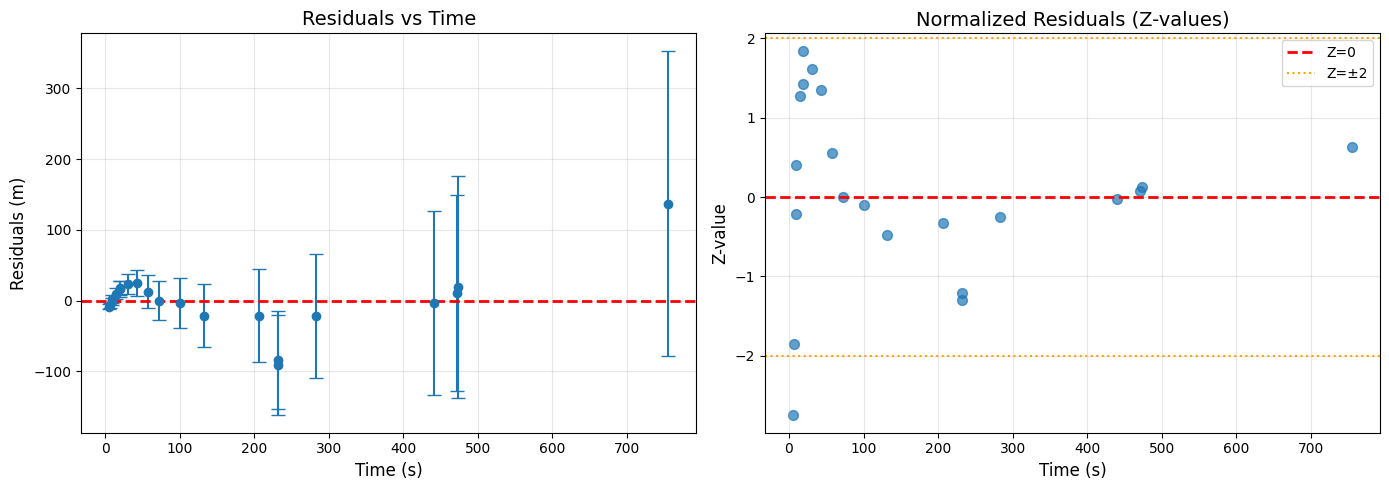

In [463]:
# === Calculate Residuals and Z-values for Power Law Model ===

# Predict distances using the power law model
d_pred = func_run_power(t, v0_fit, alpha_fit)

# Calculate residuals
residuals = dist - d_pred

# Normalize residuals by uncertainty (Z-values)
z_values = residuals / sigma_d

# Print results
print("="*80)
print("  RESIDUALS AND Z-VALUES")
print("="*80)
print(f"\n{'Time (s)':<12} {'Distance (m)':<15} {'Predicted (m)':<15} {'Residual (m)':<15} {'Z-value':<12}")
print("-" * 80)

for i in range(len(t)):
    print(f"{t[i]:<12.1f} {dist[i]:<15.1f} {d_pred[i]:<15.1f} {residuals[i]:<15.2f} {z_values[i]:<12.2f}")

# Summary statistics
print("\n" + "="*80)
print("  SUMMARY STATISTICS")
print("="*80)
print(f"Mean residual: {np.mean(residuals):.4f} m")
print(f"Std residual: {np.std(residuals, ddof=1):.4f} m")
print(f"Mean Z-value: {np.mean(z_values):.4f}")
print(f"Std Z-value: {np.std(z_values, ddof=1):.4f}")
print(f"Max |Z|: {np.max(np.abs(z_values)):.4f} at index {np.argmax(np.abs(z_values))}")
print("="*80)

# Quick visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Residuals
ax1.errorbar(t, residuals, yerr=sigma_d, fmt='o', capsize=5)
ax1.axhline(0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Residuals (m)', fontsize=12)
ax1.set_title('Residuals vs Time', fontsize=14)
ax1.grid(True, alpha=0.3)

# Z-values
ax2.scatter(t, z_values, s=50, alpha=0.7)
ax2.axhline(0, color='red', linestyle='--', linewidth=2, label='Z=0')
ax2.axhline(2, color='orange', linestyle=':', linewidth=1.5, label='Z=±2')
ax2.axhline(-2, color='orange', linestyle=':', linewidth=1.5)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Z-value', fontsize=12)
ax2.set_title('Normalized Residuals (Z-values)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

  RESIDUALS AND Z-VALUES FOR POWER LAW MODEL

Time (s)     Distance (m)    Predicted (m)   Residual (m)    Z-value     
--------------------------------------------------------------------------------
5.4          50.0            58.6            -8.56           -2.74        ← LOWEST Z
6.2          60.0            66.7            -6.74           -1.86       
9.0          91.4            92.5            -1.08           -0.22       
9.6          100.0           97.8            2.21            0.41        
14.3         150.0           140.4           9.63            1.27        
19.2         200.0           182.0           17.96           1.83         ← HIGHEST Z
19.5         201.2           184.7           16.53           1.43        
30.7         300.0           277.1           22.94           1.62        
43.0         400.0           374.9           25.15           1.35        
57.7         500.0           487.3           12.75           0.56        
72.8         600.0           600.0  

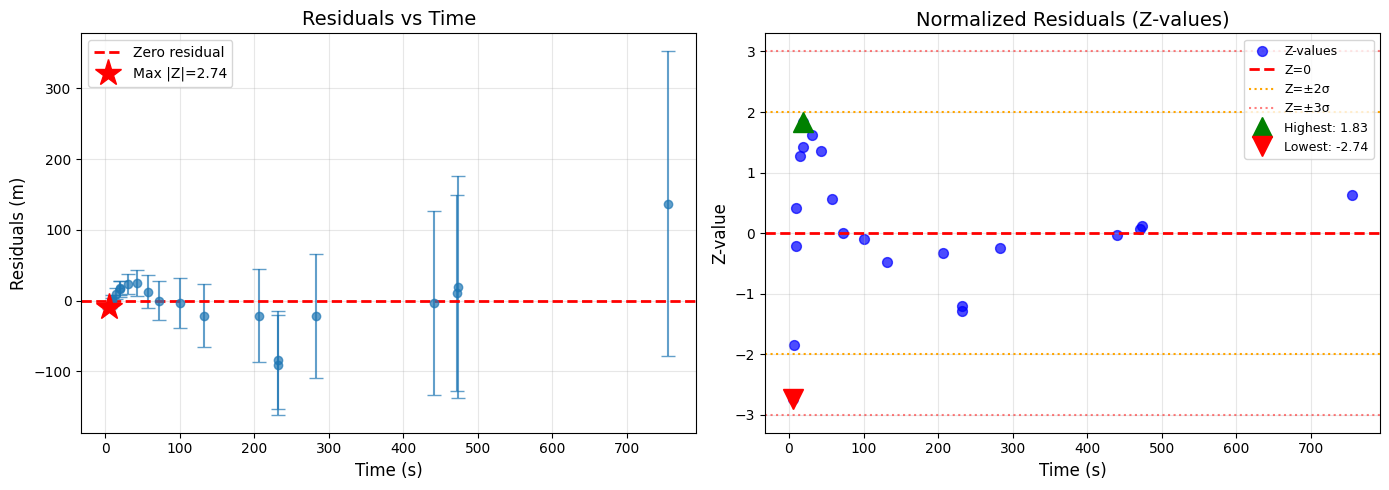

In [464]:
# === Calculate Residuals and Z-values for Power Law Model ===

# Get fitted parameters
v0_fit = m_power.values['v0']
alpha_fit = m_power.values['alpha']

# Predict distances using the power law model
d_pred = func_run_power(t, v0_fit, alpha_fit)

# Calculate residuals
residuals = dist - d_pred

# Normalize residuals by uncertainty (Z-values)
z_values = residuals / sigma_d

# Find highest and lowest Z-values
idx_max_z = np.argmax(z_values)
idx_min_z = np.argmin(z_values)
idx_max_abs_z = np.argmax(np.abs(z_values))

# Print results
print("="*80)
print("  RESIDUALS AND Z-VALUES FOR POWER LAW MODEL")
print("="*80)
print(f"\n{'Time (s)':<12} {'Distance (m)':<15} {'Predicted (m)':<15} {'Residual (m)':<15} {'Z-value':<12}")
print("-" * 80)

for i in range(len(t)):
    marker = ""
    if i == idx_max_z:
        marker = " ← HIGHEST Z"
    elif i == idx_min_z:
        marker = " ← LOWEST Z"
    elif i == idx_max_abs_z:
        marker = " ← MAX |Z|"
    
    print(f"{t[i]:<12.1f} {dist[i]:<15.1f} {d_pred[i]:<15.1f} {residuals[i]:<15.2f} {z_values[i]:<12.2f}{marker}")

# Summary statistics
print("\n" + "="*80)
print("  SUMMARY STATISTICS")
print("="*80)
print(f"Mean residual: {np.mean(residuals):.4f} m")
print(f"Std residual: {np.std(residuals, ddof=1):.4f} m")
print(f"Mean Z-value: {np.mean(z_values):.4f}")
print(f"Std Z-value: {np.std(z_values, ddof=1):.4f}")
print(f"\n--- Extreme Z-values ---")
print(f"Highest Z: {z_values[idx_max_z]:.4f} at t={t[idx_max_z]:.1f}s, d={dist[idx_max_z]:.1f}m")
print(f"Lowest Z:  {z_values[idx_min_z]:.4f} at t={t[idx_min_z]:.1f}s, d={dist[idx_min_z]:.1f}m")
print(f"Max |Z|:   {np.abs(z_values[idx_max_abs_z]):.4f} at t={t[idx_max_abs_z]:.1f}s, d={dist[idx_max_abs_z]:.1f}m")
print("="*80)

# Interpretation
print("\n" + "="*80)
print("  INTERPRETATION")
print("="*80)
if np.max(np.abs(z_values)) > 3:
    print(f"⚠️  MAX |Z| = {np.max(np.abs(z_values)):.2f} > 3σ")
    print("   → Significant outlier detected!")
    print(f"   → Data point at t={t[idx_max_abs_z]:.1f}s deviates strongly from model")
elif np.max(np.abs(z_values)) > 2:
    print(f"⚡ MAX |Z| = {np.max(np.abs(z_values)):.2f} > 2σ")
    print("   → Moderate outlier detected")
    print(f"   → Data point at t={t[idx_max_abs_z]:.1f}s shows notable deviation")
else:
    print(f"✓  MAX |Z| = {np.max(np.abs(z_values)):.2f} < 2σ")
    print("   → All residuals within 2σ - good model fit!")

print(f"\n   Z-values range from {z_values[idx_min_z]:.2f} to {z_values[idx_max_z]:.2f}")
if np.abs(np.mean(z_values)) < 0.5 and np.abs(np.std(z_values, ddof=1) - 1) < 0.3:
    print("   → Mean ≈ 0 and Std ≈ 1: residuals are consistent with uncertainties ✓")
else:
    print("   → Mean or Std deviate from expected (0, 1)")
    print("   → May indicate systematic bias or underestimated uncertainties")
print("="*80)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Residuals
ax1.errorbar(t, residuals, yerr=sigma_d, fmt='o', capsize=5, alpha=0.7)
ax1.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero residual')
# Highlight extremes
ax1.plot(t[idx_max_abs_z], residuals[idx_max_abs_z], 'r*', markersize=20, 
         label=f'Max |Z|={np.abs(z_values[idx_max_abs_z]):.2f}', zorder=10)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Residuals (m)', fontsize=12)
ax1.set_title('Residuals vs Time', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Z-values
ax2.scatter(t, z_values, s=50, alpha=0.7, c='blue', label='Z-values')
ax2.axhline(0, color='red', linestyle='--', linewidth=2, label='Z=0')
ax2.axhline(2, color='orange', linestyle=':', linewidth=1.5, label='Z=±2σ')
ax2.axhline(-2, color='orange', linestyle=':', linewidth=1.5)
ax2.axhline(3, color='red', linestyle=':', linewidth=1.5, alpha=0.5, label='Z=±3σ')
ax2.axhline(-3, color='red', linestyle=':', linewidth=1.5, alpha=0.5)
# Highlight extremes
ax2.plot(t[idx_max_z], z_values[idx_max_z], 'g^', markersize=15, 
         label=f'Highest: {z_values[idx_max_z]:.2f}', zorder=10)
ax2.plot(t[idx_min_z], z_values[idx_min_z], 'rv', markersize=15, 
         label=f'Lowest: {z_values[idx_min_z]:.2f}', zorder=10)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Z-value', fontsize=12)
ax2.set_title('Normalized Residuals (Z-values)', fontsize=14)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

So if power law is the correct model, the 50m is slowest compared to model prediction and thus easiest to beat

Splitting fit at distance 50.0m (time 5.4s)


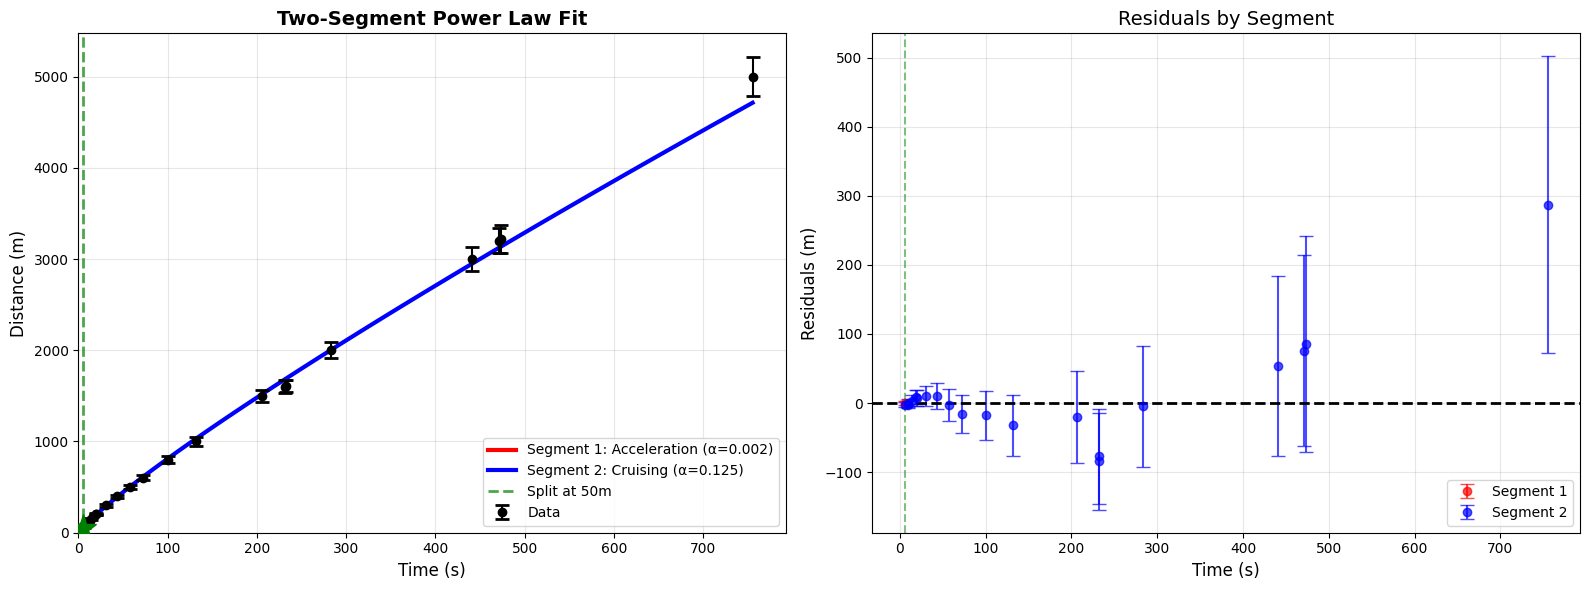


TWO-SEGMENT POWER LAW FIT (split at 50.0m, t=5.4s)

Segment 1: Acceleration phase [0, 5.4s]
  v₀ = 9.2728 ± 9.0078 m/s
  α  = 0.0021 ± 0.4951
  χ² = 0.00, ndof = -1, χ²/ndof = -0.000
  p-value = nan

Segment 2: Cruising/fatigue phase [5.4s, end]
  v₀ = 12.4263 ± 0.4654 m/s
  α  = 0.1247 ± 0.0095
  χ² = 9.28, ndof = 18, χ²/ndof = 0.516
  p-value = 9.5282e-01

Combined:
  χ²_total = 9.28, ndof_total = 17
  χ²/ndof = 0.546
  p-value = 9.3096e-01

COMPARISON WITH SINGLE-SEGMENT FIT
Single-segment:  χ²/ndof = 1.415
Two-segment:     χ²/ndof = 0.546
Improvement:     Δχ² = 17.59


In [465]:
# === TWO-SEGMENT POWER LAW FIT ===
# Split at ~50m to capture acceleration vs. cruising phase

# Find time corresponding to ~50m distance
t_split_dist = 50.0  # Distance (m) to split at
# Find closest time value
idx_split = np.argmin(np.abs(dist - t_split_dist))
t_split = t[idx_split]

print(f"Splitting fit at distance {dist[idx_split]:.1f}m (time {t_split:.1f}s)")

# === SEGMENT 1: Early acceleration (0 to split) ===
mask1 = (t <= t_split)
t1 = t[mask1]
dist1 = dist[mask1]
sigma_d1 = sigma_d[mask1]

cfit1 = cost.LeastSquares(t1, dist1, sigma_d1, func_run_power)
m1 = Minuit(cfit1, v0=8.0, alpha=0.2)
m1.limits['v0'] = (0, None)
m1.limits['alpha'] = (0, 0.99)
m1.migrad()

chi2_1 = m1.fval
ndof_1 = len(t1) - m1.nfit
chi2_ndof_1 = chi2_1 / ndof_1
prob_1 = stats.chi2.sf(chi2_1, ndof_1)

# === SEGMENT 2: Cruising/fatigue phase (split to end) ===
mask2 = (t > t_split)
t2 = t[mask2]
dist2 = dist[mask2]
sigma_d2 = sigma_d[mask2]

# Adjust distances for continuity (subtract offset from segment 1 endpoint)
d_offset = func_run_power(t_split, *m1.values[:])
dist2_adj = dist2 - d_offset
t2_adj = t2 - t_split

cfit2 = cost.LeastSquares(t2_adj, dist2_adj, sigma_d2, func_run_power)
m2 = Minuit(cfit2, v0=7.0, alpha=0.05)
m2.limits['v0'] = (0, None)
m2.limits['alpha'] = (0, 0.99)
m2.migrad()

chi2_2 = m2.fval
ndof_2 = len(t2) - m2.nfit
chi2_ndof_2 = chi2_2 / ndof_2
prob_2 = stats.chi2.sf(chi2_2, ndof_2)

# === COMBINED STATISTICS ===
chi2_total = chi2_1 + chi2_2
ndof_total = ndof_1 + ndof_2
chi2_ndof_total = chi2_total / ndof_total
prob_total = stats.chi2.sf(chi2_total, ndof_total)

# === PLOTTING ===
fig, (ax_full, ax_residuals) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Full fit
ax_full.errorbar(t, dist, yerr=sigma_d, fmt='o', color='black', 
                 markersize=6, capsize=5, capthick=2, label='Data', zorder=10)

# Plot segment 1 fit
t1_smooth = np.linspace(t1.min(), t1.max(), 100)
d1_fit = func_run_power(t1_smooth, *m1.values[:])
ax_full.plot(t1_smooth, d1_fit, 'r-', linewidth=3, 
             label=f'Segment 1: Acceleration (α={m1.values["alpha"]:.3f})')

# Plot segment 2 fit (add back offset)
t2_smooth = np.linspace(0, t2_adj.max(), 100)
d2_fit = func_run_power(t2_smooth, *m2.values[:]) + d_offset
ax_full.plot(t2_smooth + t_split, d2_fit, 'b-', linewidth=3, 
             label=f'Segment 2: Cruising (α={m2.values["alpha"]:.3f})')

# Mark split point
ax_full.axvline(t_split, color='green', linestyle='--', linewidth=2, 
                label=f'Split at {dist[idx_split]:.0f}m', alpha=0.7)
ax_full.plot(t_split, dist[idx_split], 'g*', markersize=20, zorder=15)

ax_full.set_xlabel('Time (s)', fontsize=12)
ax_full.set_ylabel('Distance (m)', fontsize=12)
ax_full.set_title('Two-Segment Power Law Fit', fontsize=14, fontweight='bold')
ax_full.legend(loc='lower right', fontsize=10)
ax_full.grid(True, alpha=0.3)
ax_full.set_xlim(0, None)
ax_full.set_ylim(0, None)

# Right plot: Residuals for both segments
residuals1 = dist1 - func_run_power(t1, *m1.values[:])
residuals2 = dist2 - (func_run_power(t2_adj, *m2.values[:]) + d_offset)

ax_residuals.errorbar(t1, residuals1, yerr=sigma_d1, fmt='ro', 
                      capsize=5, alpha=0.7, label='Segment 1')
ax_residuals.errorbar(t2, residuals2, yerr=sigma_d2, fmt='bo', 
                      capsize=5, alpha=0.7, label='Segment 2')
ax_residuals.axhline(0, color='black', linestyle='--', linewidth=2)
ax_residuals.axvline(t_split, color='green', linestyle='--', linewidth=1.5, alpha=0.5)
ax_residuals.set_xlabel('Time (s)', fontsize=12)
ax_residuals.set_ylabel('Residuals (m)', fontsize=12)
ax_residuals.set_title('Residuals by Segment', fontsize=14)
ax_residuals.legend()
ax_residuals.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === PRINT RESULTS ===
print(f"\n{'='*70}")
print(f"TWO-SEGMENT POWER LAW FIT (split at {dist[idx_split]:.1f}m, t={t_split:.1f}s)")
print(f"{'='*70}")
print(f"\nSegment 1: Acceleration phase [0, {t_split:.1f}s]")
print(f"  v₀ = {m1.values['v0']:.4f} ± {m1.errors['v0']:.4f} m/s")
print(f"  α  = {m1.values['alpha']:.4f} ± {m1.errors['alpha']:.4f}")
print(f"  χ² = {chi2_1:.2f}, ndof = {ndof_1}, χ²/ndof = {chi2_ndof_1:.3f}")
print(f"  p-value = {prob_1:.4e}")

print(f"\nSegment 2: Cruising/fatigue phase [{t_split:.1f}s, end]")
print(f"  v₀ = {m2.values['v0']:.4f} ± {m2.errors['v0']:.4f} m/s")
print(f"  α  = {m2.values['alpha']:.4f} ± {m2.errors['alpha']:.4f}")
print(f"  χ² = {chi2_2:.2f}, ndof = {ndof_2}, χ²/ndof = {chi2_ndof_2:.3f}")
print(f"  p-value = {prob_2:.4e}")

print(f"\nCombined:")
print(f"  χ²_total = {chi2_total:.2f}, ndof_total = {ndof_total}")
print(f"  χ²/ndof = {chi2_ndof_total:.3f}")
print(f"  p-value = {prob_total:.4e}")
print(f"{'='*70}")

# Comparison with single-segment fit
print(f"\n{'='*70}")
print(f"COMPARISON WITH SINGLE-SEGMENT FIT")
print(f"{'='*70}")
print(f"Single-segment:  χ²/ndof = {m_power.fval/(len(t)-m_power.nfit):.3f}")
print(f"Two-segment:     χ²/ndof = {chi2_ndof_total:.3f}")
print(f"Improvement:     Δχ² = {m_power.fval - chi2_total:.2f}")
print(f"{'='*70}")

Splitting fit at distance 50.0m (time 5.4s)


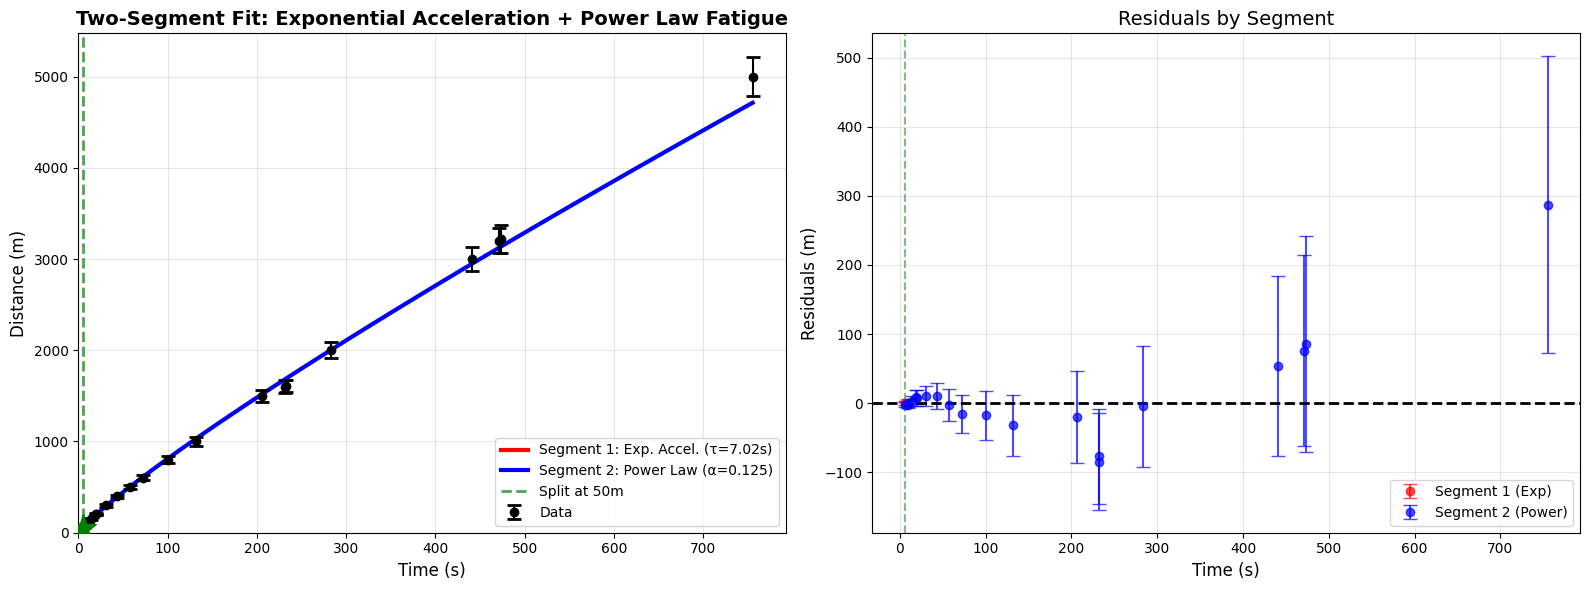


TWO-SEGMENT FIT (split at 50.0m, t=5.4s)

Segment 1: Exponential acceleration [0, 5.4s]
  Model: d = v₀·τ·(1 - exp(-t/τ))
  v₀  = 13.2753 ± 12.9690 m/s
  τ   = 7.0160 ± 12.9232 s
  χ² = 0.00, ndof = -1, χ²/ndof = -0.000
  p-value = nan

Segment 2: Power law fatigue [5.4s, end]
  Model: d = v₀·t^(1-α)/(1-α)
  v₀ = 12.4260 ± 0.4653 m/s
  α  = 0.1247 ± 0.0095
  χ² = 9.28, ndof = 18, χ²/ndof = 0.516
  p-value = 9.5282e-01

Combined:
  χ²_total = 9.28, ndof_total = 17
  χ²/ndof = 0.546
  p-value = 9.3095e-01

COMPARISON WITH SINGLE-SEGMENT FITS
Single Power Law:    χ²/ndof = 1.415
Single Exponential:  χ²/ndof = 4.159
Two-segment:         χ²/ndof = 0.546
Improvement:         Δχ² = 17.59


In [466]:
# === TWO-SEGMENT FIT: Exponential Acceleration + Power Law Fatigue ===

# Find time corresponding to ~50m distance
t_split_dist = 50.0
idx_split = np.argmin(np.abs(dist - t_split_dist))
t_split = t[idx_split]

print(f"Splitting fit at distance {dist[idx_split]:.1f}m (time {t_split:.1f}s)")

# === SEGMENT 1: Exponential acceleration (0 to split) ===
mask1 = (t <= t_split)
t1 = t[mask1]
dist1 = dist[mask1]
sigma_d1 = sigma_d[mask1]

# Exponential model: d = v0 * tau * (1 - exp(-t/tau))
def func_run_exp_accel(t, v0, tau):
    return v0 * tau * (1 - np.exp(-t / tau))

cfit1 = cost.LeastSquares(t1, dist1, sigma_d1, func_run_exp_accel)
m1 = Minuit(cfit1, v0=8.0, tau=5.0)
m1.limits['v0'] = (0, None)
m1.limits['tau'] = (0.1, None)
m1.migrad()

chi2_1 = m1.fval
ndof_1 = len(t1) - m1.nfit
chi2_ndof_1 = chi2_1 / ndof_1
prob_1 = stats.chi2.sf(chi2_1, ndof_1)

# === SEGMENT 2: Power law fatigue (split to end) ===
mask2 = (t > t_split)
t2 = t[mask2]
dist2 = dist[mask2]
sigma_d2 = sigma_d[mask2]

# Adjust for continuity
d_offset = func_run_exp_accel(t_split, *m1.values[:])
dist2_adj = dist2 - d_offset
t2_adj = t2 - t_split

cfit2 = cost.LeastSquares(t2_adj, dist2_adj, sigma_d2, func_run_power)
m2 = Minuit(cfit2, v0=7.0, alpha=0.1)
m2.limits['v0'] = (0, None)
m2.limits['alpha'] = (0, 0.99)
m2.migrad()

chi2_2 = m2.fval
ndof_2 = len(t2) - m2.nfit
chi2_ndof_2 = chi2_2 / ndof_2
prob_2 = stats.chi2.sf(chi2_2, ndof_2)

# === COMBINED STATISTICS ===
chi2_total = chi2_1 + chi2_2
ndof_total = ndof_1 + ndof_2
chi2_ndof_total = chi2_total / ndof_total
prob_total = stats.chi2.sf(chi2_total, ndof_total)

# === PLOTTING ===
fig, (ax_full, ax_residuals) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Full fit
ax_full.errorbar(t, dist, yerr=sigma_d, fmt='o', color='black', 
                 markersize=6, capsize=5, capthick=2, label='Data', zorder=10)

# Plot segment 1 fit (exponential)
t1_smooth = np.linspace(t1.min(), t1.max(), 100)
d1_fit = func_run_exp_accel(t1_smooth, *m1.values[:])
ax_full.plot(t1_smooth, d1_fit, 'r-', linewidth=3, 
             label=f'Segment 1: Exp. Accel. (τ={m1.values["tau"]:.2f}s)')

# Plot segment 2 fit (power law, add back offset)
t2_smooth = np.linspace(0, t2_adj.max(), 100)
d2_fit = func_run_power(t2_smooth, *m2.values[:]) + d_offset
ax_full.plot(t2_smooth + t_split, d2_fit, 'b-', linewidth=3, 
             label=f'Segment 2: Power Law (α={m2.values["alpha"]:.3f})')

# Mark split point
ax_full.axvline(t_split, color='green', linestyle='--', linewidth=2, 
                label=f'Split at {dist[idx_split]:.0f}m', alpha=0.7)
ax_full.plot(t_split, dist[idx_split], 'g*', markersize=20, zorder=15)

ax_full.set_xlabel('Time (s)', fontsize=12)
ax_full.set_ylabel('Distance (m)', fontsize=12)
ax_full.set_title('Two-Segment Fit: Exponential Acceleration + Power Law Fatigue', 
                  fontsize=14, fontweight='bold')
ax_full.legend(loc='lower right', fontsize=10)
ax_full.grid(True, alpha=0.3)
ax_full.set_xlim(0, None)
ax_full.set_ylim(0, None)

# Right plot: Residuals for both segments
residuals1 = dist1 - func_run_exp_accel(t1, *m1.values[:])
residuals2 = dist2 - (func_run_power(t2_adj, *m2.values[:]) + d_offset)

ax_residuals.errorbar(t1, residuals1, yerr=sigma_d1, fmt='ro', 
                      capsize=5, alpha=0.7, label='Segment 1 (Exp)')
ax_residuals.errorbar(t2, residuals2, yerr=sigma_d2, fmt='bo', 
                      capsize=5, alpha=0.7, label='Segment 2 (Power)')
ax_residuals.axhline(0, color='black', linestyle='--', linewidth=2)
ax_residuals.axvline(t_split, color='green', linestyle='--', linewidth=1.5, alpha=0.5)
ax_residuals.set_xlabel('Time (s)', fontsize=12)
ax_residuals.set_ylabel('Residuals (m)', fontsize=12)
ax_residuals.set_title('Residuals by Segment', fontsize=14)
ax_residuals.legend()
ax_residuals.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === PRINT RESULTS ===
print(f"\n{'='*70}")
print(f"TWO-SEGMENT FIT (split at {dist[idx_split]:.1f}m, t={t_split:.1f}s)")
print(f"{'='*70}")
print(f"\nSegment 1: Exponential acceleration [0, {t_split:.1f}s]")
print(f"  Model: d = v₀·τ·(1 - exp(-t/τ))")
print(f"  v₀  = {m1.values['v0']:.4f} ± {m1.errors['v0']:.4f} m/s")
print(f"  τ   = {m1.values['tau']:.4f} ± {m1.errors['tau']:.4f} s")
print(f"  χ² = {chi2_1:.2f}, ndof = {ndof_1}, χ²/ndof = {chi2_ndof_1:.3f}")
print(f"  p-value = {prob_1:.4e}")

print(f"\nSegment 2: Power law fatigue [{t_split:.1f}s, end]")
print(f"  Model: d = v₀·t^(1-α)/(1-α)")
print(f"  v₀ = {m2.values['v0']:.4f} ± {m2.errors['v0']:.4f} m/s")
print(f"  α  = {m2.values['alpha']:.4f} ± {m2.errors['alpha']:.4f}")
print(f"  χ² = {chi2_2:.2f}, ndof = {ndof_2}, χ²/ndof = {chi2_ndof_2:.3f}")
print(f"  p-value = {prob_2:.4e}")

print(f"\nCombined:")
print(f"  χ²_total = {chi2_total:.2f}, ndof_total = {ndof_total}")
print(f"  χ²/ndof = {chi2_ndof_total:.3f}")
print(f"  p-value = {prob_total:.4e}")
print(f"{'='*70}")

# Comparison
print(f"\n{'='*70}")
print(f"COMPARISON WITH SINGLE-SEGMENT FITS")
print(f"{'='*70}")
print(f"Single Power Law:    χ²/ndof = {m_power.fval/(len(t)-m_power.nfit):.3f}")
print(f"Single Exponential:  χ²/ndof = {m_exp.fval/(len(t)-m_exp.nfit):.3f}")
print(f"Two-segment:         χ²/ndof = {chi2_ndof_total:.3f}")
print(f"Improvement:         Δχ² = {min(m_power.fval, m_exp.fval) - chi2_total:.2f}")
print(f"{'='*70}")

  RESIDUALS AND Z-VALUES FOR TWO-SEGMENT FIT (EXP + POWER)

Time (s)     Distance (m)    Predicted (m)   Residual (m)    Z-value      Segment   
------------------------------------------------------------------------------------------
5.4          50.0            50.0            -0.00           -0.00        Exp       
6.2          60.0            62.3            -2.31           -0.64        Power     
9.0          91.4            93.6            -2.16           -0.43        Power     
9.6          100.0           99.6            0.35            0.07         Power     
14.3         150.0           146.7           3.33            0.44         Power     
19.2         200.0           191.1           8.87            0.91         Power     
19.5         201.2           193.9           7.30            0.63         Power     
30.7         300.0           290.0           10.03           0.71         Power     
43.0         400.0           389.8           10.20           0.55         Power     

c:\Users\villa\Desktop\AppStat25\.venv\Lib\site-packages\numpy\_core\_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\villa\Desktop\AppStat25\.venv\Lib\site-packages\numpy\_core\_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


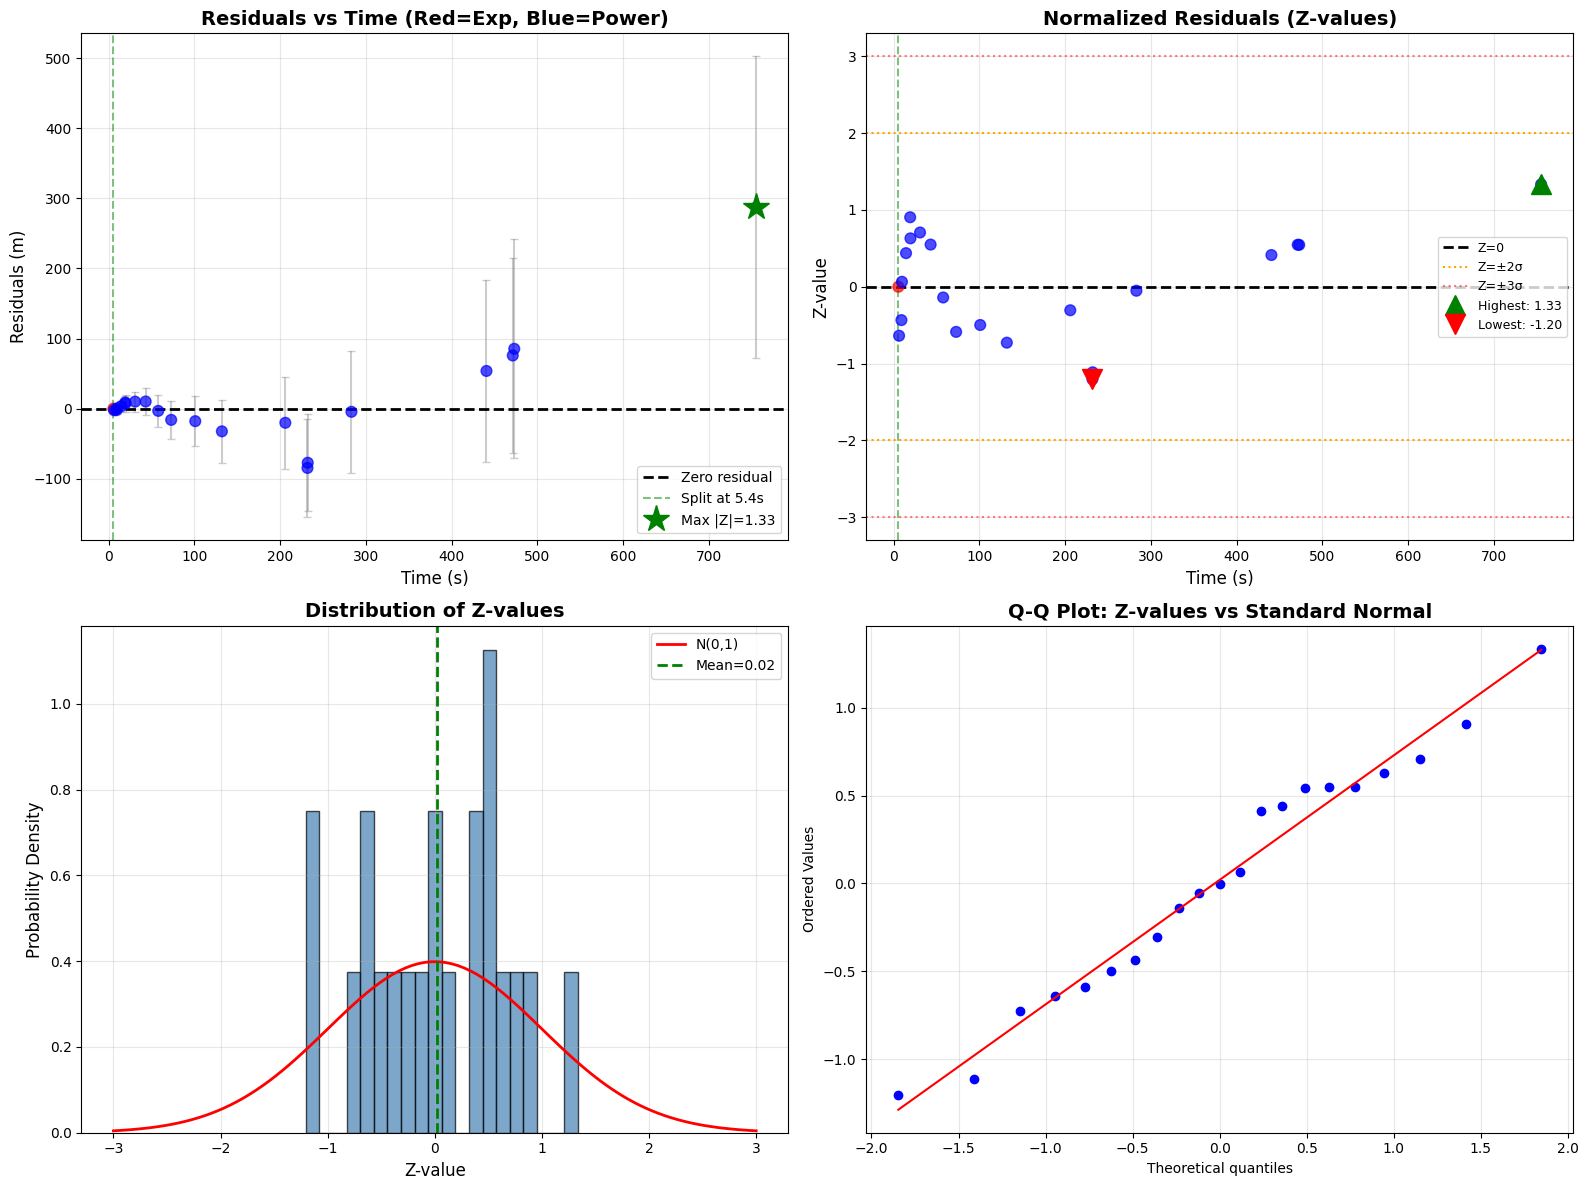


  COMPARISON: TWO-SEGMENT vs SINGLE POWER LAW
Single Power Law:
  Max |Z| = 2.7394
  Mean Z = 0.0390, Std Z = 1.1586
  χ²/ndof = 1.415

Two-Segment (Exp + Power):
  Max |Z| = 1.3339
  Mean Z = 0.0208, Std Z = 0.6810
  χ²/ndof = 0.546

Improvement:
  Reduction in max |Z|: 1.4055
  Reduction in χ²: 17.59


In [467]:
# === Z-VALUE ANALYSIS FOR TWO-SEGMENT FIT ===

# Predict distances for each segment
d_pred_seg1 = func_run_exp_accel(t1, *m1.values[:])
d_pred_seg2 = func_run_power(t2_adj, *m2.values[:]) + d_offset

# Calculate residuals
residuals_seg1 = dist1 - d_pred_seg1
residuals_seg2 = dist2 - d_pred_seg2

# Combine residuals and predictions
residuals_combined = np.concatenate([residuals_seg1, residuals_seg2])
sigma_d_combined = np.concatenate([sigma_d1, sigma_d2])
t_combined = np.concatenate([t1, t2])
dist_combined = np.concatenate([dist1, dist2])
d_pred_combined = np.concatenate([d_pred_seg1, d_pred_seg2])

# Calculate Z-values
z_values = residuals_combined / sigma_d_combined

# Find extremes
idx_max_z = np.argmax(z_values)
idx_min_z = np.argmin(z_values)
idx_max_abs_z = np.argmax(np.abs(z_values))

# === PRINT RESULTS ===
print("="*90)
print("  RESIDUALS AND Z-VALUES FOR TWO-SEGMENT FIT (EXP + POWER)")
print("="*90)
print(f"\n{'Time (s)':<12} {'Distance (m)':<15} {'Predicted (m)':<15} {'Residual (m)':<15} {'Z-value':<12} {'Segment':<10}")
print("-" * 90)

for i in range(len(t_combined)):
    segment = "Exp" if t_combined[i] <= t_split else "Power"
    marker = ""
    if i == idx_max_z:
        marker = " ← HIGHEST Z"
    elif i == idx_min_z:
        marker = " ← LOWEST Z"
    elif i == idx_max_abs_z:
        marker = " ← MAX |Z|"
    
    print(f"{t_combined[i]:<12.1f} {dist_combined[i]:<15.1f} {d_pred_combined[i]:<15.1f} "
          f"{residuals_combined[i]:<15.2f} {z_values[i]:<12.2f} {segment:<10}{marker}")

# === SUMMARY STATISTICS ===
print("\n" + "="*90)
print("  SUMMARY STATISTICS")
print("="*90)
print(f"Mean residual: {np.mean(residuals_combined):.4f} m")
print(f"Std residual: {np.std(residuals_combined, ddof=1):.4f} m")
print(f"Mean Z-value: {np.mean(z_values):.4f}")
print(f"Std Z-value: {np.std(z_values, ddof=1):.4f}")
print(f"\n--- Extreme Z-values ---")
print(f"Highest Z: {z_values[idx_max_z]:.4f} at t={t_combined[idx_max_z]:.1f}s, d={dist_combined[idx_max_z]:.1f}m")
print(f"Lowest Z:  {z_values[idx_min_z]:.4f} at t={t_combined[idx_min_z]:.1f}s, d={dist_combined[idx_min_z]:.1f}m")
print(f"Max |Z|:   {np.abs(z_values[idx_max_abs_z]):.4f} at t={t_combined[idx_max_abs_z]:.1f}s, d={dist_combined[idx_max_abs_z]:.1f}m")

# === SEGMENT-SPECIFIC STATISTICS ===
print("\n--- By Segment ---")
z_seg1 = residuals_seg1 / sigma_d1
z_seg2 = residuals_seg2 / sigma_d2

print(f"\nSegment 1 (Exponential, 0-{t_split:.1f}s):")
print(f"  Mean Z: {np.mean(z_seg1):.4f}, Std Z: {np.std(z_seg1, ddof=1):.4f}")
print(f"  Max |Z|: {np.max(np.abs(z_seg1)):.4f}")

print(f"\nSegment 2 (Power Law, {t_split:.1f}s-end):")
print(f"  Mean Z: {np.mean(z_seg2):.4f}, Std Z: {np.std(z_seg2, ddof=1):.4f}")
print(f"  Max |Z|: {np.max(np.abs(z_seg2)):.4f}")
print("="*90)

# === INTERPRETATION ===
print("\n" + "="*90)
print("  INTERPRETATION")
print("="*90)
if np.max(np.abs(z_values)) > 3:
    print(f"⚠️  MAX |Z| = {np.max(np.abs(z_values)):.2f} > 3σ")
    print("   → Significant outlier detected!")
    print(f"   → Data point at t={t_combined[idx_max_abs_z]:.1f}s deviates strongly from model")
elif np.max(np.abs(z_values)) > 2:
    print(f"⚡ MAX |Z| = {np.max(np.abs(z_values)):.2f} > 2σ")
    print("   → Moderate outlier detected")
    print(f"   → Data point at t={t_combined[idx_max_abs_z]:.1f}s shows notable deviation")
else:
    print(f"✓  MAX |Z| = {np.max(np.abs(z_values)):.2f} < 2σ")
    print("   → All residuals within 2σ - excellent model fit!")

print(f"\n   Z-values range from {z_values[idx_min_z]:.2f} to {z_values[idx_max_z]:.2f}")
if np.abs(np.mean(z_values)) < 0.5 and np.abs(np.std(z_values, ddof=1) - 1) < 0.3:
    print("   → Mean ≈ 0 and Std ≈ 1: residuals consistent with uncertainties ✓")
else:
    print("   → Mean or Std deviate from expected (0, 1)")
    print("   → May indicate systematic bias or underestimated uncertainties")
print("="*90)

# === VISUALIZATION ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuals vs Time (colored by segment)
colors_seg = ['red' if t_val <= t_split else 'blue' for t_val in t_combined]
ax1.scatter(t_combined, residuals_combined, c=colors_seg, s=60, alpha=0.7, zorder=5)
ax1.errorbar(t_combined, residuals_combined, yerr=sigma_d_combined, 
             fmt='none', ecolor='gray', alpha=0.4, capsize=3)
ax1.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero residual')
ax1.axvline(t_split, color='green', linestyle='--', linewidth=1.5, alpha=0.5, label=f'Split at {t_split:.1f}s')
# Highlight max |Z|
ax1.plot(t_combined[idx_max_abs_z], residuals_combined[idx_max_abs_z], 'g*', 
         markersize=20, label=f'Max |Z|={np.abs(z_values[idx_max_abs_z]):.2f}', zorder=10)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Residuals (m)', fontsize=12)
ax1.set_title('Residuals vs Time (Red=Exp, Blue=Power)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Z-values vs Time
ax2.scatter(t_combined, z_values, c=colors_seg, s=60, alpha=0.7, zorder=5)
ax2.axhline(0, color='black', linestyle='--', linewidth=2, label='Z=0')
ax2.axhline(2, color='orange', linestyle=':', linewidth=1.5, label='Z=±2σ')
ax2.axhline(-2, color='orange', linestyle=':', linewidth=1.5)
ax2.axhline(3, color='red', linestyle=':', linewidth=1.5, alpha=0.5, label='Z=±3σ')
ax2.axhline(-3, color='red', linestyle=':', linewidth=1.5, alpha=0.5)
ax2.axvline(t_split, color='green', linestyle='--', linewidth=1.5, alpha=0.5)
# Highlight extremes
ax2.plot(t_combined[idx_max_z], z_values[idx_max_z], 'g^', markersize=15, 
         label=f'Highest: {z_values[idx_max_z]:.2f}', zorder=10)
ax2.plot(t_combined[idx_min_z], z_values[idx_min_z], 'rv', markersize=15, 
         label=f'Lowest: {z_values[idx_min_z]:.2f}', zorder=10)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Z-value', fontsize=12)
ax2.set_title('Normalized Residuals (Z-values)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Histogram of Z-values
ax3.hist(z_values, bins=20, density=True, alpha=0.7, color='steelblue', edgecolor='black')
# Overlay standard normal for reference
z_range = np.linspace(-3, 3, 100)
ax3.plot(z_range, stats.norm.pdf(z_range), 'r-', linewidth=2, label='N(0,1)')
ax3.axvline(np.mean(z_values), color='green', linestyle='--', linewidth=2, 
            label=f'Mean={np.mean(z_values):.2f}')
ax3.set_xlabel('Z-value', fontsize=12)
ax3.set_ylabel('Probability Density', fontsize=12)
ax3.set_title('Distribution of Z-values', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Q-Q plot of Z-values
stats.probplot(z_values, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot: Z-values vs Standard Normal', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === COMPARISON WITH SINGLE-SEGMENT FIT ===
print("\n" + "="*90)
print("  COMPARISON: TWO-SEGMENT vs SINGLE POWER LAW")
print("="*90)

# Recalculate Z for single power law
d_pred_single = func_run_power(t, *m_power.values[:])
residuals_single = dist - d_pred_single
z_single = residuals_single / sigma_d

print(f"Single Power Law:")
print(f"  Max |Z| = {np.max(np.abs(z_single)):.4f}")
print(f"  Mean Z = {np.mean(z_single):.4f}, Std Z = {np.std(z_single, ddof=1):.4f}")
print(f"  χ²/ndof = {m_power.fval/(len(t)-m_power.nfit):.3f}")

print(f"\nTwo-Segment (Exp + Power):")
print(f"  Max |Z| = {np.max(np.abs(z_values)):.4f}")
print(f"  Mean Z = {np.mean(z_values):.4f}, Std Z = {np.std(z_values, ddof=1):.4f}")
print(f"  χ²/ndof = {chi2_ndof_total:.3f}")

print(f"\nImprovement:")
print(f"  Reduction in max |Z|: {np.max(np.abs(z_single)) - np.max(np.abs(z_values)):.4f}")
print(f"  Reduction in χ²: {m_power.fval - chi2_total:.2f}")
print("="*90)

### 5.3


In [468]:
dataframe = pd.read_csv('data_RadioSignals.csv', header=0)
freq, a, b = dataframe.values.T
dataframe

# Frequency       D        E
0          12.0157  2.3299   2.6552
1          12.4582  1.5141  -0.3078
2          12.7235  3.6396   6.2029
3          12.1906  3.1901   5.7257
4          12.6308  0.7336  -0.8379
...            ...     ...      ...
99863      12.9142  0.2869  -0.8150
99864      12.0836  4.1374   5.0533
99865      12.1637  3.2400   3.5413
99866      12.1545  3.5414   7.2484
99867      12.5774  1.5644   1.9247

[99868 rows x 3 columns]

316


Text(0.5, 1.0, 'Histogram of Radio Signal Frequencies')

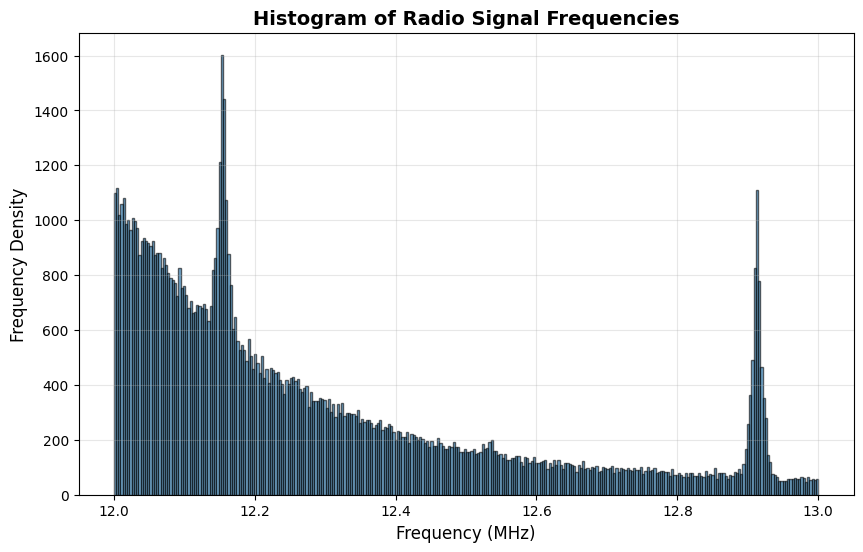

In [469]:
n_bins = int(np.round(np.sqrt(len(freq))))
print(n_bins)
bin_edges = np.linspace(freq.min(), freq.max(), n_bins + 1)

plt.figure(figsize=(10, 6))
plt.grid(alpha=0.3)
plt.hist(freq, bins=bin_edges, density=False, alpha=0.6,edgecolor = 'black')
plt.xlabel('Frequency (MHz)', fontsize=12)
plt.ylabel('Frequency Density', fontsize=12)
plt.title('Histogram of Radio Signal Frequencies', fontsize=14, fontweight='bold')


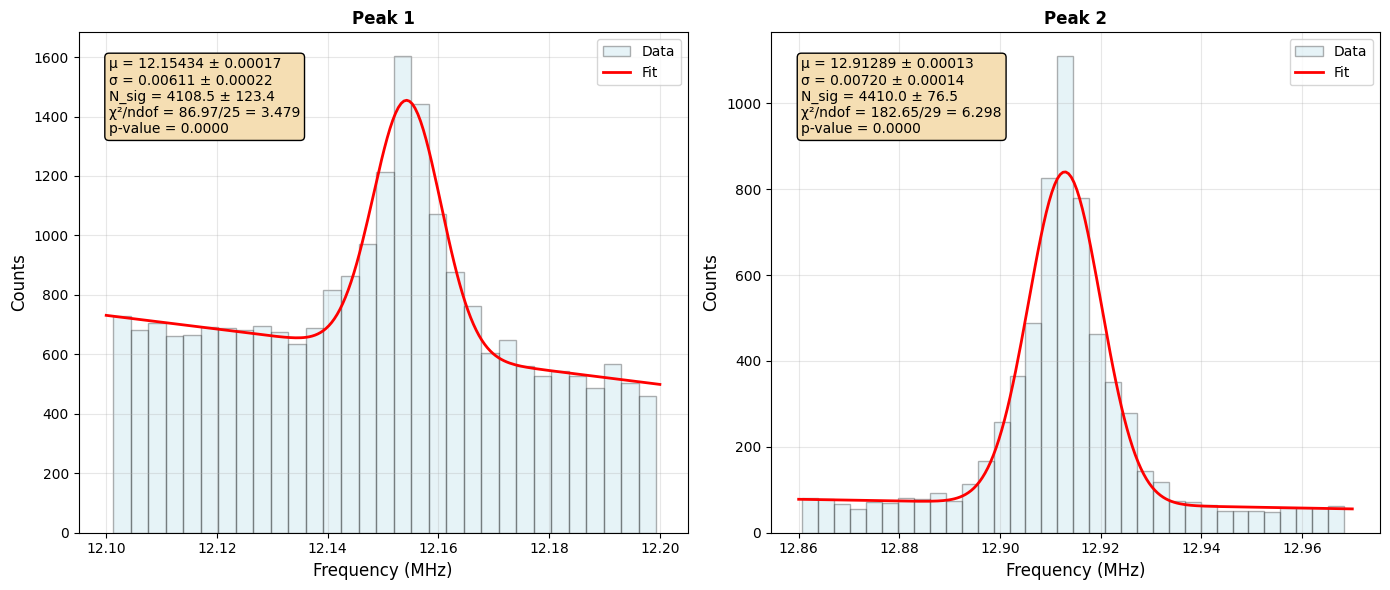

In [470]:
def gauss_poly_background(x, A_sig, mu, sigma, c0, c1, c2, bin_width):
    """
    Model for histogram COUNTS with explicit bin_width parameter
    """
    # Gaussian scaled to counts (area = A_sig)
    gaussian = (A_sig / (sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    gaussian *= bin_width  # Convert to counts per bin
    
    # Background (counts per bin)
    background = c0 + c1*x + c2*x**2
    
    return gaussian + background

# Create fine binning for fitting
n_bins2 = 316
counts, bin_edges = np.histogram(freq, bins=n_bins2)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]

# Poisson uncertainties
counts_err = np.sqrt(counts)
counts_err[counts_err == 0] = 1

peaks = [{'name':'Peak 1', 'mu':12.17,'sigma':0.01,'window':(12.1,12.20),'A':1600},
         {'name':'Peak 2', 'mu':12.92,'sigma':0.01,'window':(12.86,12.97),'A':1000}]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, p in enumerate(peaks):
    ax = axes[i]
    
    # Select data in window
    mask = (bin_centers >= p['window'][0]) & (bin_centers <= p['window'][1])
    x_fit = bin_centers[mask]
    y_fit = counts[mask]
    y_err = counts_err[mask]
    
    # Plot histogram bars
    freq_window = freq[(freq >= p['window'][0]) & (freq <= p['window'][1])]
    bin_edges_window = bin_edges[(bin_edges >= p['window'][0]) & 
                                 (bin_edges <= p['window'][1])]
    
    ax.hist(freq_window, bins=bin_edges_window, alpha=0.3, 
            color='lightblue', edgecolor='black', label='Data')
    
    # Estimate initial amplitude from peak height
    A_init = np.max(y_fit) * p['sigma'] * np.sqrt(2*np.pi) / bin_width
    
    # Create wrapper function with fixed bin_width
    def model_wrapper(x, A_sig, mu, sigma, c0, c1, c2):
        return gauss_poly_background(x, A_sig, mu, sigma, c0, c1, c2, bin_width)
    
    # Fit
    cfit = cost.LeastSquares(x_fit, y_fit, y_err, model_wrapper)
    m = Minuit(cfit, A_sig=A_init, mu=p['mu'], sigma=p['sigma'],
               c0=np.median(y_fit), c1=0.0, c2=0.0)
    m.limits['A_sig'] = (0, None)
    m.limits['sigma'] = (0.001, 0.1)
    m.migrad()
    
    # Calculate chi-square statistics
    chi2 = m.fval
    ndof = len(x_fit) - m.nfit
    chi2_ndof = chi2 / ndof
    p_value = stats.chi2.sf(chi2, ndof)
    
    # Plot fit curve
    x_smooth = np.linspace(p['window'][0], p['window'][1], 200)
    y_smooth = gauss_poly_background(x_smooth, *m.values[:], bin_width)
    ax.plot(x_smooth, y_smooth, 'r-', linewidth=2, label='Fit')
    
    # Add fit info with chi2 and p-value
    fit_text = (f"μ = {m.values['mu']:.5f} ± {m.errors['mu']:.5f}\n"
                f"σ = {m.values['sigma']:.5f} ± {m.errors['sigma']:.5f}\n"
                f"N_sig = {m.values['A_sig']:.1f} ± {m.errors['A_sig']:.1f}\n"
                f"χ²/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}\n"
                f"p-value = {p_value:.4f}")
    ax.text(0.05, 0.95, fit_text, transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))
    
    ax.set_xlabel('Frequency (MHz)', fontsize=12)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_title(f"{p['name']}", fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


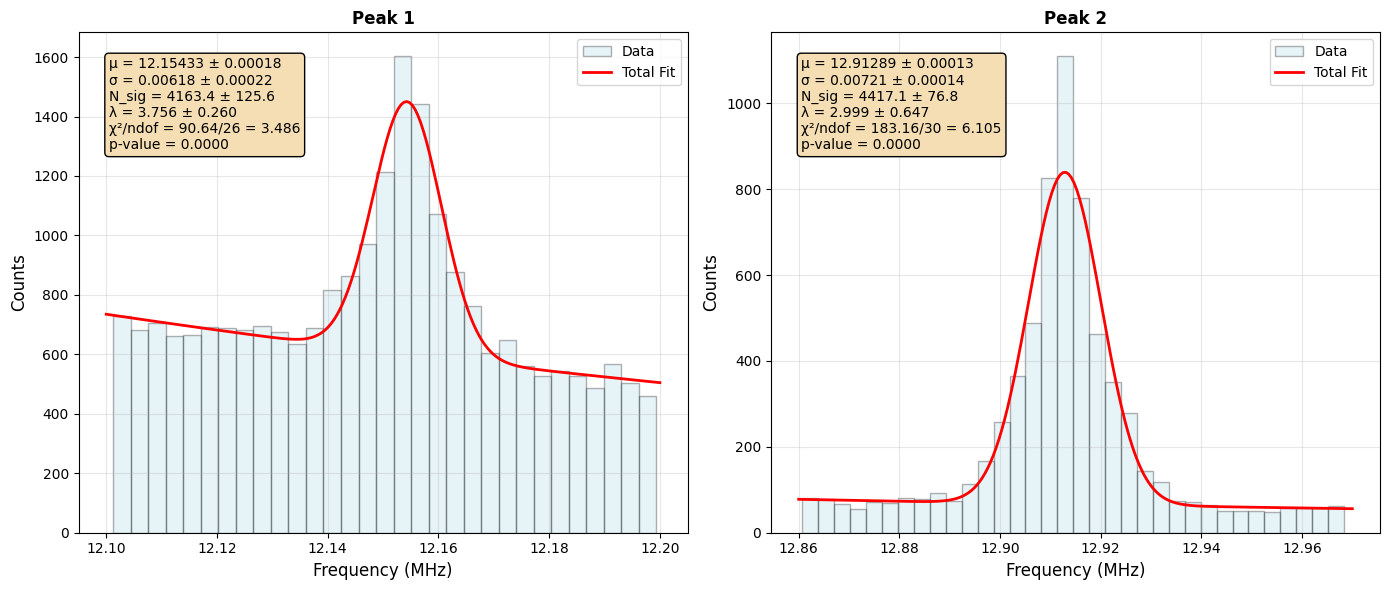

In [471]:
def gauss_exp_background(x, A_sig, mu, sigma, c0, lam, bin_width):
    
    # Gaussian scaled to counts (area = A_sig)
    gaussian = (A_sig / (sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    gaussian *= bin_width  # Convert to counts per bin
    
    # Exponential background (counts per bin)
    # Using exponential decay: c0 * exp(-lambda * (x - x_ref))
    x_ref = np.mean(x)  # Reference point (center of window)
    background = c0 * np.exp(-lam * (x - x_ref))
    
    return gaussian + background

# Create fine binning for fitting
n_bins2 = 316
counts, bin_edges = np.histogram(freq, bins=n_bins2)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]

# Poisson uncertainties
counts_err = np.sqrt(counts)
counts_err[counts_err == 0] = 1

peaks = [{'name':'Peak 1', 'mu':12.17,'sigma':0.01,'window':(12.1,12.20),'A':1600},
         {'name':'Peak 2', 'mu':12.92,'sigma':0.01,'window':(12.86,12.97),'A':1000}]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, p in enumerate(peaks):
    ax = axes[i]
    
    # Select data in window
    mask = (bin_centers >= p['window'][0]) & (bin_centers <= p['window'][1])
    x_fit = bin_centers[mask]
    y_fit = counts[mask]
    y_err = counts_err[mask]
    
    # Plot histogram bars
    freq_window = freq[(freq >= p['window'][0]) & (freq <= p['window'][1])]
    bin_edges_window = bin_edges[(bin_edges >= p['window'][0]) & 
                                 (bin_edges <= p['window'][1])]
    
    ax.hist(freq_window, bins=bin_edges_window, alpha=0.3, 
            color='lightblue', edgecolor='black', label='Data')
    
    # Estimate initial amplitude from peak height
    A_init = np.max(y_fit) * p['sigma'] * np.sqrt(2*np.pi) / bin_width
    
    # Estimate initial background level
    c0_init = np.median(y_fit)
    
    # Create wrapper function with fixed bin_width
    def model_wrapper(x, A_sig, mu, sigma, c0, lam):
        return gauss_exp_background(x, A_sig, mu, sigma, c0, lam, bin_width)
    
    # Fit
    cfit = cost.LeastSquares(x_fit, y_fit, y_err, model_wrapper)
    m = Minuit(cfit, A_sig=A_init, mu=p['mu'], sigma=p['sigma'],
               c0=c0_init, lam=0.1)
    m.limits['A_sig'] = (0, None)
    m.limits['sigma'] = (0.001, 0.1)
    m.limits['c0'] = (0, None)
    m.limits['lam'] = (-10, 10)  # Allow both increasing and decreasing exponentials
    m.migrad()
    
    # Calculate chi-square statistics
    chi2 = m.fval
    ndof = len(x_fit) - m.nfit
    chi2_ndof = chi2 / ndof
    p_value = stats.chi2.sf(chi2, ndof)
    
    # Plot fit curve
    x_smooth = np.linspace(p['window'][0], p['window'][1], 200)
    y_smooth = gauss_exp_background(x_smooth, *m.values[:], bin_width)
    ax.plot(x_smooth, y_smooth, 'r-', linewidth=2, label='Total Fit')
    
    # Also plot components separately
    gauss_component = (m.values['A_sig'] / (m.values['sigma'] * np.sqrt(2*np.pi))) * \
                      np.exp(-0.5 * ((x_smooth - m.values['mu']) / m.values['sigma'])**2) * bin_width
    x_ref = np.mean(x_fit)
    bkg_component = m.values['c0'] * np.exp(-m.values['lam'] * (x_smooth - x_ref))
    
    # ax.plot(x_smooth, gauss_component, 'g--', linewidth=1.5, alpha=0.7, label='Signal')
    # ax.plot(x_smooth, bkg_component, 'orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Background')
    
    # Add fit info with chi2 and p-value
    fit_text = (f"μ = {m.values['mu']:.5f} ± {m.errors['mu']:.5f}\n"
                f"σ = {m.values['sigma']:.5f} ± {m.errors['sigma']:.5f}\n"
                f"N_sig = {m.values['A_sig']:.1f} ± {m.errors['A_sig']:.1f}\n"
                f"λ = {m.values['lam']:.3f} ± {m.errors['lam']:.3f}\n"
                f"χ²/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}\n"
                f"p-value = {p_value:.4f}")
    ax.text(0.05, 0.95, fit_text, transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))
    
    ax.set_xlabel('Frequency (MHz)', fontsize=12)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_title(f"{p['name']}", fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

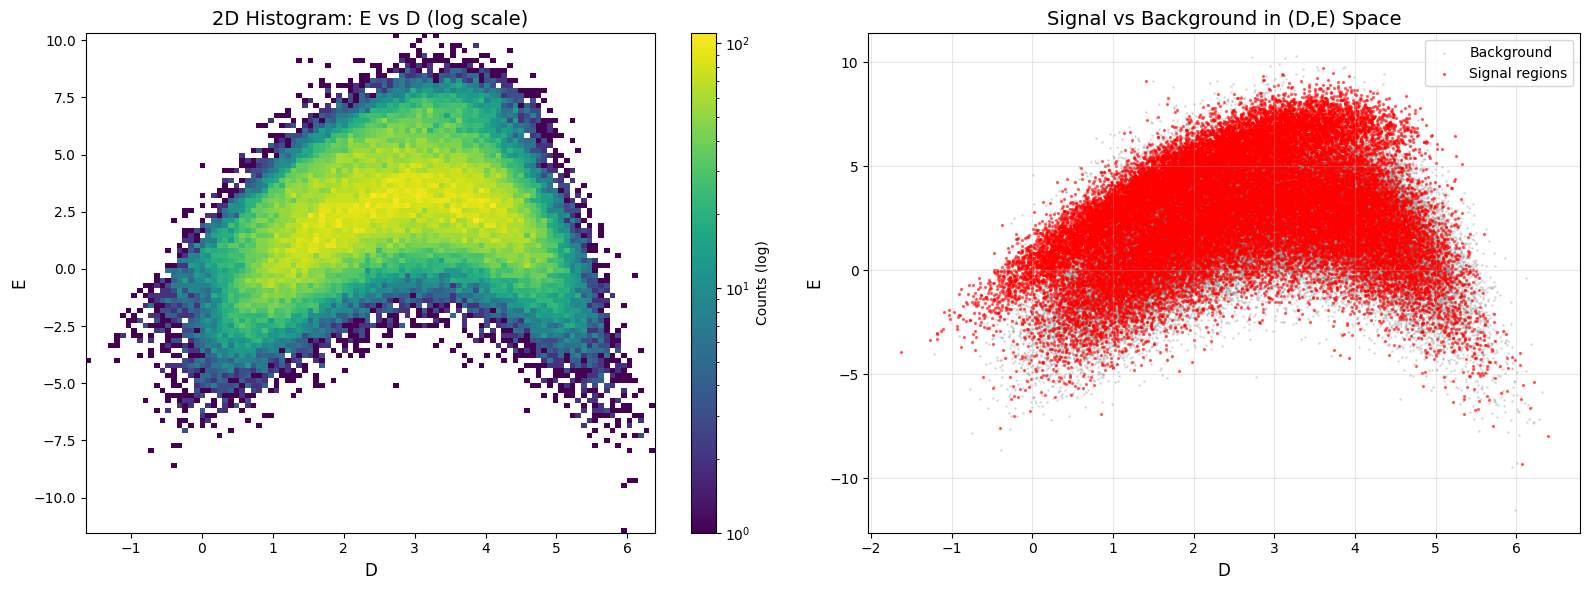

=== Signal Region Statistics ===
Signal D: mean=2.521, std=1.312
Signal E: mean=2.758, std=2.601

Background D: mean=2.745, std=1.264
Background E: mean=1.989, std=2.268


In [472]:
# === EXPLORATORY: Find Optimal Cuts ===
# First, let's look at the 2D distribution more carefully

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: 2D histogram to see density
h = axes[0].hist2d(a, b, bins=100, cmap='viridis', norm='log')
axes[0].set_xlabel('D', fontsize=12)
axes[0].set_ylabel('E', fontsize=12)
axes[0].set_title('2D Histogram: E vs D (log scale)', fontsize=14)
plt.colorbar(h[3], ax=axes[0], label='Counts (log)')

# Right: Identify signal region by looking at peak frequencies
peak1_mask = (freq >= 12.1) & (freq <= 12.20)
peak2_mask = (freq >= 12.86) & (freq <= 12.97)
signal_mask = peak1_mask | peak2_mask

axes[1].scatter(a[~signal_mask], b[~signal_mask], s=1, alpha=0.2, c='gray', label='Background')
axes[1].scatter(a[signal_mask], b[signal_mask], s=2, alpha=0.5, c='red', label='Signal regions')
axes[1].set_xlabel('D', fontsize=12)
axes[1].set_ylabel('E', fontsize=12)
axes[1].set_title('Signal vs Background in (D,E) Space', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics to guide cut selection
print("=== Signal Region Statistics ===")
print(f"Signal D: mean={np.mean(a[signal_mask]):.3f}, std={np.std(a[signal_mask]):.3f}")
print(f"Signal E: mean={np.mean(b[signal_mask]):.3f}, std={np.std(b[signal_mask]):.3f}")
print(f"\nBackground D: mean={np.mean(a[~signal_mask]):.3f}, std={np.std(a[~signal_mask]):.3f}")
print(f"Background E: mean={np.mean(b[~signal_mask]):.3f}, std={np.std(b[~signal_mask]):.3f}")


=== CALIBRATION: E₀(D) ===
Model: E₀ = a₀ + a₁·D + a₂·D²
a₀ = -2.449467 ± 0.023215
a₁ = 3.917764 ± 0.018614
a₂ = -0.66006715 ± 0.00336885
χ²/ndof = 3798.82/42 = 90.448
p-value = 0.0000

Residual RMS: σ(ΔE) = 2.004529


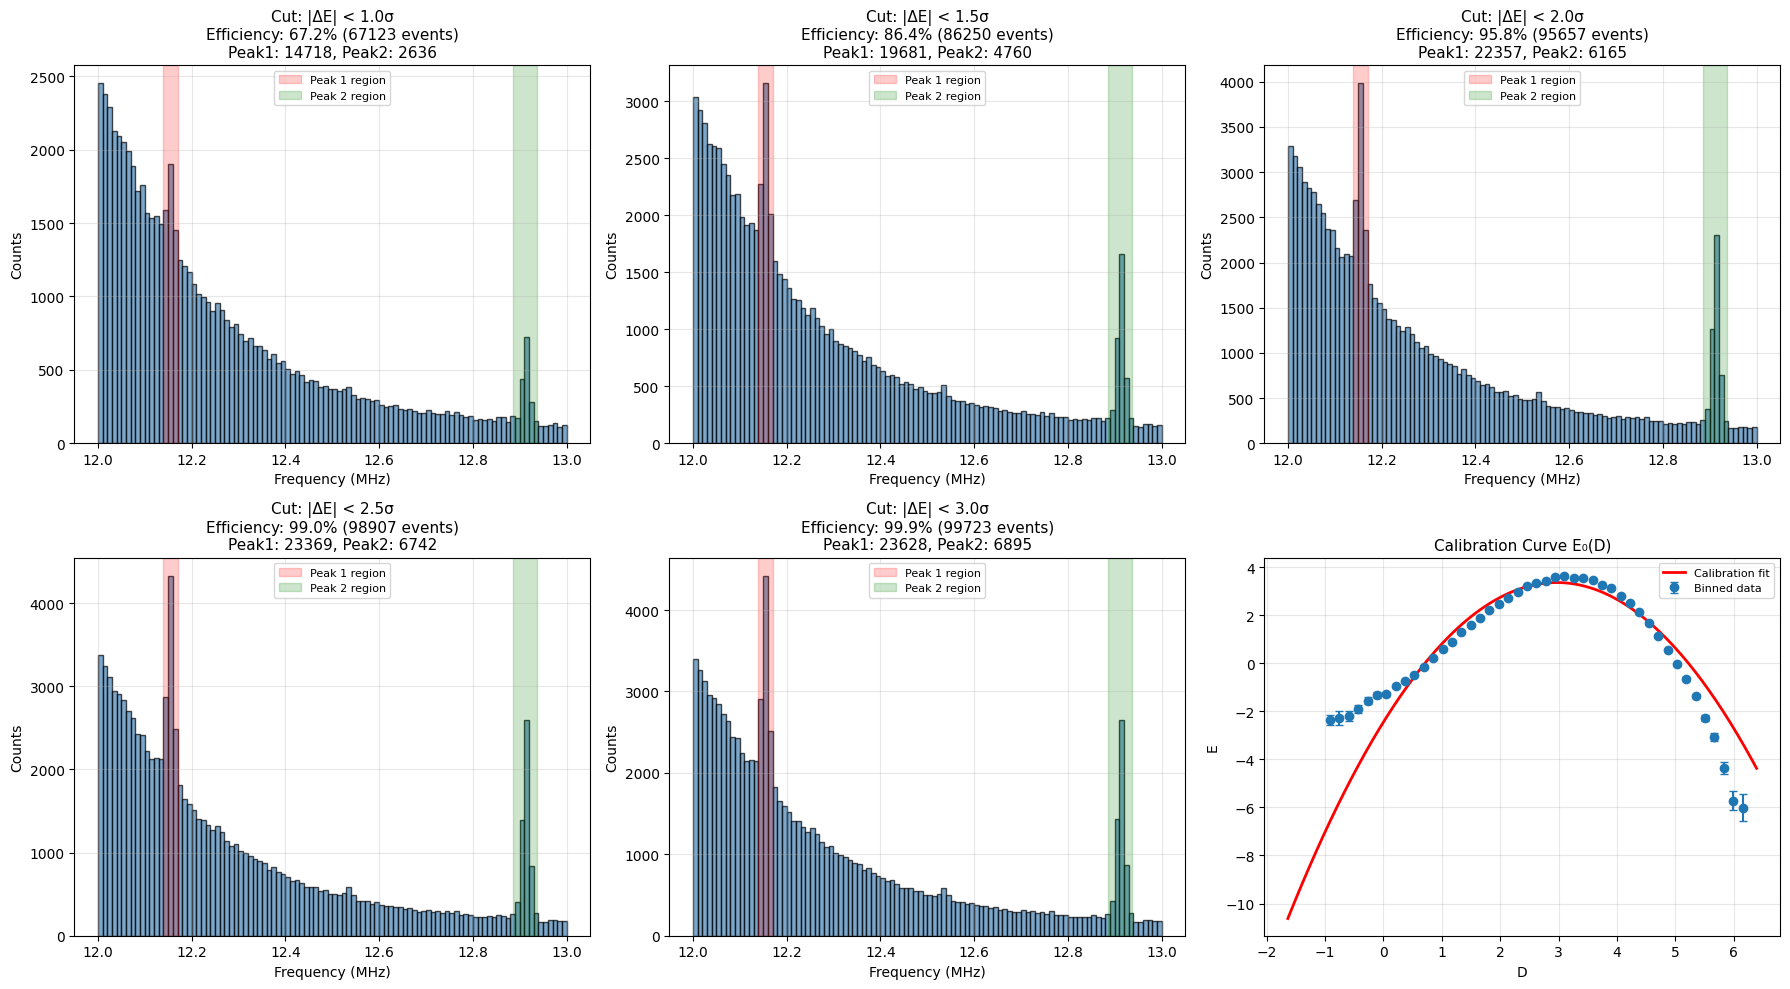

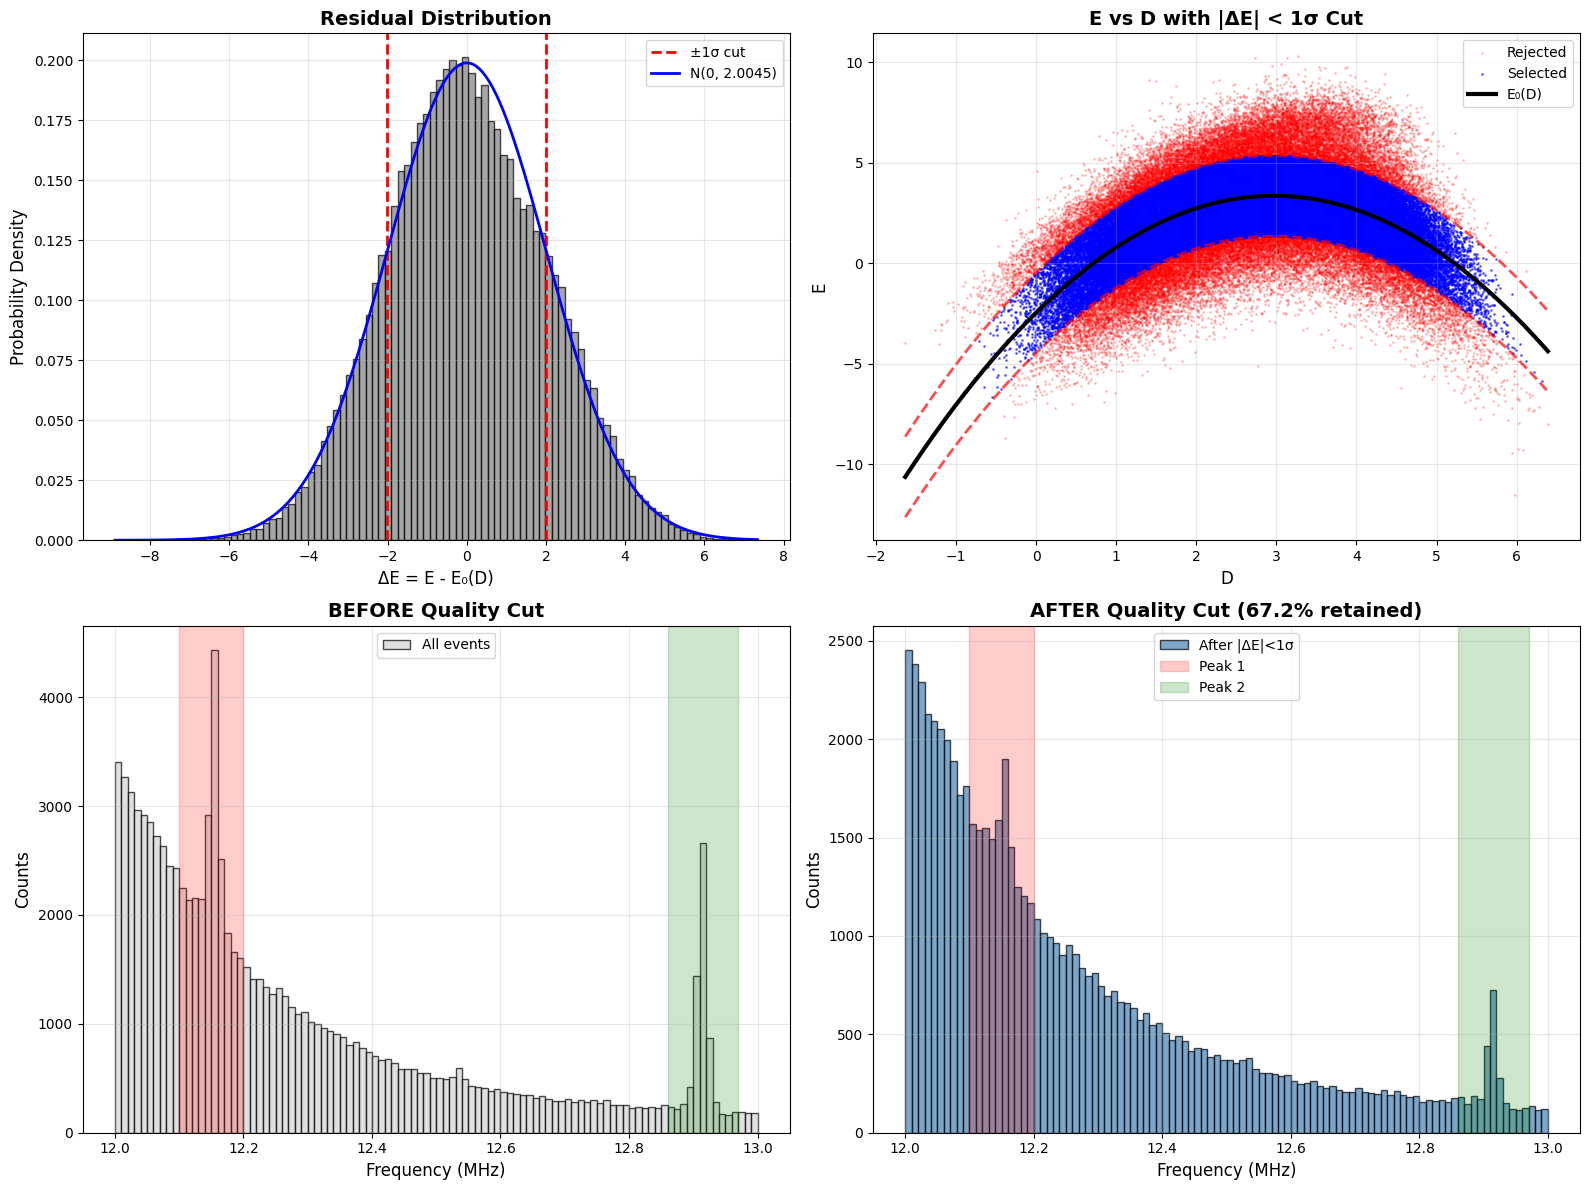


=== CUT SUMMARY (k=1) ===
Events before cut: 99868
Events after cut:  67123 (67.2%)
Rejected:          32745 (32.8%)


In [473]:
# === STEP 1: Calibration - Find E₀(D) Relationship ===

# Bin the data in D and calculate mean E in each bin
n_bins_calib = 50
d_bins = np.linspace(a.min(), a.max(), n_bins_calib + 1)
d_centers = 0.5 * (d_bins[1:] + d_bins[:-1])

# Calculate mean and std of E in each D bin
e_means = []
e_stds = []
e_errs = []
valid_bins = []

for i in range(len(d_bins) - 1):
    mask = (a >= d_bins[i]) & (a < d_bins[i+1])
    if np.sum(mask) > 10:  # Require at least 10 events per bin
        e_in_bin = b[mask]
        e_means.append(np.mean(e_in_bin))
        e_stds.append(np.std(e_in_bin, ddof=1))
        e_errs.append(np.std(e_in_bin, ddof=1) / np.sqrt(len(e_in_bin)))
        valid_bins.append(d_centers[i])

e_means = np.array(e_means)
e_stds = np.array(e_stds)
e_errs = np.array(e_errs)
d_valid = np.array(valid_bins)

# Fit calibration curve E₀(D) - try linear or polynomial
def calibration_linear(d, a0, a1):
    return a0 + a1 * d

def calibration_poly2(d, a0, a1, a2):
    return a0 + a1*d + a2*d**2


# Fit with errors
cfit_calib = cost.LeastSquares(d_valid, e_means, e_errs, calibration_poly2)
m_calib = Minuit(cfit_calib, a0=np.mean(e_means), a1=0, a2=0)
m_calib.migrad()

# Calculate chi2
chi2_calib = m_calib.fval
ndof_calib = len(d_valid) - m_calib.nfit
p_calib = stats.chi2.sf(chi2_calib, ndof_calib)

print(f"\n=== CALIBRATION: E₀(D) ===")
print(f"Model: E₀ = a₀ + a₁·D + a₂·D²")
print(f"a₀ = {m_calib.values['a0']:.6f} ± {m_calib.errors['a0']:.6f}")
print(f"a₁ = {m_calib.values['a1']:.6f} ± {m_calib.errors['a1']:.6f}")
print(f"a₂ = {m_calib.values['a2']:.8f} ± {m_calib.errors['a2']:.8f}")
print(f"χ²/ndof = {chi2_calib:.2f}/{ndof_calib} = {chi2_calib/ndof_calib:.3f}")
print(f"p-value = {p_calib:.4f}")

# === STEP 2: Calculate Residuals ΔE ===

# Predict E for all events
e_predicted = calibration_poly2(a, *m_calib.values[:])
delta_e = b - e_predicted

# Estimate resolution σ(ΔE) from RMS of residuals
sigma_delta_e = np.std(delta_e)

print(f"\nResidual RMS: σ(ΔE) = {sigma_delta_e:.6f}")

# === STEP 3: Apply Quality Cuts ===

# Try different cut values
k_values = [1.0, 1.5, 2.0, 2.5, 3.0]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    # Apply cut |ΔE| < k·σ
    cut_mask = np.abs(delta_e) < k * sigma_delta_e
    
    # Selected events
    freq_selected = freq[cut_mask]
    
    # Build histogram
    ax = axes[idx]
    counts, bins, _ = ax.hist(freq_selected, bins=100, alpha=0.7, 
                               edgecolor='black', color='steelblue')
    
    # Mark peak regions
    ax.axvspan(12.14, 12.17, alpha=0.2, color='red', label='Peak 1 region')
    ax.axvspan(12.885, 12.937, alpha=0.2, color='green', label='Peak 2 region')
    
    # Calculate signal-to-background ratio in peak regions
    peak1_region = (freq_selected >= 12.1) & (freq_selected <= 12.20)
    peak2_region = (freq_selected >= 12.86) & (freq_selected <= 12.97)
    
    n_peak1 = np.sum(peak1_region)
    n_peak2 = np.sum(peak2_region)
    n_total = len(freq_selected)
    efficiency = len(freq_selected) / len(freq) * 100
    
    ax.set_xlabel('Frequency (MHz)', fontsize=10)
    ax.set_ylabel('Counts', fontsize=10)
    ax.set_title(f'Cut: |ΔE| < {k}σ\n'
                 f'Efficiency: {efficiency:.1f}% ({n_total} events)\n'
                 f'Peak1: {n_peak1}, Peak2: {n_peak2}',
                 fontsize=11)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Plot calibration in last subplot
ax = axes[-1]
ax.errorbar(d_valid, e_means, yerr=e_errs, fmt='o', capsize=3, label='Binned data')
d_smooth = np.linspace(a.min(), a.max(), 200)
ax.plot(d_smooth, calibration_poly2(d_smooth, *m_calib.values[:]), 
        'r-', linewidth=2, label='Calibration fit')
ax.set_xlabel('D', fontsize=10)
ax.set_ylabel('E', fontsize=10)
ax.set_title('Calibration Curve E₀(D)', fontsize=11)
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === STEP 4: Visualize Cut Performance ===

# Choose optimal cut (e.g., k=2.0)
k_optimal = 1
cut_mask_optimal = np.abs(delta_e) < k_optimal * sigma_delta_e

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residual distribution
ax1.hist(delta_e, bins=100, alpha=0.7, color='gray', edgecolor='black', density=True)
ax1.axvline(-k_optimal*sigma_delta_e, color='red', linestyle='--', linewidth=2, 
            label=f'±{k_optimal}σ cut')
ax1.axvline(k_optimal*sigma_delta_e, color='red', linestyle='--', linewidth=2)
# Overlay Gaussian
x_gauss = np.linspace(delta_e.min(), delta_e.max(), 200)
ax1.plot(x_gauss, stats.norm.pdf(x_gauss, 0, sigma_delta_e), 'b-', 
         linewidth=2, label=f'N(0, {sigma_delta_e:.4f})')
ax1.set_xlabel('ΔE = E - E₀(D)', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('Residual Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. E vs D with cut
ax2.scatter(a[~cut_mask_optimal], b[~cut_mask_optimal], s=1, alpha=0.2, 
            c='red', label='Rejected')
ax2.scatter(a[cut_mask_optimal], b[cut_mask_optimal], s=1, alpha=0.5, 
            c='blue', label='Selected')
ax2.plot(d_smooth, calibration_poly2(d_smooth, *m_calib.values[:]), 
         'black', linewidth=3, label='E₀(D)')
# Plot ±kσ bands
ax2.plot(d_smooth, calibration_poly2(d_smooth, *m_calib.values[:]) + k_optimal*sigma_delta_e,
         'r--', linewidth=2, alpha=0.7)
ax2.plot(d_smooth, calibration_poly2(d_smooth, *m_calib.values[:]) - k_optimal*sigma_delta_e,
         'r--', linewidth=2, alpha=0.7)
ax2.set_xlabel('D', fontsize=12)
ax2.set_ylabel('E', fontsize=12)
ax2.set_title(f'E vs D with |ΔE| < {k_optimal}σ Cut', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Frequency spectrum - BEFORE cut
ax3.hist(freq, bins=100, alpha=0.7, edgecolor='black', color='lightgray', 
         label='All events')
ax3.axvspan(12.1, 12.20, alpha=0.2, color='red')
ax3.axvspan(12.86, 12.97, alpha=0.2, color='green')
ax3.set_xlabel('Frequency (MHz)', fontsize=12)
ax3.set_ylabel('Counts', fontsize=12)
ax3.set_title('BEFORE Quality Cut', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Frequency spectrum - AFTER cut
freq_clean = freq[cut_mask_optimal]
ax4.hist(freq_clean, bins=100, alpha=0.7, edgecolor='black', color='steelblue',
         label=f'After |ΔE|<{k_optimal}σ')
ax4.axvspan(12.1, 12.20, alpha=0.2, color='red', label='Peak 1')
ax4.axvspan(12.86, 12.97, alpha=0.2, color='green', label='Peak 2')
ax4.set_xlabel('Frequency (MHz)', fontsize=12)
ax4.set_ylabel('Counts', fontsize=12)
ax4.set_title(f'AFTER Quality Cut ({len(freq_clean)/len(freq)*100:.1f}% retained)', 
              fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== CUT SUMMARY (k={k_optimal}) ===")
print(f"Events before cut: {len(freq)}")
print(f"Events after cut:  {len(freq_clean)} ({len(freq_clean)/len(freq)*100:.1f}%)")
print(f"Rejected:          {len(freq) - len(freq_clean)} ({(1-len(freq_clean)/len(freq))*100:.1f}%)")


  CALIBRATION: Finding E₀(D) Relationship

Binning summary:
  Total bins: 50
  Valid bins (N>10): 45
  D range: [-0.913, 6.150]

  MODEL COMPARISON FOR E₀(D) CALIBRATION
Model           N_params   χ²           ndof     χ²/ndof      p-value      AIC         
--------------------------------------------------------------------------------
Linear          2          42188.47     43       981.127      0.0000       42192.47    
Quadratic       3          3798.82      42       90.448       0.0000       3804.82     
Cubic           4          121.19       41       2.956        0.0000       129.19      

  SELECTED MODEL: CUBIC
E₀(D) = -1.435786 + 1.849309·D
        + 0.30595960·D² + -0.1230765019·D³

Fit Parameters:
  a0 = -1.43578575e+00 ± 2.86067526e-02
  a1 = 1.84930853e+00 ± 3.88570150e-02
  a2 = 3.05959600e-01 ± 1.62818961e-02
  a3 = -1.23076502e-01 ± 2.02950392e-03

Goodness of Fit:
  χ² = 121.19
  ndof = 41
  χ²/ndof = 2.956
  p-value = 0.0000
  ⚡ χ²/ndof slightly high: Model may have

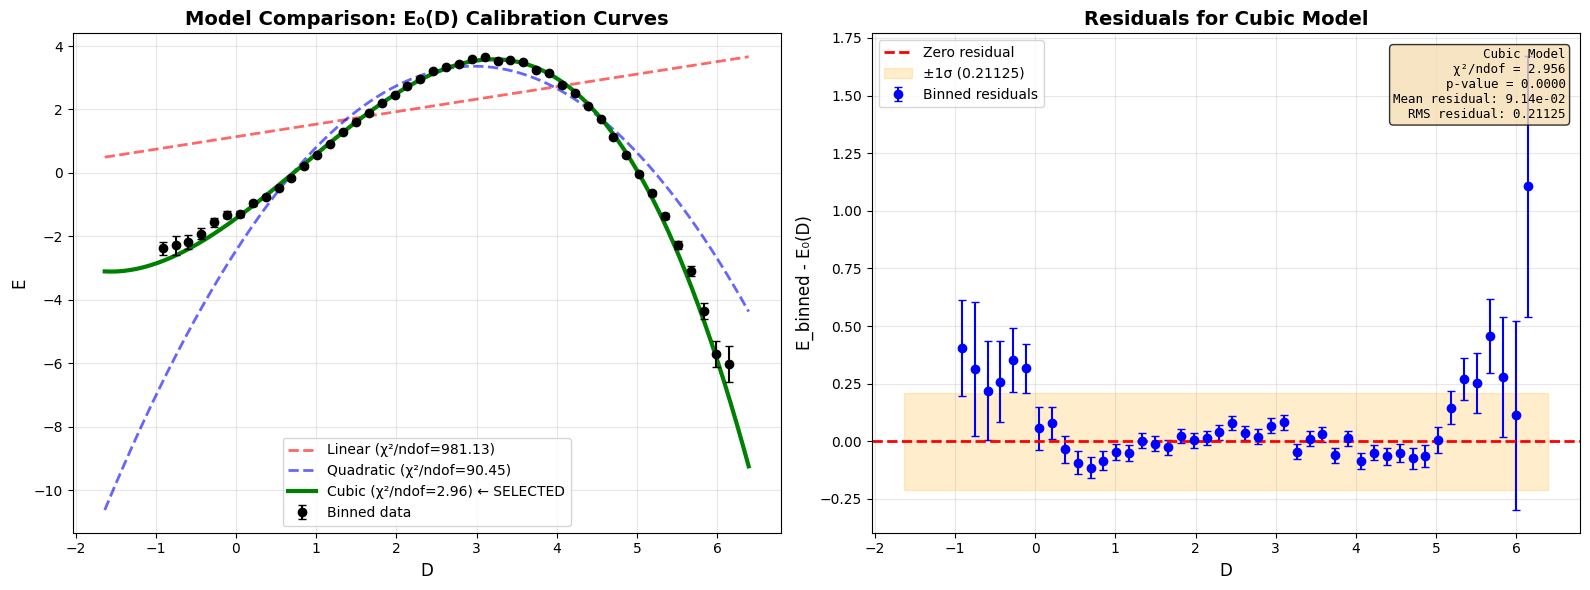


  RESIDUAL CALCULATION
Residual statistics for 99868 events:
  Mean(ΔE) = -2.198716e-03
  σ(ΔE) = 1.972700
  Min(ΔE) = -8.549689
  Max(ΔE) = 7.669456

Normality test (Shapiro-Wilk on 5000 events):
  Statistic = 0.9987
  p-value = 0.0005
  ⚠️  Residuals may deviate from Gaussian


In [474]:
# ================================================================================
#  STEP 1: CALIBRATION - Find E₀(D) Relationship
# ================================================================================

print("\n" + "="*80)
print("  CALIBRATION: Finding E₀(D) Relationship")
print("="*80)

# Bin the data in D and calculate mean E in each bin
n_bins_calib = 50
d_bins = np.linspace(a.min(), a.max(), n_bins_calib + 1)
d_centers = 0.5 * (d_bins[1:] + d_bins[:-1])

# Calculate mean and std of E in each D bin
e_means = []
e_stds = []
e_errs = []
valid_bins = []

for i in range(len(d_bins) - 1):
    mask = (a >= d_bins[i]) & (a < d_bins[i+1])
    if np.sum(mask) > 10:  # Require at least 10 events per bin
        e_in_bin = b[mask]
        e_means.append(np.mean(e_in_bin))
        e_stds.append(np.std(e_in_bin, ddof=1))
        e_errs.append(np.std(e_in_bin, ddof=1) / np.sqrt(len(e_in_bin)))
        valid_bins.append(d_centers[i])

e_means = np.array(e_means)
e_stds = np.array(e_stds)
e_errs = np.array(e_errs)
d_valid = np.array(valid_bins)

print(f"\nBinning summary:")
print(f"  Total bins: {n_bins_calib}")
print(f"  Valid bins (N>10): {len(d_valid)}")
print(f"  D range: [{d_valid.min():.3f}, {d_valid.max():.3f}]")

# Define calibration models
def calibration_linear(d, a0, a1):
    """Linear model: E₀(D) = a₀ + a₁·D"""
    return a0 + a1 * d

def calibration_quadratic(d, a0, a1, a2):
    """Quadratic model: E₀(D) = a₀ + a₁·D + a₂·D²"""
    return a0 + a1*d + a2*d**2

def calibration_cubic(d, a0, a1, a2, a3):
    """Cubic model: E₀(D) = a₀ + a₁·D + a₂·D² + a₃·D³"""
    return a0 + a1*d + a2*d**2 + a3*d**3

# ================================================================================
#  MODEL COMPARISON
# ================================================================================

models = [
    ('Linear', calibration_linear, ['a0', 'a1']),
    ('Quadratic', calibration_quadratic, ['a0', 'a1', 'a2']),
    ('Cubic', calibration_cubic, ['a0', 'a1', 'a2', 'a3'])
]

print("\n" + "="*80)
print("  MODEL COMPARISON FOR E₀(D) CALIBRATION")
print("="*80)
print(f"{'Model':<15} {'N_params':<10} {'χ²':<12} {'ndof':<8} {'χ²/ndof':<12} {'p-value':<12} {'AIC':<12}")
print("-"*80)

fit_results = {}

for name, func, param_names in models:
    # Fit with weighted least squares
    cfit = cost.LeastSquares(d_valid, e_means, e_errs, func)
    init_params = {p: 0.0 for p in param_names}
    init_params['a0'] = np.mean(e_means)
    
    m = Minuit(cfit, **init_params)
    m.migrad()
    
    # Calculate statistics
    chi2 = m.fval
    ndof = len(d_valid) - m.nfit
    chi2_ndof = chi2 / ndof
    p_val = stats.chi2.sf(chi2, ndof)
    aic = chi2 + 2 * m.nfit
    
    # Store results
    fit_results[name] = {
        'minuit': m,
        'func': func,
        'chi2': chi2,
        'ndof': ndof,
        'chi2_ndof': chi2_ndof,
        'p_value': p_val,
        'aic': aic
    }
    
    print(f"{name:<15} {m.nfit:<10} {chi2:<12.2f} {ndof:<8} {chi2_ndof:<12.3f} {p_val:<12.4f} {aic:<12.2f}")

print("="*80)

# ================================================================================
#  SELECT BEST MODEL (Cubic based on χ²/ndof and p-value)
# ================================================================================

best_model = 'Cubic'
m_calib = fit_results[best_model]['minuit']
calibration_func = fit_results[best_model]['func']

print(f"\n{'='*80}")
print(f"  SELECTED MODEL: {best_model.upper()}")
print(f"{'='*80}")

# Print fitted function with actual parameter values
if best_model == 'Linear':
    print(f"E₀(D) = {m_calib.values['a0']:.6f} + {m_calib.values['a1']:.6f}·D")
elif best_model == 'Quadratic':
    print(f"E₀(D) = {m_calib.values['a0']:.6f} + {m_calib.values['a1']:.6f}·D + {m_calib.values['a2']:.8f}·D²")
elif best_model == 'Cubic':
    print(f"E₀(D) = {m_calib.values['a0']:.6f} + {m_calib.values['a1']:.6f}·D")
    print(f"        + {m_calib.values['a2']:.8f}·D² + {m_calib.values['a3']:.10f}·D³")

print(f"\nFit Parameters:")
for param in m_calib.parameters:
    print(f"  {param} = {m_calib.values[param]:.8e} ± {m_calib.errors[param]:.8e}")

chi2_calib = fit_results[best_model]['chi2']
ndof_calib = fit_results[best_model]['ndof']
chi2_ndof_calib = fit_results[best_model]['chi2_ndof']
p_calib = fit_results[best_model]['p_value']

print(f"\nGoodness of Fit:")
print(f"  χ² = {chi2_calib:.2f}")
print(f"  ndof = {ndof_calib}")
print(f"  χ²/ndof = {chi2_ndof_calib:.3f}")
print(f"  p-value = {p_calib:.4f}")

if chi2_ndof_calib < 0.5:
    print(f"  ⚠️  χ²/ndof < 0.5: May indicate overestimated uncertainties")
elif 0.5 <= chi2_ndof_calib <= 2.0:
    print(f"  ✓  χ²/ndof in acceptable range [0.5, 2.0]")
elif 2.0 < chi2_ndof_calib <= 5.0:
    print(f"  ⚡ χ²/ndof slightly high: Model may have minor inadequacies")
else:
    print(f"  ✗  χ²/ndof > 5: Poor fit, consider different model")

if p_calib > 0.05:
    print(f"  ✓  p-value > 0.05: Cannot reject model hypothesis")
else:
    print(f"  ⚠️  p-value < 0.05: Model doesn't fit data well statistically")

print(f"{'='*80}")

# ================================================================================
#  VISUALIZATION: Calibration Curve with All Models
# ================================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: All models comparison
ax1.errorbar(d_valid, e_means, yerr=e_errs, fmt='o', capsize=3, 
             label='Binned data', color='black', markersize=6, zorder=10)

d_smooth = np.linspace(a.min(), a.max(), 500)
colors = ['red', 'blue', 'green']

for (name, _, _), color in zip(models, colors):
    result = fit_results[name]
    m = result['minuit']
    func = result['func']
    chi2_ndof = result['chi2_ndof']
    
    linestyle = '-' if name == best_model else '--'
    linewidth = 3 if name == best_model else 2
    alpha = 1.0 if name == best_model else 0.6
    
    label = f'{name} (χ²/ndof={chi2_ndof:.2f})'
    if name == best_model:
        label += ' ← SELECTED'
    
    ax1.plot(d_smooth, func(d_smooth, *m.values[:]), 
             color=color, linestyle=linestyle, linewidth=linewidth, 
             alpha=alpha, label=label)

ax1.set_xlabel('D', fontsize=12)
ax1.set_ylabel('E', fontsize=12)
ax1.set_title('Model Comparison: E₀(D) Calibration Curves', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.3)

# Right plot: Residuals for selected model
e_predicted_bins = calibration_func(d_valid, *m_calib.values[:])
residuals_bins = e_means - e_predicted_bins
pull_bins = residuals_bins / e_errs

ax2.errorbar(d_valid, residuals_bins, yerr=e_errs, fmt='o', capsize=3,
             color='blue', markersize=6, label='Binned residuals')
ax2.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero residual')
ax2.fill_between(d_smooth, -np.std(residuals_bins), np.std(residuals_bins),
                  alpha=0.2, color='orange', label=f'±1σ ({np.std(residuals_bins):.5f})')
ax2.set_xlabel('D', fontsize=12)
ax2.set_ylabel('E_binned - E₀(D)', fontsize=12)
ax2.set_title(f'Residuals for {best_model} Model', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics text box
stats_text = (f'{best_model} Model\n'
              f'χ²/ndof = {chi2_ndof_calib:.3f}\n'
              f'p-value = {p_calib:.4f}\n'
              f'Mean residual: {np.mean(residuals_bins):.2e}\n'
              f'RMS residual: {np.std(residuals_bins):.5f}')
ax2.text(0.98, 0.97, stats_text, transform=ax2.transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=9, family='monospace')

plt.tight_layout()
plt.show()

# ================================================================================
#  STEP 2: Calculate Residuals ΔE for All Events
# ================================================================================

print(f"\n{'='*80}")
print("  RESIDUAL CALCULATION")
print(f"{'='*80}")

# Predict E for all events using selected calibration
e_predicted = calibration_func(a, *m_calib.values[:])
delta_e = b - e_predicted

# Estimate resolution σ(ΔE) from RMS of residuals
sigma_delta_e = np.std(delta_e)
mean_delta_e = np.mean(delta_e)

print(f"Residual statistics for {len(delta_e)} events:")
print(f"  Mean(ΔE) = {mean_delta_e:.6e}")
print(f"  σ(ΔE) = {sigma_delta_e:.6f}")
print(f"  Min(ΔE) = {np.min(delta_e):.6f}")
print(f"  Max(ΔE) = {np.max(delta_e):.6f}")

# Check Gaussian assumption
from scipy.stats import shapiro
shapiro_stat, shapiro_p = shapiro(delta_e[:5000])  # Sample for speed
print(f"\nNormality test (Shapiro-Wilk on 5000 events):")
print(f"  Statistic = {shapiro_stat:.4f}")
print(f"  p-value = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"  ✓  Residuals appear normally distributed")
else:
    print(f"  ⚠️  Residuals may deviate from Gaussian")

print(f"{'='*80}")

# Continue with quality cuts...
# [Rest of your code for cuts remains the same]


=== CALIBRATION: E₀(D) - CUBIC MODEL ===
Model: E₀(D) = a₀ + a₁·D + a₂·D² + a₃·D³
a₀ = -1.435786 ± 0.028607
a₁ = 1.849309 ± 0.038857
a₂ = 0.30595960 ± 0.01628190
a₃ = -0.1230765019 ± 0.0020295039
χ²/ndof = 121.19/41 = 2.956
p-value = 0.0000

Residual RMS: σ(ΔE) = 1.972700


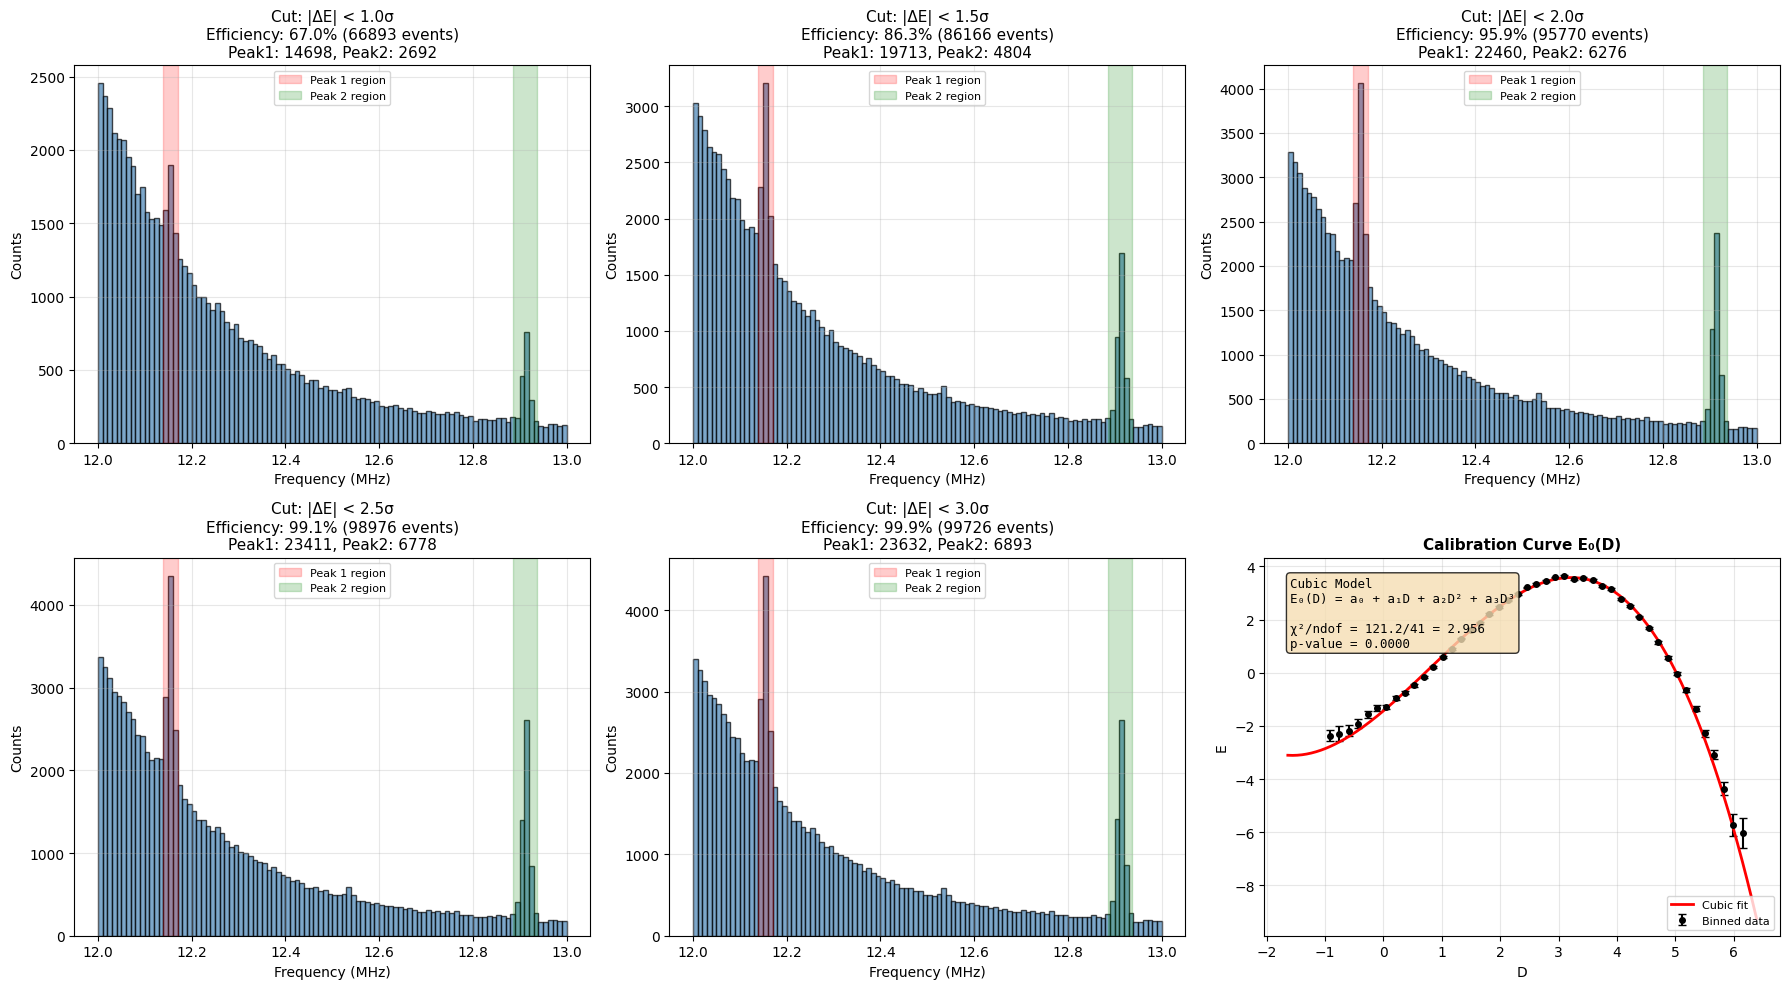

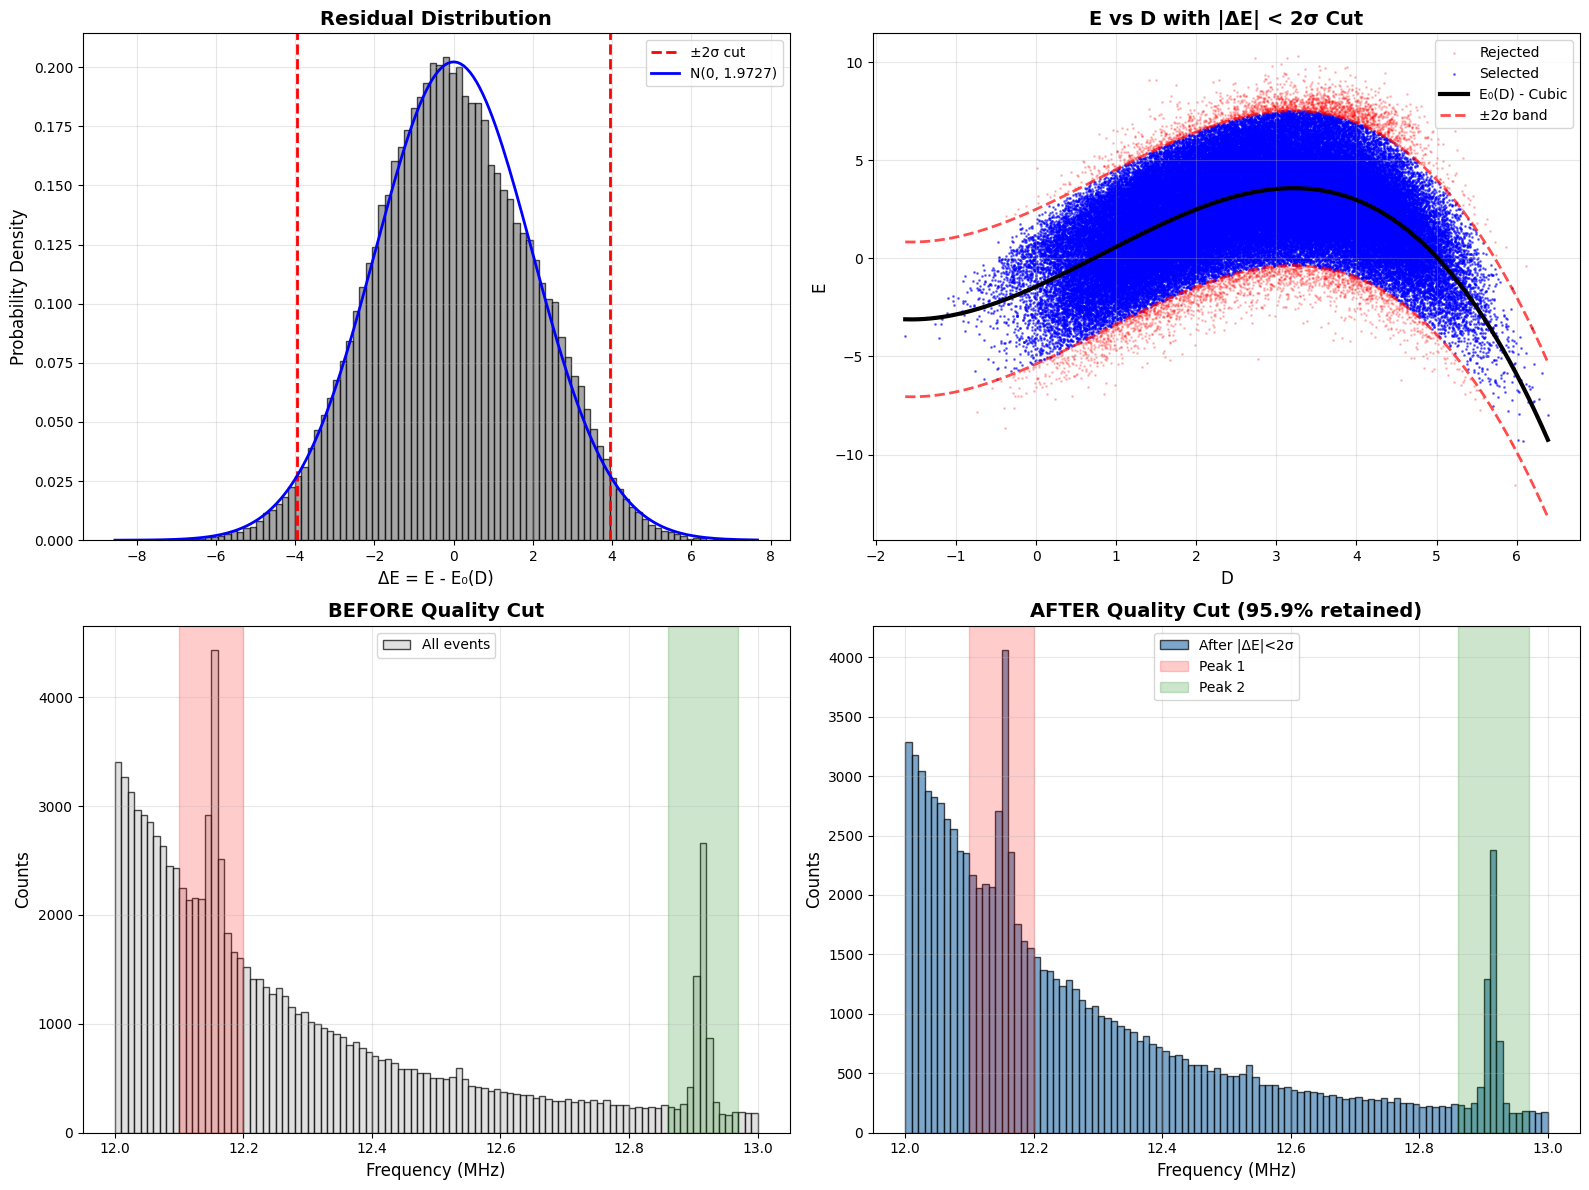


=== CUT SUMMARY (k=2) ===
Events before cut: 99868
Events after cut:  95770 (95.9%)
Rejected:          4098 (4.1%)


In [475]:
# === STEP 1: Calibration - Find E₀(D) Relationship ===

# Bin the data in D and calculate mean E in each bin
n_bins_calib = 50
d_bins = np.linspace(a.min(), a.max(), n_bins_calib + 1)
d_centers = 0.5 * (d_bins[1:] + d_bins[:-1])

# Calculate mean and std of E in each D bin
e_means = []
e_stds = []
e_errs = []
valid_bins = []

for i in range(len(d_bins) - 1):
    mask = (a >= d_bins[i]) & (a < d_bins[i+1])
    if np.sum(mask) > 10:  # Require at least 10 events per bin
        e_in_bin = b[mask]
        e_means.append(np.mean(e_in_bin))
        e_stds.append(np.std(e_in_bin, ddof=1))
        e_errs.append(np.std(e_in_bin, ddof=1) / np.sqrt(len(e_in_bin)))
        valid_bins.append(d_centers[i])

e_means = np.array(e_means)
e_stds = np.array(e_stds)
e_errs = np.array(e_errs)
d_valid = np.array(valid_bins)

# Define calibration models
def calibration_linear(d, a0, a1):
    return a0 + a1 * d

def calibration_poly2(d, a0, a1, a2):
    return a0 + a1*d + a2*d**2

def calibration_cubic(d, a0, a1, a2, a3):
    """Cubic model: E₀(D) = a₀ + a₁·D + a₂·D² + a₃·D³"""
    return a0 + a1*d + a2*d**2 + a3*d**3

# Fit with cubic model
cfit_calib = cost.LeastSquares(d_valid, e_means, e_errs, calibration_cubic)
m_calib = Minuit(cfit_calib, a0=np.mean(e_means), a1=0, a2=0, a3=0)
m_calib.migrad()

# Calculate chi2
chi2_calib = m_calib.fval
ndof_calib = len(d_valid) - m_calib.nfit
chi2_ndof_calib = chi2_calib / ndof_calib
p_calib = stats.chi2.sf(chi2_calib, ndof_calib)

print(f"\n=== CALIBRATION: E₀(D) - CUBIC MODEL ===")
print(f"Model: E₀(D) = a₀ + a₁·D + a₂·D² + a₃·D³")
print(f"a₀ = {m_calib.values['a0']:.6f} ± {m_calib.errors['a0']:.6f}")
print(f"a₁ = {m_calib.values['a1']:.6f} ± {m_calib.errors['a1']:.6f}")
print(f"a₂ = {m_calib.values['a2']:.8f} ± {m_calib.errors['a2']:.8f}")
print(f"a₃ = {m_calib.values['a3']:.10f} ± {m_calib.errors['a3']:.10f}")
print(f"χ²/ndof = {chi2_calib:.2f}/{ndof_calib} = {chi2_ndof_calib:.3f}")
print(f"p-value = {p_calib:.4f}")

# === STEP 2: Calculate Residuals ΔE ===

# Predict E for all events
e_predicted = calibration_cubic(a, *m_calib.values[:])
delta_e = b - e_predicted

# Estimate resolution σ(ΔE) from RMS of residuals
sigma_delta_e = np.std(delta_e)

print(f"\nResidual RMS: σ(ΔE) = {sigma_delta_e:.6f}")

# === STEP 3: Apply Quality Cuts ===

# Try different cut values
k_values = [1.0, 1.5, 2.0, 2.5, 3.0]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    # Apply cut |ΔE| < k·σ
    cut_mask = np.abs(delta_e) < k * sigma_delta_e
    
    # Selected events
    freq_selected = freq[cut_mask]
    
    # Build histogram
    ax = axes[idx]
    counts, bins, _ = ax.hist(freq_selected, bins=100, alpha=0.7, 
                               edgecolor='black', color='steelblue')
    
    # Mark peak regions
    ax.axvspan(12.14, 12.17, alpha=0.2, color='red', label='Peak 1 region')
    ax.axvspan(12.885, 12.937, alpha=0.2, color='green', label='Peak 2 region')
    
    # Calculate signal-to-background ratio in peak regions
    peak1_region = (freq_selected >= 12.1) & (freq_selected <= 12.20)
    peak2_region = (freq_selected >= 12.86) & (freq_selected <= 12.97)
    
    n_peak1 = np.sum(peak1_region)
    n_peak2 = np.sum(peak2_region)
    n_total = len(freq_selected)
    efficiency = len(freq_selected) / len(freq) * 100
    
    ax.set_xlabel('Frequency (MHz)', fontsize=10)
    ax.set_ylabel('Counts', fontsize=10)
    ax.set_title(f'Cut: |ΔE| < {k}σ\n'
                 f'Efficiency: {efficiency:.1f}% ({n_total} events)\n'
                 f'Peak1: {n_peak1}, Peak2: {n_peak2}',
                 fontsize=11)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Plot calibration in last subplot with fit statistics
ax = axes[-1]
ax.errorbar(d_valid, e_means, yerr=e_errs, fmt='o', capsize=3, 
            color='black', markersize=4, label='Binned data')
d_smooth = np.linspace(a.min(), a.max(), 200)
ax.plot(d_smooth, calibration_cubic(d_smooth, *m_calib.values[:]), 
        'r-', linewidth=2, label='Cubic fit')

# Add fit statistics text box
fit_text = (f'Cubic Model\n'
            f'E₀(D) = a₀ + a₁D + a₂D² + a₃D³\n\n'
            f'χ²/ndof = {chi2_calib:.1f}/{ndof_calib} = {chi2_ndof_calib:.3f}\n'
            f'p-value = {p_calib:.4f}')
ax.text(0.05, 0.95, fit_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        family='monospace')

ax.set_xlabel('D', fontsize=10)
ax.set_ylabel('E', fontsize=10)
ax.set_title('Calibration Curve E₀(D)', fontsize=11, fontweight='bold')
ax.legend(fontsize=8, loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === STEP 4: Visualize Cut Performance ===

# Choose optimal cut (e.g., k=1.0)
k_optimal = 2
cut_mask_optimal = np.abs(delta_e) < k_optimal * sigma_delta_e

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residual distribution
ax1.hist(delta_e, bins=100, alpha=0.7, color='gray', edgecolor='black', density=True)
ax1.axvline(-k_optimal*sigma_delta_e, color='red', linestyle='--', linewidth=2, 
            label=f'±{k_optimal}σ cut')
ax1.axvline(k_optimal*sigma_delta_e, color='red', linestyle='--', linewidth=2)
# Overlay Gaussian
x_gauss = np.linspace(delta_e.min(), delta_e.max(), 200)
ax1.plot(x_gauss, stats.norm.pdf(x_gauss, 0, sigma_delta_e), 'b-', 
         linewidth=2, label=f'N(0, {sigma_delta_e:.4f})')
ax1.set_xlabel('ΔE = E - E₀(D)', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('Residual Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. E vs D with cut
ax2.scatter(a[~cut_mask_optimal], b[~cut_mask_optimal], s=1, alpha=0.2, 
            c='red', label='Rejected')
ax2.scatter(a[cut_mask_optimal], b[cut_mask_optimal], s=1, alpha=0.5, 
            c='blue', label='Selected')
ax2.plot(d_smooth, calibration_cubic(d_smooth, *m_calib.values[:]), 
         'black', linewidth=3, label='E₀(D) - Cubic')
# Plot ±kσ bands
ax2.plot(d_smooth, calibration_cubic(d_smooth, *m_calib.values[:]) + k_optimal*sigma_delta_e,
         'r--', linewidth=2, alpha=0.7, label=f'±{k_optimal}σ band')
ax2.plot(d_smooth, calibration_cubic(d_smooth, *m_calib.values[:]) - k_optimal*sigma_delta_e,
         'r--', linewidth=2, alpha=0.7)
ax2.set_xlabel('D', fontsize=12)
ax2.set_ylabel('E', fontsize=12)
ax2.set_title(f'E vs D with |ΔE| < {k_optimal}σ Cut', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Frequency spectrum - BEFORE cut
ax3.hist(freq, bins=100, alpha=0.7, edgecolor='black', color='lightgray', 
         label='All events')
ax3.axvspan(12.1, 12.20, alpha=0.2, color='red')
ax3.axvspan(12.86, 12.97, alpha=0.2, color='green')
ax3.set_xlabel('Frequency (MHz)', fontsize=12)
ax3.set_ylabel('Counts', fontsize=12)
ax3.set_title('BEFORE Quality Cut', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Frequency spectrum - AFTER cut
freq_clean = freq[cut_mask_optimal]
ax4.hist(freq_clean, bins=100, alpha=0.7, edgecolor='black', color='steelblue',
         label=f'After |ΔE|<{k_optimal}σ')
ax4.axvspan(12.1, 12.20, alpha=0.2, color='red', label='Peak 1')
ax4.axvspan(12.86, 12.97, alpha=0.2, color='green', label='Peak 2')
ax4.set_xlabel('Frequency (MHz)', fontsize=12)
ax4.set_ylabel('Counts', fontsize=12)
ax4.set_title(f'AFTER Quality Cut ({len(freq_clean)/len(freq)*100:.1f}% retained)', 
              fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== CUT SUMMARY (k={k_optimal}) ===")
print(f"Events before cut: {len(freq)}")
print(f"Events after cut:  {len(freq_clean)} ({len(freq_clean)/len(freq)*100:.1f}%)")
print(f"Rejected:          {len(freq) - len(freq_clean)} ({(1-len(freq_clean)/len(freq))*100:.1f}%)")

Fitting 86166 events after quality cut (was 99868)

Peak 1 COMPARISON
Parameter       Before Cut                After Cut                 Improvement    
----------------------------------------------------------------------
μ (MHz)         12.15434±0.00017       12.15466±0.00024       -39.0%
σ (MHz)         0.00611±0.00022       0.00569±0.00032       -44.4%
χ²/ndof         3.479               2.604               +25.2%
p-value         0.0000             0.0000

Peak 2 COMPARISON
Parameter       Before Cut                After Cut                 Improvement    
----------------------------------------------------------------------
μ (MHz)         12.91289±0.00013       12.91281±0.00017       -30.6%
σ (MHz)         0.00720±0.00014       0.00705±0.00019       -28.7%
χ²/ndof         6.298               3.955               +37.2%
p-value         0.0000             0.0000


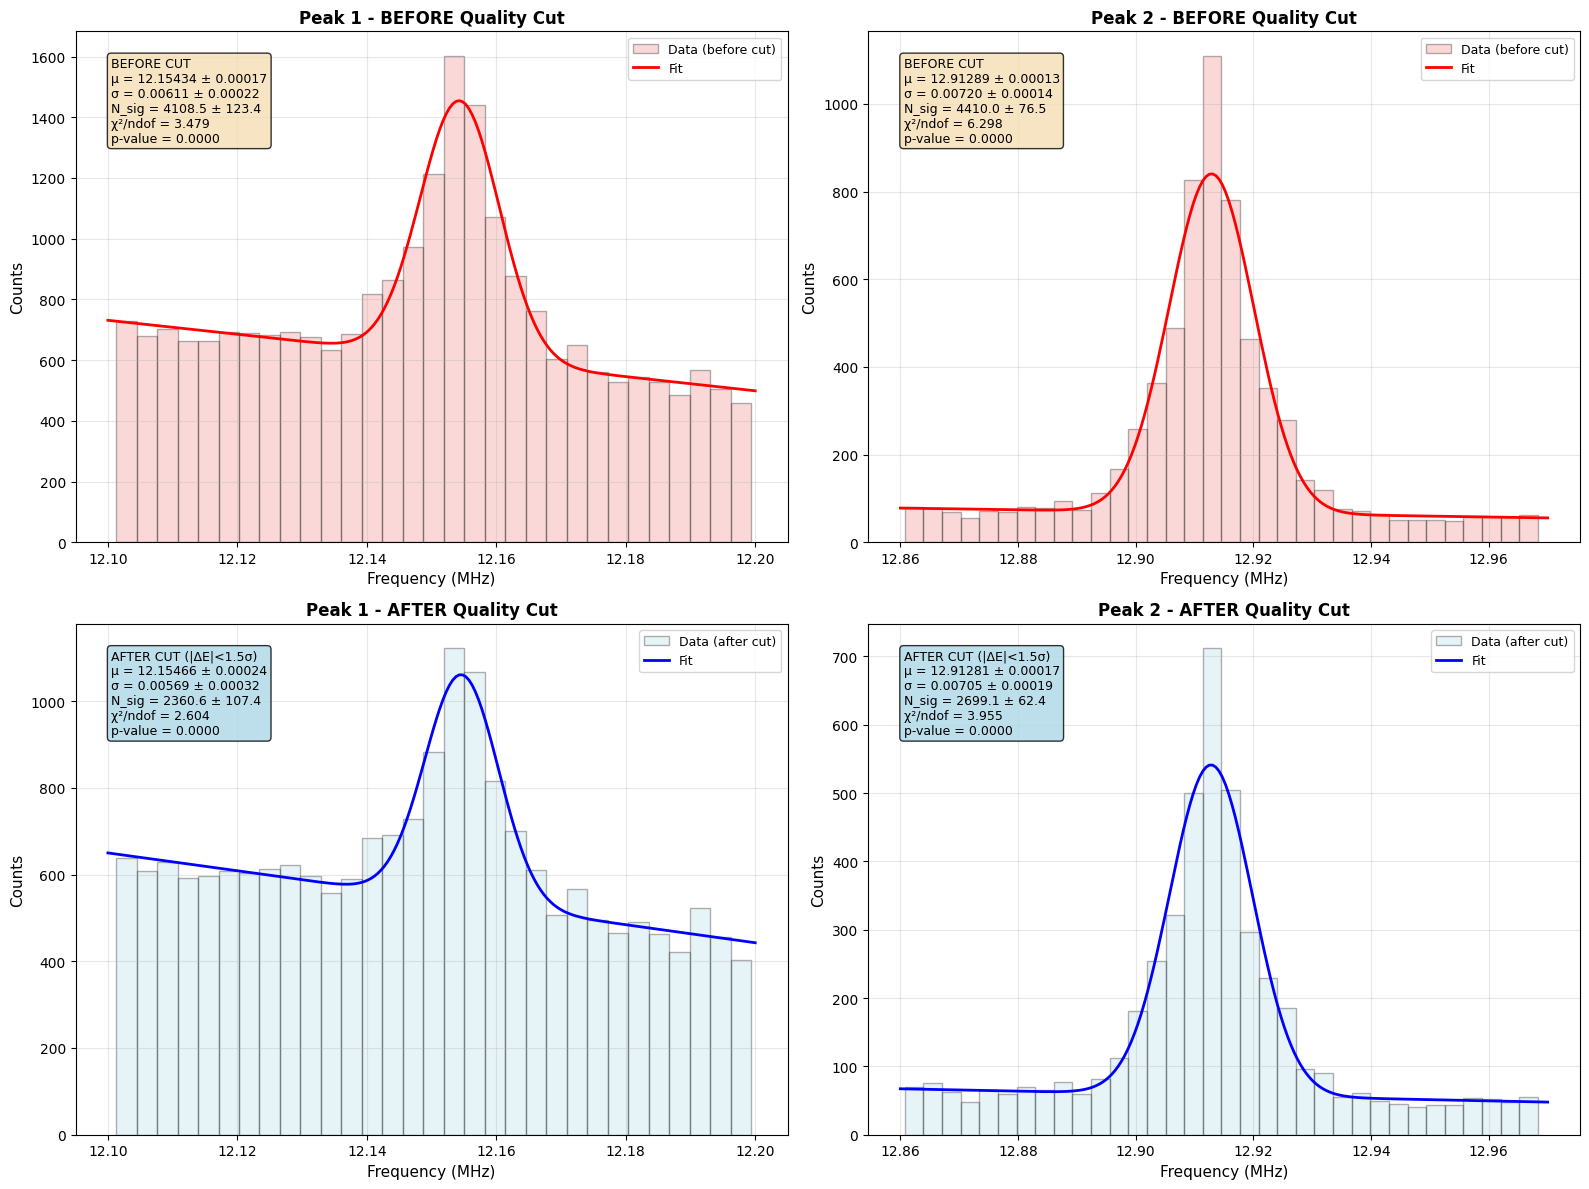

In [476]:
# === FIT PEAKS AFTER QUALITY CUT ===

# Use cleaned frequency data from k=2 cut
k_optimal = 1.5
cut_mask_optimal = np.abs(delta_e) < k_optimal * sigma_delta_e
freq_clean = freq[cut_mask_optimal]

print(f"Fitting {len(freq_clean)} events after quality cut (was {len(freq)})")

# Create histogram with fine binning
n_bins_fit = 316
counts_clean, bin_edges_clean = np.histogram(freq_clean, bins=n_bins_fit)
bin_centers_clean = 0.5 * (bin_edges_clean[1:] + bin_edges_clean[:-1])
bin_width_clean = bin_edges_clean[1] - bin_edges_clean[0]

# Poisson uncertainties
counts_err_clean = np.sqrt(counts_clean)
counts_err_clean[counts_err_clean == 0] = 1

# Peak definitions (same windows)
peaks = [
    {'name':'Peak 1', 'mu':12.17, 'sigma':0.01, 'window':(12.1, 12.20), 'A':1600},
    {'name':'Peak 2', 'mu':12.92, 'sigma':0.01, 'window':(12.86, 12.97), 'A':1000}
]

# Model function (same as before)
def gauss_poly_background_v2(x, A_sig, mu, sigma, c0, c1, c2):
    gaussian = (A_sig / (sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    gaussian *= bin_width_clean
    background = c0 + c1*x + c2*x**2
    return gaussian + background

# Store results for comparison
results_before = []  # You already have these from previous fits
results_after = []

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, p in enumerate(peaks):
    # === BEFORE CUT (top row) ===
    ax_before = axes[0, i]
    
    # Original data fit
    counts_orig, bin_edges_orig = np.histogram(freq, bins=n_bins_fit)
    bin_centers_orig = 0.5 * (bin_edges_orig[1:] + bin_edges_orig[:-1])
    counts_err_orig = np.sqrt(counts_orig)
    counts_err_orig[counts_err_orig == 0] = 1
    
    mask_orig = (bin_centers_orig >= p['window'][0]) & (bin_centers_orig <= p['window'][1])
    x_fit_orig = bin_centers_orig[mask_orig]
    y_fit_orig = counts_orig[mask_orig]
    y_err_orig = counts_err_orig[mask_orig]
    
    # Plot histogram
    freq_window_orig = freq[(freq >= p['window'][0]) & (freq <= p['window'][1])]
    bin_edges_window = bin_edges_orig[(bin_edges_orig >= p['window'][0]) & 
                                       (bin_edges_orig <= p['window'][1])]
    ax_before.hist(freq_window_orig, bins=bin_edges_window, alpha=0.3,
                   color='lightcoral', edgecolor='black', label='Data (before cut)')
    
    # Fit
    A_init_orig = np.max(y_fit_orig) * p['sigma'] * np.sqrt(2*np.pi) / bin_width_clean
    cfit_orig = cost.LeastSquares(x_fit_orig, y_fit_orig, y_err_orig, 
                                   gauss_poly_background_v2)
    m_orig = Minuit(cfit_orig, A_sig=A_init_orig, mu=p['mu'], sigma=p['sigma'],
                    c0=np.median(y_fit_orig), c1=0.0, c2=0.0)
    m_orig.limits['A_sig'] = (0, None)
    m_orig.limits['sigma'] = (0.001, 0.1)
    m_orig.migrad()
    
    chi2_orig = m_orig.fval
    ndof_orig = len(x_fit_orig) - m_orig.nfit
    chi2_ndof_orig = chi2_orig / ndof_orig
    p_val_orig = stats.chi2.sf(chi2_orig, ndof_orig)
    
    # Plot fit
    x_smooth = np.linspace(p['window'][0], p['window'][1], 200)
    y_smooth_orig = gauss_poly_background_v2(x_smooth, *m_orig.values[:])
    ax_before.plot(x_smooth, y_smooth_orig, 'r-', linewidth=2, label='Fit')
    
    fit_text_orig = (f"BEFORE CUT\n"
                     f"μ = {m_orig.values['mu']:.5f} ± {m_orig.errors['mu']:.5f}\n"
                     f"σ = {m_orig.values['sigma']:.5f} ± {m_orig.errors['sigma']:.5f}\n"
                     f"N_sig = {m_orig.values['A_sig']:.1f} ± {m_orig.errors['A_sig']:.1f}\n"
                     f"χ²/ndof = {chi2_ndof_orig:.3f}\n"
                     f"p-value = {p_val_orig:.4f}")
    ax_before.text(0.05, 0.95, fit_text_orig, transform=ax_before.transAxes,
                   verticalalignment='top', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax_before.set_xlabel('Frequency (MHz)', fontsize=11)
    ax_before.set_ylabel('Counts', fontsize=11)
    ax_before.set_title(f"{p['name']} - BEFORE Quality Cut", fontsize=12, fontweight='bold')
    ax_before.legend(fontsize=9)
    ax_before.grid(True, alpha=0.3)
    
    # === AFTER CUT (bottom row) ===
    ax_after = axes[1, i]
    
    # Clean data fit
    mask_clean = (bin_centers_clean >= p['window'][0]) & (bin_centers_clean <= p['window'][1])
    x_fit_clean = bin_centers_clean[mask_clean]
    y_fit_clean = counts_clean[mask_clean]
    y_err_clean = counts_err_clean[mask_clean]
    
    # Plot histogram
    freq_window_clean = freq_clean[(freq_clean >= p['window'][0]) & 
                                    (freq_clean <= p['window'][1])]
    bin_edges_window_clean = bin_edges_clean[(bin_edges_clean >= p['window'][0]) & 
                                              (bin_edges_clean <= p['window'][1])]
    ax_after.hist(freq_window_clean, bins=bin_edges_window_clean, alpha=0.3,
                  color='lightblue', edgecolor='black', label='Data (after cut)')
    
    # Fit
    A_init_clean = np.max(y_fit_clean) * p['sigma'] * np.sqrt(2*np.pi) / bin_width_clean
    cfit_clean = cost.LeastSquares(x_fit_clean, y_fit_clean, y_err_clean,
                                    gauss_poly_background_v2)
    m_clean = Minuit(cfit_clean, A_sig=A_init_clean, mu=p['mu'], sigma=p['sigma'],
                     c0=np.median(y_fit_clean), c1=0.0, c2=0.0)
    m_clean.limits['A_sig'] = (0, None)
    m_clean.limits['sigma'] = (0.001, 0.1)
    m_clean.migrad()
    
    chi2_clean = m_clean.fval
    ndof_clean = len(x_fit_clean) - m_clean.nfit
    chi2_ndof_clean = chi2_clean / ndof_clean
    p_val_clean = stats.chi2.sf(chi2_clean, ndof_clean)
    
    # Plot fit
    y_smooth_clean = gauss_poly_background_v2(x_smooth, *m_clean.values[:])
    ax_after.plot(x_smooth, y_smooth_clean, 'b-', linewidth=2, label='Fit')
    
    fit_text_clean = (f"AFTER CUT (|ΔE|<{k_optimal}σ)\n"
                      f"μ = {m_clean.values['mu']:.5f} ± {m_clean.errors['mu']:.5f}\n"
                      f"σ = {m_clean.values['sigma']:.5f} ± {m_clean.errors['sigma']:.5f}\n"
                      f"N_sig = {m_clean.values['A_sig']:.1f} ± {m_clean.errors['A_sig']:.1f}\n"
                      f"χ²/ndof = {chi2_ndof_clean:.3f}\n"
                      f"p-value = {p_val_clean:.4f}")
    ax_after.text(0.05, 0.95, fit_text_clean, transform=ax_after.transAxes,
                  verticalalignment='top', fontsize=9,
                  bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    ax_after.set_xlabel('Frequency (MHz)', fontsize=11)
    ax_after.set_ylabel('Counts', fontsize=11)
    ax_after.set_title(f"{p['name']} - AFTER Quality Cut", fontsize=12, fontweight='bold')
    ax_after.legend(fontsize=9)
    ax_after.grid(True, alpha=0.3)
    
    # Store results
    results_after.append({
        'peak': p['name'],
        'mu': m_clean.values['mu'],
        'mu_err': m_clean.errors['mu'],
        'sigma': m_clean.values['sigma'],
        'sigma_err': m_clean.errors['sigma'],
        'N_sig': m_clean.values['A_sig'],
        'N_sig_err': m_clean.errors['A_sig'],
        'chi2_ndof': chi2_ndof_clean,
        'p_value': p_val_clean
    })
    
    # Print comparison
    print(f"\n{'='*70}")
    print(f"{p['name']} COMPARISON")
    print(f"{'='*70}")
    print(f"{'Parameter':<15} {'Before Cut':<25} {'After Cut':<25} {'Improvement':<15}")
    print("-"*70)
    print(f"{'μ (MHz)':<15} {m_orig.values['mu']:.5f}±{m_orig.errors['mu']:.5f}       "
          f"{m_clean.values['mu']:.5f}±{m_clean.errors['mu']:.5f}       "
          f"{(m_orig.errors['mu']-m_clean.errors['mu'])/m_orig.errors['mu']*100:+.1f}%")
    print(f"{'σ (MHz)':<15} {m_orig.values['sigma']:.5f}±{m_orig.errors['sigma']:.5f}       "
          f"{m_clean.values['sigma']:.5f}±{m_clean.errors['sigma']:.5f}       "
          f"{(m_orig.errors['sigma']-m_clean.errors['sigma'])/m_orig.errors['sigma']*100:+.1f}%")
    print(f"{'χ²/ndof':<15} {chi2_ndof_orig:.3f}               "
          f"{chi2_ndof_clean:.3f}               "
          f"{(chi2_ndof_orig-chi2_ndof_clean)/chi2_ndof_orig*100:+.1f}%")
    print(f"{'p-value':<15} {p_val_orig:.4f}             "
          f"{p_val_clean:.4f}")

plt.tight_layout()
plt.show()

In [477]:
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# for i, p in enumerate(peaks):
#     ax = axes[i]
    
#     # Select data in window
#     mask = (bin_centers >= p['window'][0]) & (bin_centers <= p['window'][1])
#     x_fit = bin_centers[mask]
#     y_fit = counts[mask]
#     y_err = counts_err[mask]
    
#     # Plot histogram bars using THE SAME BINNING as the fit
#     freq_window = freq[(freq >= p['window'][0]) & (freq <= p['window'][1])]
#     bin_edges_window = bin_edges[(bin_edges >= p['window'][0]) & (bin_edges <= p['window'][1])]
    
#     # Ensure we have proper bin edges for this window
#     if len(bin_edges_window) < 2:
#         # Create bin edges within window from global binning
#         bin_edges_window = bin_edges[(bin_edges >= p['window'][0] - 0.01) & 
#                                      (bin_edges <= p['window'][1] + 0.01)]
    
#     ax.hist(freq_window, bins=bin_edges_window, alpha=0.3, 
#             color='lightblue', edgecolor='black', label='Data')
    
#     # Fit
#     cfit = cost.LeastSquares(x_fit, y_fit, y_err, gauss_poly_background)
#     m = Minuit(cfit, A_sig=p['A'], mu=p['mu'], sigma=p['sigma'],
#                c0=np.median(y_fit), c1=0.0, c2=0.0)
#     m.limits['A_sig'] = (0, None)
#     m.limits['sigma'] = (0.01, None)
#     m.migrad()
    
#     # Plot fit curve
#     x_smooth = np.linspace(p['window'][0], p['window'][1], 200)
#     y_smooth = gauss_poly_background(x_smooth, *m.values[:])
#     ax.plot(x_smooth, y_smooth, 'r-', linewidth=2, label='Fit')
    
#     ax.set_xlabel('Frequency (MHz)', fontsize=12)
#     ax.set_ylabel('Counts', fontsize=12)
#     ax.set_title(f"{p['name']} (μ={m.values['mu']:.4f}±{m.errors['mu']:.4f})", fontsize=12)
#     ax.legend()
#     ax.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

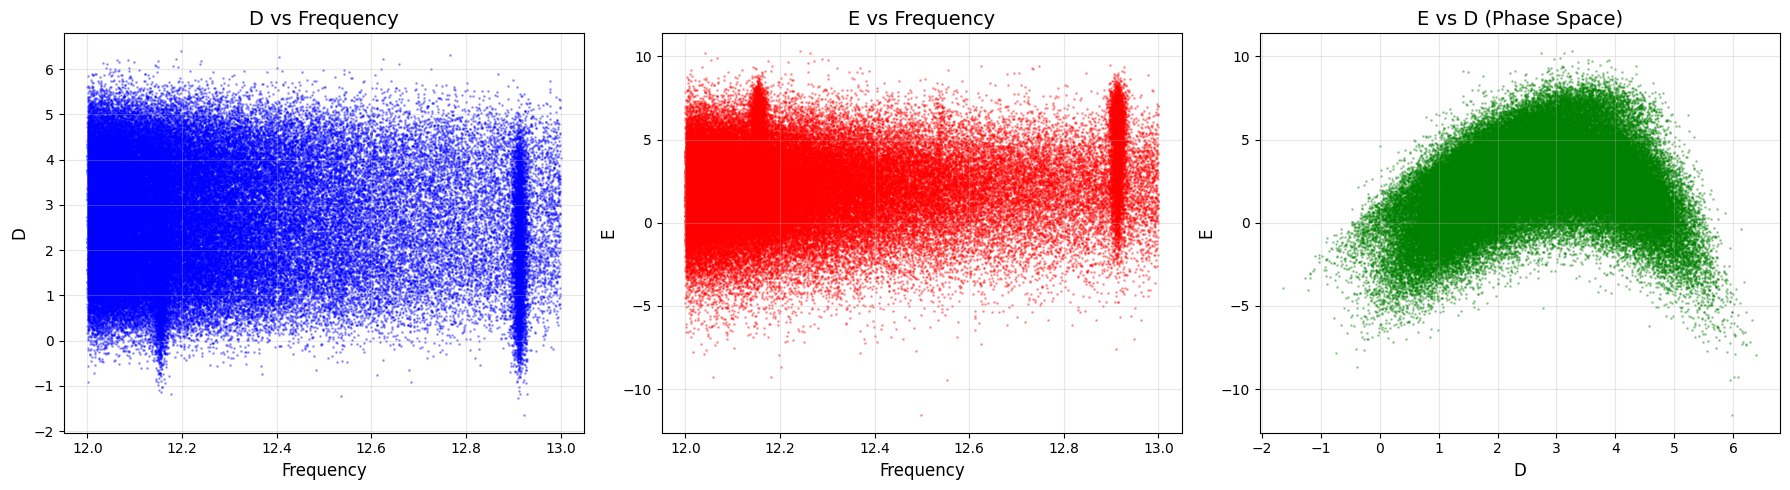

In [478]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(freq, a, s=1, alpha=0.3, c='blue')
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_ylabel('D', fontsize=12)
axes[0].set_title('D vs Frequency', fontsize=14)
axes[0].grid(True, alpha=0.3)

# E vs Frequency
axes[1].scatter(freq, b, s=1, alpha=0.3, c='red')
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('E', fontsize=12)
axes[1].set_title('E vs Frequency', fontsize=14)
axes[1].grid(True, alpha=0.3)

# E vs D (Phase space)
axes[2].scatter(a, b, s=1, alpha=0.3, c='green')
axes[2].set_xlabel('D', fontsize=12)
axes[2].set_ylabel('E', fontsize=12)
axes[2].set_title('E vs D (Phase Space)', fontsize=14)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== CALIBRATION: E₀(D) - CUBIC MODEL ===
Model: E₀(D) = a₀ + a₁·D + a₂·D² + a₃·D³
a₀ = -1.250311 ± 0.028607
a₁ = 1.646522 ± 0.038857
a₂ = 0.34971410 ± 0.01628184
a₃ = -0.1253543230 ± 0.0020294980
χ²/ndof = 255.39/41 = 6.229
p-value = 0.0000


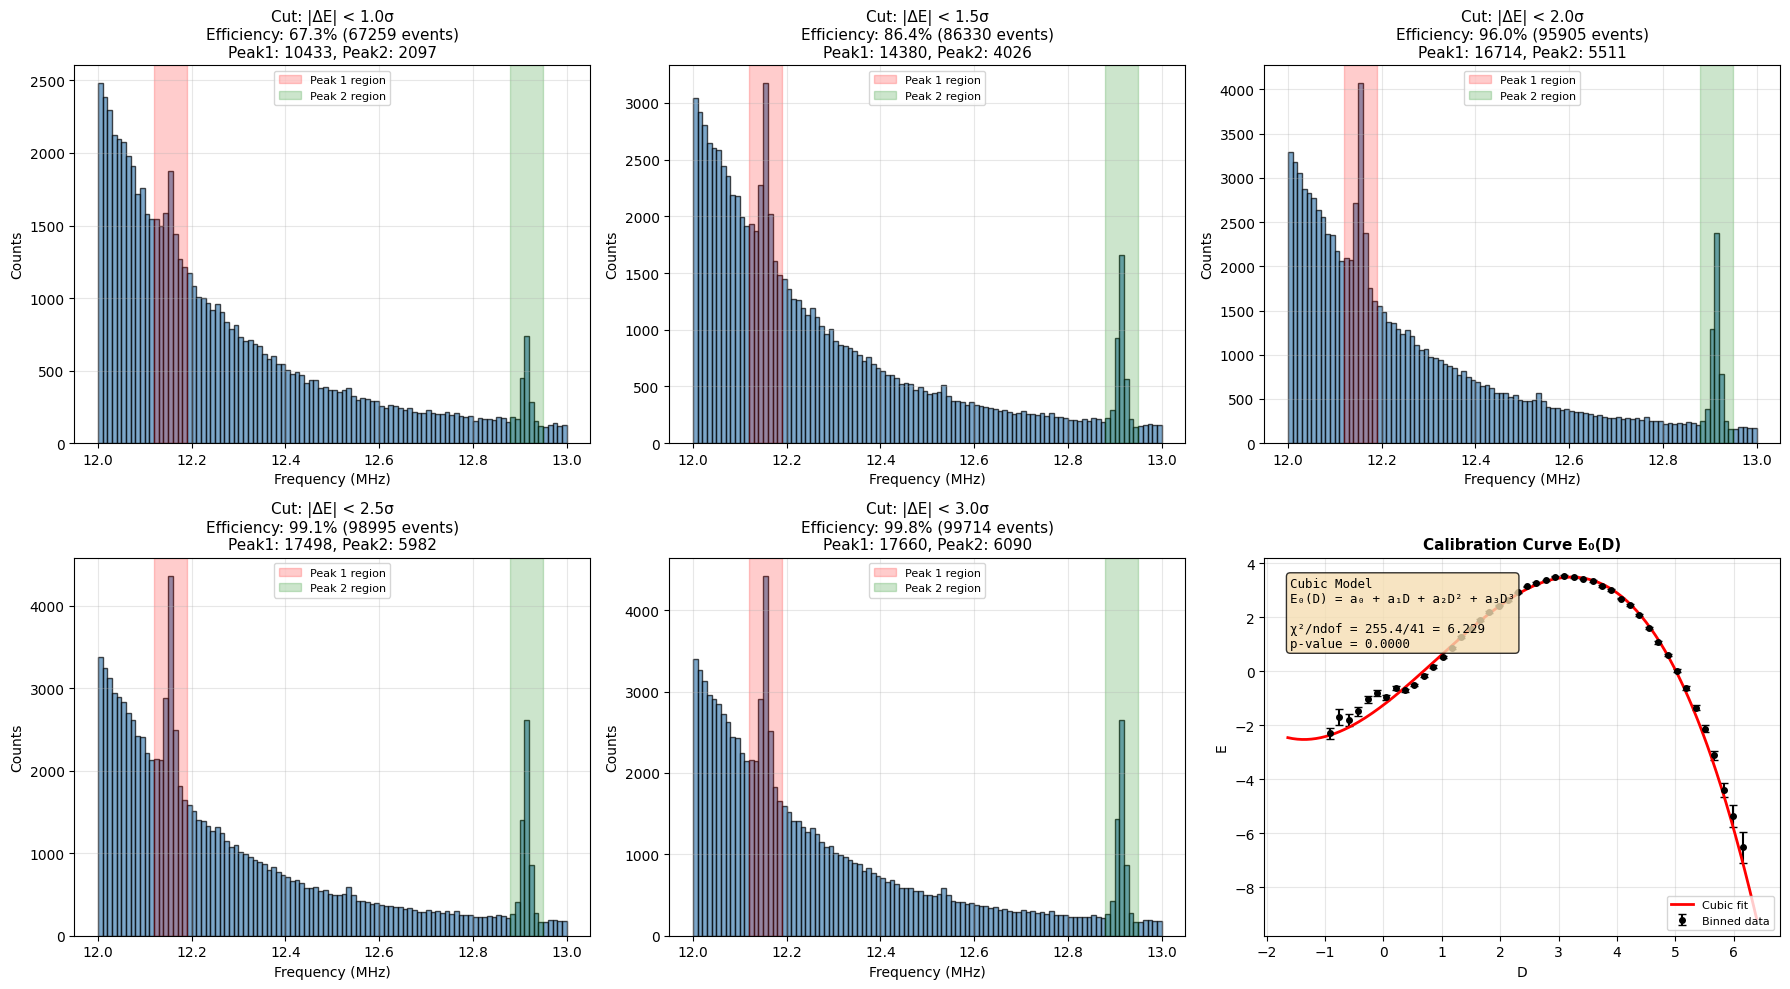

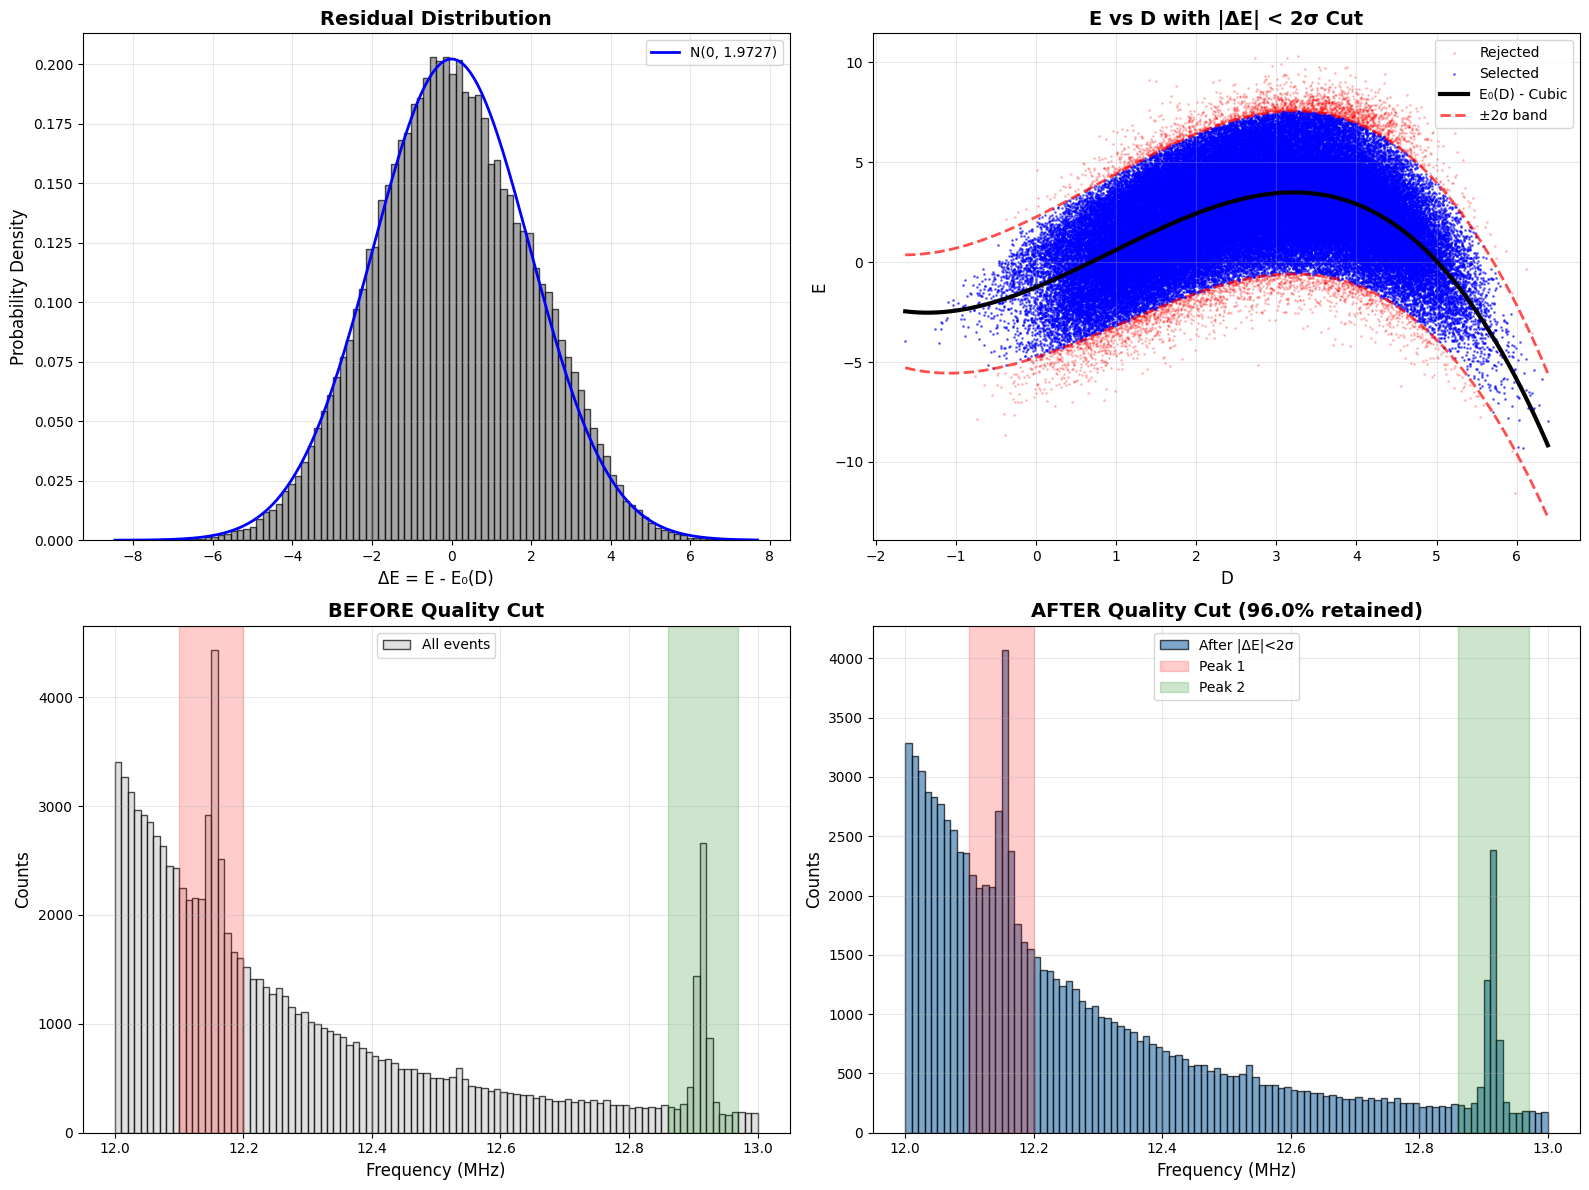


=== CUT SUMMARY (k=2) ===
Events before cut: 99868
Events after cut:  95905 (96.0%)
Rejected:          3963 (4.0%)


In [479]:
# === STEP 1: Calibration - Find E₀(D) Relationship ===

# Bin the data in D and calculate mean E in each bin
n_bins_calib = 50
d_bins = np.linspace(a.min(), a.max(), n_bins_calib + 1)
d_centers = 0.5 * (d_bins[1:] + d_bins[:-1])

# Calculate mean and std of E in each D bin
e_means = []
# e_stds = []
# e_errs = []
e_sigmas = []
valid_bins = []

for i in range(len(d_bins) - 1):
    mask = (a >= d_bins[i]) & (a < d_bins[i+1])
    if np.sum(mask) > 10:  # Require at least 10 events per bin
        e_in_bin = b[mask]
        # e_means.append(np.mean(e_in_bin))
        e_means.append(np.median(e_in_bin))
        # e_stds.append(np.std(e_in_bin, ddof=1))
        # e_errs.append(np.std(e_in_bin, ddof=1) / np.sqrt(len(e_in_bin)))
        e_sigmas.append(np.std(e_in_bin, ddof=1))
        valid_bins.append(d_centers[i])

e_means = np.array(e_means)
e_stds = np.array(e_stds)
e_errs = np.array(e_errs)
d_valid = np.array(valid_bins)

# Define calibration models
def calibration_linear(d, a0, a1):
    return a0 + a1 * d

def calibration_poly2(d, a0, a1, a2):
    return a0 + a1*d + a2*d**2

def calibration_cubic(d, a0, a1, a2, a3):
    """Cubic model: E₀(D) = a₀ + a₁·D + a₂·D² + a₃·D³"""
    return a0 + a1*d + a2*d**2 + a3*d**3
def sigma_poly(d, s0, s1, s2):
    return np.clip(s0 + s1*d + s2*d**2, 1e-6, None)

cfit_sigma = cost.LeastSquares(d_valid, e_sigmas, 
                               np.full_like(e_sigmas, 0.05*np.mean(e_sigmas)),
                               sigma_poly)
m_sigma = Minuit(cfit_sigma, s0=np.mean(e_sigmas), s1=0, s2=0)
m_sigma.migrad()

# Fit with cubic model
cfit_calib = cost.LeastSquares(d_valid, e_means, e_errs, calibration_cubic)
m_calib = Minuit(cfit_calib, a0=np.mean(e_means), a1=0, a2=0, a3=0)
m_calib.migrad()

# Calculate chi2
chi2_calib = m_calib.fval
ndof_calib = len(d_valid) - m_calib.nfit
chi2_ndof_calib = chi2_calib / ndof_calib
p_calib = stats.chi2.sf(chi2_calib, ndof_calib)

print(f"\n=== CALIBRATION: E₀(D) - CUBIC MODEL ===")
print(f"Model: E₀(D) = a₀ + a₁·D + a₂·D² + a₃·D³")
print(f"a₀ = {m_calib.values['a0']:.6f} ± {m_calib.errors['a0']:.6f}")
print(f"a₁ = {m_calib.values['a1']:.6f} ± {m_calib.errors['a1']:.6f}")
print(f"a₂ = {m_calib.values['a2']:.8f} ± {m_calib.errors['a2']:.8f}")
print(f"a₃ = {m_calib.values['a3']:.10f} ± {m_calib.errors['a3']:.10f}")
print(f"χ²/ndof = {chi2_calib:.2f}/{ndof_calib} = {chi2_ndof_calib:.3f}")
print(f"p-value = {p_calib:.4f}")

# === STEP 2: Calculate Residuals ΔE ===

# Predict E for all events
e_predicted = calibration_cubic(a, *m_calib.values[:])
delta_e = b - e_predicted

# Estimate resolution σ(ΔE) from RMS of residuals
# sigma_delta_e = np.std(delta_e)
sigma_local = sigma_poly(a, *m_sigma.values[:])

# print(f"\nResidual RMS: σ(ΔE) = {sigma_delta_e:.6f}")

# === STEP 3: Apply Quality Cuts ===

# Try different cut values
k_values = [1.0, 1.5, 2.0, 2.5, 3.0]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    # Apply cut |ΔE| < k·σ
    # cut_mask = np.abs(delta_e) < k * sigma_delta_e
    cut_mask = np.abs(delta_e) < k * sigma_local
    # Selected events
    freq_selected = freq[cut_mask]
    
    # Build histogram
    ax = axes[idx]
    counts, bins, _ = ax.hist(freq_selected, bins=100, alpha=0.7, 
                               edgecolor='black', color='steelblue')
    
    # Mark peak regions
    ax.axvspan(12.12, 12.19, alpha=0.2, color='red', label='Peak 1 region')
    ax.axvspan(12.88, 12.95, alpha=0.2, color='green', label='Peak 2 region')
    
    # Calculate signal-to-background ratio in peak regions
    peak1_region = (freq_selected >= 12.12) & (freq_selected <= 12.19)
    peak2_region = (freq_selected >= 12.88) & (freq_selected <= 12.95)
    
    n_peak1 = np.sum(peak1_region)
    n_peak2 = np.sum(peak2_region)
    n_total = len(freq_selected)
    efficiency = len(freq_selected) / len(freq) * 100
    
    ax.set_xlabel('Frequency (MHz)', fontsize=10)
    ax.set_ylabel('Counts', fontsize=10)
    ax.set_title(f'Cut: |ΔE| < {k}σ\n'
                 f'Efficiency: {efficiency:.1f}% ({n_total} events)\n'
                 f'Peak1: {n_peak1}, Peak2: {n_peak2}',
                 fontsize=11)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Plot calibration in last subplot with fit statistics
ax = axes[-1]
ax.errorbar(d_valid, e_means, yerr=e_errs, fmt='o', capsize=3, 
            color='black', markersize=4, label='Binned data')
d_smooth = np.linspace(a.min(), a.max(), 200)
ax.plot(d_smooth, calibration_cubic(d_smooth, *m_calib.values[:]), 
        'r-', linewidth=2, label='Cubic fit')

# Add fit statistics text box
fit_text = (f'Cubic Model\n'
            f'E₀(D) = a₀ + a₁D + a₂D² + a₃D³\n\n'
            f'χ²/ndof = {chi2_calib:.1f}/{ndof_calib} = {chi2_ndof_calib:.3f}\n'
            f'p-value = {p_calib:.4f}')
ax.text(0.05, 0.95, fit_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        family='monospace')

ax.set_xlabel('D', fontsize=10)
ax.set_ylabel('E', fontsize=10)
ax.set_title('Calibration Curve E₀(D)', fontsize=11, fontweight='bold')
ax.legend(fontsize=8, loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === STEP 4: Visualize Cut Performance ===

# Choose optimal cut (e.g., k=1.0)
k_optimal = 2
cut_mask_optimal = np.abs(delta_e) < k_optimal*sigma_local

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residual distribution
ax1.hist(delta_e, bins=100, alpha=0.7, color='gray', edgecolor='black', density=True)
# ax1.axvline(-k_optimal*sigma_poly(d_smooth, *m_sigma.values[:]), color='red', linestyle='--', linewidth=2, 
#             label=f'±{k_optimal}σ cut')
# ax1.axvline(k_optimal*sigma_poly(d_smooth, *m_sigma.values[:]), color='red', linestyle='--', linewidth=2)
# # Overlay Gaussian
x_gauss = np.linspace(delta_e.min(), delta_e.max(), 200)
ax1.plot(x_gauss, stats.norm.pdf(x_gauss, 0, sigma_delta_e), 'b-', 
         linewidth=2, label=f'N(0, {sigma_delta_e:.4f})')
ax1.set_xlabel('ΔE = E - E₀(D)', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('Residual Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. E vs D with cut
ax2.scatter(a[~cut_mask_optimal], b[~cut_mask_optimal], s=1, alpha=0.2, 
            c='red', label='Rejected')
ax2.scatter(a[cut_mask_optimal], b[cut_mask_optimal], s=1, alpha=0.5, 
            c='blue', label='Selected')
ax2.plot(d_smooth, calibration_cubic(d_smooth, *m_calib.values[:]), 
         'black', linewidth=3, label='E₀(D) - Cubic')
# Plot ±kσ bands
ax2.plot(d_smooth, calibration_cubic(d_smooth, *m_calib.values[:]) + k_optimal*sigma_poly(d_smooth, *m_sigma.values[:]),
         'r--', linewidth=2, alpha=0.7, label=f'±{k_optimal}σ band')
ax2.plot(d_smooth, calibration_cubic(d_smooth, *m_calib.values[:]) - k_optimal*sigma_poly(d_smooth, *m_sigma.values[:]),
         'r--', linewidth=2, alpha=0.7)
ax2.set_xlabel('D', fontsize=12)
ax2.set_ylabel('E', fontsize=12)
ax2.set_title(f'E vs D with |ΔE| < {k_optimal}σ Cut', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Frequency spectrum - BEFORE cut
ax3.hist(freq, bins=100, alpha=0.7, edgecolor='black', color='lightgray', 
         label='All events')
ax3.axvspan(12.1, 12.20, alpha=0.2, color='red')
ax3.axvspan(12.86, 12.97, alpha=0.2, color='green')
ax3.set_xlabel('Frequency (MHz)', fontsize=12)
ax3.set_ylabel('Counts', fontsize=12)
ax3.set_title('BEFORE Quality Cut', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Frequency spectrum - AFTER cut
freq_clean = freq[cut_mask_optimal]
ax4.hist(freq_clean, bins=100, alpha=0.7, edgecolor='black', color='steelblue',
         label=f'After |ΔE|<{k_optimal}σ')
ax4.axvspan(12.1, 12.20, alpha=0.2, color='red', label='Peak 1')
ax4.axvspan(12.86, 12.97, alpha=0.2, color='green', label='Peak 2')
ax4.set_xlabel('Frequency (MHz)', fontsize=12)
ax4.set_ylabel('Counts', fontsize=12)
ax4.set_title(f'AFTER Quality Cut ({len(freq_clean)/len(freq)*100:.1f}% retained)', 
              fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== CUT SUMMARY (k={k_optimal}) ===")
print(f"Events before cut: {len(freq)}")
print(f"Events after cut:  {len(freq_clean)} ({len(freq_clean)/len(freq)*100:.1f}%)")
print(f"Rejected:          {len(freq) - len(freq_clean)} ({(1-len(freq_clean)/len(freq))*100:.1f}%)")

In [480]:
# === Signal-to-Background Ratio ===

def calc_SoB(freq_data, signal_window, background_windows):
    """Calculate signal/sqrt(background)"""
    # Signal region
    signal_mask = (freq_data >= signal_window[0]) & (freq_data <= signal_window[1])
    N_signal = np.sum(signal_mask)
    
    # Background regions (left + right sidebands)
    bkg_mask = ((freq_data >= background_windows[0][0]) & (freq_data <= background_windows[0][1])) | \
               ((freq_data >= background_windows[1][0]) & (freq_data <= background_windows[1][1]))
    N_bkg = np.sum(bkg_mask)
    
    # Scale background to signal window size
    signal_width = signal_window[1] - signal_window[0]
    bkg_width = (background_windows[0][1] - background_windows[0][0]) + \
                (background_windows[1][1] - background_windows[1][0])
    N_bkg_scaled = N_bkg * (signal_width / bkg_width)
    
    # S/√B
    if N_bkg_scaled > 0:
        SoB = (N_signal - N_bkg_scaled) / np.sqrt(N_bkg_scaled)
    else:
        SoB = 0
    
    return SoB, N_signal, N_bkg_scaled

# Peak 1
signal_win_p1 = (12.12, 12.19)
bkg_win_p1 = [(12.08, 12.11), (12.20, 12.23)]

SoB_p1_before, S1_before, B1_before = calc_SoB(freq, signal_win_p1, bkg_win_p1)
SoB_p1_after, S1_after, B1_after = calc_SoB(freq_clean, signal_win_p1, bkg_win_p1)

print(f"\n{'='*70}")
print("SIGNAL-TO-BACKGROUND RATIO")
print(f"{'='*70}")
print(f"\nPeak 1 ({signal_win_p1[0]}-{signal_win_p1[1]} MHz):")
print(f"  Before cut: S/√B = {SoB_p1_before:.2f} (S={S1_before:.0f}, B={B1_before:.1f})")
print(f"  After cut:  S/√B = {SoB_p1_after:.2f} (S={S1_after:.0f}, B={B1_after:.1f})")
print(f"  Improvement: {(SoB_p1_after/SoB_p1_before - 1)*100:+.1f}%")

# Peak 2
signal_win_p2 = (12.88, 12.95)
bkg_win_p2 = [(12.84, 12.87), (12.96, 12.99)]

SoB_p2_before, S2_before, B2_before = calc_SoB(freq, signal_win_p2, bkg_win_p2)
SoB_p2_after, S2_after, B2_after = calc_SoB(freq_clean, signal_win_p2, bkg_win_p2)

print(f"\nPeak 2 ({signal_win_p2[0]}-{signal_win_p2[1]} MHz):")
print(f"  Before cut: S/√B = {SoB_p2_before:.2f} (S={S2_before:.0f}, B={B2_before:.1f})")
print(f"  After cut:  S/√B = {SoB_p2_after:.2f} (S={S2_after:.0f}, B={B2_after:.1f})")
print(f"  Improvement: {(SoB_p2_after/SoB_p2_before - 1)*100:+.1f}%")


SIGNAL-TO-BACKGROUND RATIO

Peak 1 (12.12-12.19 MHz):
  Before cut: S/√B = 36.65 (S=17686, B=13437.7)
  After cut:  S/√B = 32.35 (S=16714, B=13022.3)
  Improvement: -11.7%

Peak 2 (12.88-12.95 MHz):
  Before cut: S/√B = 119.57 (S=6105, B=1489.8)
  After cut:  S/√B = 107.60 (S=5511, B=1435.0)
  Improvement: -10.0%
